<a href="https://colab.research.google.com/github/Prakhyathg3/Prakhyath/blob/main/EDA_Optimising_NYC_Taxi_%3CPrakhyath%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')





In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [15]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import requests

# Create directory structure in Google Drive if it doesn't exist
data_dir = '/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records'
os.makedirs(data_dir, exist_ok=True)

# Change to the data directory
os.chdir(data_dir)

# Base URL for NYC TLC trip data
base_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-{:02d}.parquet"

# Download all 12 monthly files for 2023
print("Downloading files from NYC TLC website...\n")
for month in range(1, 13):
    file_name = f"2023-{month}.parquet"
    file_path = os.path.join(data_dir, file_name)

    # Check if file already exists
    if os.path.exists(file_path):
        print(f"{file_name} already exists, skipping download.")
        continue

    try:
        url = base_url.format(month)
        print(f"Downloading {file_name} from {url}...")

        response = requests.get(url, stream=True)
        response.raise_for_status()

        # Save the file
        with open(file_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)

        print(f"✓ {file_name} downloaded successfully!\n")

    except Exception as e:
        print(f"✗ Error downloading {file_name}: {e}\n")

print("="*50)
print("Download complete! Files saved to:")
print(data_dir)
print("\nFiles in directory:")
print(os.listdir(data_dir))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ 2023-1.parquet downloaded successfully!

✓ 2023-2.parquet downloaded successfully!

✓ 2023-3.parquet downloaded successfully!

✓ 2023-4.parquet downloaded successfully!

✓ 2023-5.parquet downloaded successfully!

✓ 2023-6.parquet downloaded successfully!

✓ 2023-7.parquet downloaded successfully!

✓ 2023-8.parquet downloaded successfully!

✓ 2023-9.parquet downloaded successfully!

✓ 2023-10.parquet downloaded successfully!

✓ 2023-11.parquet downloaded successfully!

✓ 2023-12.parquet downloaded successfully!

Download complete! Files saved to:
/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records

Files in directory:
['2023-1.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet']


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [16]:
# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')]
file_list.sort()  # Sort to process in order
print(f"Found files: {file_list}\n")

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        print(f"Processing {file_name}...")

        # Reading the current file
        month_df = pd.read_parquet(file_path)

        # Convert pickup datetime to datetime type if not already
        month_df['tpep_pickup_datetime'] = pd.to_datetime(month_df['tpep_pickup_datetime'])

        # Extract date and hour
        month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_df['date'].unique():
            # Filter data for the current date
            date_df = month_df[month_df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                # Filter data for the current hour
                hour_df = date_df[date_df['hour'] == hour]

                # Sample 5% of the hourly data randomly
                if len(hour_df) > 0:
                    sample_size = max(1, int(len(hour_df) * 0.05))
                    hour_sample = hour_df.sample(n=sample_size, random_state=42)

                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, hour_sample], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

        print(f"✓ Processed {file_name}: {len(sampled_data)} rows sampled\n")

    except Exception as e:
        print(f"✗ Error reading file {file_name}: {e}\n")

# Drop the temporary columns used for sampling
df = df.drop(['date', 'hour'], axis=1)

print("="*50)
print(f"Final dataframe shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
df.info()

Found files: ['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet']

Processing 2023-1.parquet...
✓ Processed 2023-1.parquet: 152995 rows sampled

Processing 2023-10.parquet...
✓ Processed 2023-10.parquet: 175759 rows sampled

Processing 2023-11.parquet...
✓ Processed 2023-11.parquet: 166642 rows sampled

Processing 2023-12.parquet...
✓ Processed 2023-12.parquet: 168471 rows sampled

Processing 2023-2.parquet...
✓ Processed 2023-2.parquet: 145398 rows sampled

Processing 2023-3.parquet...
✓ Processed 2023-3.parquet: 169881 rows sampled

Processing 2023-4.parquet...
✓ Processed 2023-4.parquet: 164091 rows sampled

Processing 2023-5.parquet...
✓ Processed 2023-5.parquet: 175350 rows sampled

Processing 2023-6.parquet...
✓ Processed 2023-6.parquet: 165015 rows sampled

Processing 2023-7.parquet...
✓ Processed 2023-7.parquet: 1

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()  # This will open a file picker

# Then read them
df = pd.DataFrame()
for filename in uploaded.keys():
    if filename.endswith('.parquet'):
        month_df = pd.read_parquet(filename)
        # ... rest of your sampling code

Saving EDA_Assg_NYC_Taxi_Starter.ipynb to EDA_Assg_NYC_Taxi_Starter.ipynb


In [17]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd

# Change to your Google Drive folder path (update this path to match your folder structure)
os.chdir('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records')

# OR if your files are in a different location, use the correct path like:
# os.chdir('/content/drive/MyDrive/YourFolderName/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
print(f"Found files: {file_list}")

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_df = pd.read_parquet(file_path)

        # Convert pickup datetime to datetime type if not already
        month_df['tpep_pickup_datetime'] = pd.to_datetime(month_df['tpep_pickup_datetime'])

        # Extract date and hour
        month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_df['date'].unique():
            # Filter data for the current date
            date_df = month_df[month_df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                # Filter data for the current hour
                hour_df = date_df[date_df['hour'] == hour]

                # Sample 5% of the hourly data randomly
                if len(hour_df) > 0:
                    sample_size = max(1, int(len(hour_df) * 0.05))
                    hour_sample = hour_df.sample(n=sample_size, random_state=42)

                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, hour_sample], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

        print(f"Processed {file_name}: {len(sampled_data)} rows sampled")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Drop the temporary columns used for sampling
df = df.drop(['date', 'hour'], axis=1)

print(f"\nFinal dataframe shape: {df.shape}")
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found files: ['2023-1.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet']
Processed 2023-1.parquet: 152995 rows sampled
Processed 2023-2.parquet: 145398 rows sampled
Processed 2023-3.parquet: 169881 rows sampled
Processed 2023-4.parquet: 164091 rows sampled
Processed 2023-5.parquet: 175350 rows sampled
Processed 2023-6.parquet: 165015 rows sampled
Processed 2023-7.parquet: 145009 rows sampled
Processed 2023-8.parquet: 140857 rows sampled
Processed 2023-9.parquet: 142000 rows sampled
Processed 2023-10.parquet: 175759 rows sampled
Processed 2023-11.parquet: 166642 rows sampled
Processed 2023-12.parquet: 168471 rows sampled

Final dataframe shape: (1911468, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [19]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import requests

# Create directory structure
data_dir = '/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records'
os.makedirs(data_dir, exist_ok=True)

# Base URL
base_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-{:02d}.parquet"

# Download only 3 months for faster testing (January, June, December)
test_months = [1, 6, 12]  # Representative sample

print("Downloading sample files for testing...\n")

for month in test_months:
    file_name = f"2023-{month}.parquet"
    file_path = os.path.join(data_dir, file_name)

    if os.path.exists(file_path):
        print(f"✓ {file_name} already exists\n")
        continue

    try:
        url = base_url.format(month)
        print(f"Downloading {file_name}...")

        response = requests.get(url)
        response.raise_for_status()

        with open(file_path, 'wb') as f:
            f.write(response.content)

        file_size = os.path.getsize(file_path) / (1024 * 1024)  # MB
        print(f"✓ Downloaded {file_name} ({file_size:.1f} MB)\n")

    except Exception as e:
        print(f"✗ Error: {e}\n")

print("="*50)
print("Download complete!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ 2023-1.parquet already exists

✓ 2023-6.parquet already exists

✓ 2023-12.parquet already exists

Download complete!


In [20]:
# Change to your Google Drive folder path
os.chdir('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')]
file_list.sort()
print(f"Found files: {file_list}\n")

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_df = pd.read_parquet(file_path)

        # Convert pickup datetime to datetime type if not already
        month_df['tpep_pickup_datetime'] = pd.to_datetime(month_df['tpep_pickup_datetime'])

        # Extract date and hour
        month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_df['date'].unique():
            # Filter data for the current date
            date_df = month_df[month_df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                # Filter data for the current hour
                hour_df = date_df[date_df['hour'] == hour]

                # Sample 5% of the hourly data randomly
                if len(hour_df) > 0:
                    sample_size = max(1, int(len(hour_df) * 0.05))
                    hour_sample = hour_df.sample(n=sample_size, random_state=42)

                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, hour_sample], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

        print(f"Processed {file_name}: {len(sampled_data)} rows sampled")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Drop the temporary columns used for sampling
df = df.drop(['date', 'hour'], axis=1)

print(f"\nFinal dataframe shape: {df.shape}")
df.info()

Found files: ['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet']

Processed 2023-1.parquet: 152995 rows sampled
Processed 2023-10.parquet: 175759 rows sampled
Processed 2023-11.parquet: 166642 rows sampled
Processed 2023-12.parquet: 168471 rows sampled
Processed 2023-2.parquet: 145398 rows sampled
Processed 2023-3.parquet: 169881 rows sampled
Processed 2023-4.parquet: 164091 rows sampled
Processed 2023-5.parquet: 175350 rows sampled
Processed 2023-6.parquet: 165015 rows sampled
Processed 2023-7.parquet: 145009 rows sampled
Processed 2023-8.parquet: 140857 rows sampled
Processed 2023-9.parquet: 142000 rows sampled

Final dataframe shape: (1911468, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911468 entries, 0 to 1911467
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------      

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [22]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import os
import pandas as pd
import requests
from tqdm import tqdm

# =============================================================================
# STEP 1: DOWNLOAD DATA FILES
# =============================================================================

# Create directory structure in Google Drive if it doesn't exist
data_dir = '/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records'
os.makedirs(data_dir, exist_ok=True)

# Base URL for NYC TLC trip data (Yellow Taxi 2023)
base_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-{:02d}.parquet"

# Download all 12 monthly files for 2023
print("Downloading files from NYC TLC website...\n")

for month in range(1, 13):
    file_name = f"2023-{month}.parquet"
    file_path = os.path.join(data_dir, file_name)

    # Check if file already exists
    if os.path.exists(file_path):
        print(f"✓ {file_name} already exists, skipping download.\n")
        continue

    try:
        url = base_url.format(month)
        print(f"Downloading {file_name}...")

        # Get file size for progress bar
        response = requests.get(url, stream=True)
        response.raise_for_status()
        total_size = int(response.headers.get('content-length', 0))

        # Download with progress bar
        with open(file_path, 'wb') as f:
            with tqdm(total=total_size, unit='B', unit_scale=True, desc=file_name) as pbar:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)
                    pbar.update(len(chunk))

        print(f"✓ {file_name} downloaded successfully!\n")

    except Exception as e:
        print(f"✗ Error downloading {file_name}: {e}\n")

print("="*50)
print("Download complete!")
print("="*50 + "\n")

# =============================================================================
# STEP 2: SAMPLE DATA FROM EACH HOUR OF EACH DAY
# =============================================================================

# Change to the data directory
os.chdir(data_dir)

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')]
file_list.sort()
print(f"Found files: {file_list}\n")

# Initialize an empty dataframe
df = pd.DataFrame()

# Iterate through the list of files and sample one by one
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        print(f"Processing {file_name}...")

        # Reading the current file
        month_df = pd.read_parquet(file_path)

        # Convert pickup datetime to datetime type if not already
        month_df['tpep_pickup_datetime'] = pd.to_datetime(month_df['tpep_pickup_datetime'])

        # Extract date and hour
        month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_df['date'].unique():
            # Filter data for the current date
            date_df = month_df[month_df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                # Filter data for the current hour
                hour_df = date_df[date_df['hour'] == hour]

                # Sample 5% of the hourly data randomly
                if len(hour_df) > 0:
                    sample_size = max(1, int(len(hour_df) * 0.05))
                    hour_sample = hour_df.sample(n=sample_size, random_state=42)

                    # Add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, hour_sample], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

        print(f"✓ Processed {file_name}: {len(sampled_data):,} rows sampled\n")

    except Exception as e:
        print(f"✗ Error reading file {file_name}: {e}\n")

# Drop the temporary columns used for sampling
df = df.drop(['date', 'hour'], axis=1)

print("="*50)
print(f"Final dataframe shape: {df.shape}")
print(f"Total entries: {len(df):,}")
print("="*50 + "\n")
df.info()

# =============================================================================
# STEP 3: SAVE COMBINED DATAFRAME TO PARQUET FILE
# =============================================================================

print("\n" + "="*50)
print("SAVING COMBINED DATAFRAME")
print("="*50)
print(f"Current dataframe shape: {df.shape}")
print(f"Total entries: {len(df):,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB\n")

# Adjust size to target range (250k-300k)
target_min = 250000
target_max = 300000

if len(df) > target_max:
    print(f"Dataframe has {len(df):,} entries. Sampling down to {target_max:,}...")
    df = df.sample(n=target_max, random_state=42).reset_index(drop=True)
    print(f"✓ Sampled down to {len(df):,} entries\n")
elif len(df) < target_min:
    print(f"⚠ Warning: Dataframe has only {len(df):,} entries (target is {target_min:,}-{target_max:,})\n")
else:
    print(f"✓ Dataframe size is within target range ({len(df):,} entries)\n")

# Define output path in Google Drive
output_path = '/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/nyc_taxi_2023_sampled.parquet'

# Save to parquet file
print("Saving to parquet file...")
df.to_parquet(output_path, index=False)

# Verify the saved file
file_size_mb = os.path.getsize(output_path) / (1024**2)
print("\n" + "="*50)
print("✓ FILE SAVED SUCCESSFULLY!")
print("="*50)
print(f"Format: Parquet")
print(f"Location: {output_path}")
print(f"Rows: {len(df):,}")
print(f"Columns: {len(df.columns)}")
print(f"File size: {file_size_mb:.2f} MB")
print("="*50)
print("\nTo load this file in future sessions:")
print(f"df = pd.read_parquet('{output_path}')")
print("="*50)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ 2023-1.parquet already exists, skipping download.

✓ 2023-2.parquet already exists, skipping download.

✓ 2023-3.parquet already exists, skipping download.

✓ 2023-4.parquet already exists, skipping download.

✓ 2023-5.parquet already exists, skipping download.

✓ 2023-6.parquet already exists, skipping download.

✓ 2023-7.parquet already exists, skipping download.

✓ 2023-8.parquet already exists, skipping download.

✓ 2023-9.parquet already exists, skipping download.

✓ 2023-10.parquet already exists, skipping download.

✓ 2023-11.parquet already exists, skipping download.

✓ 2023-12.parquet already exists, skipping download.

Download complete!

Found files: ['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parque

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [10]:
# =============================================================================
# 2. DATA CLEANING [30 marks]
# =============================================================================

# Load the new data file
import pandas as pd
import numpy as np

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

# Load the sampled parquet file
df = pd.read_parquet('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/nyc_taxi_2023_sampled.parquet')

print("="*50)
print("DATA LOADED SUCCESSFULLY")
print("="*50)
print(f"Shape: {df.shape}")
print(f"Total entries: {len(df):,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print("="*50 + "\n")

# Display first few rows
print("First 5 rows:")
print(df.head())

print("\n" + "="*50)
print("DATAFRAME INFO")
print("="*50)
df.info()

Mounted at /content/drive
DATA LOADED SUCCESSFULLY
Shape: (300000, 20)
Total entries: 300,000
Memory usage: 57.54 MB

First 5 rows:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-01 18:54:34   2023-08-01 18:59:37              1.0   
1         2  2023-07-25 13:50:35   2023-07-25 13:56:24              1.0   
2         1  2023-11-01 00:13:53   2023-11-01 00:28:48              1.0   
3         2  2023-09-09 17:23:19   2023-09-09 17:50:54              NaN   
4         2  2023-10-14 19:48:18   2023-10-14 19:59:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.13         1.0                  N           141           263   
1           1.37         1.0                  N           237           238   
2           3.90         1.0                  N           148           141   
3           6.65         NaN               None           164            36   
4           1.07      

In [25]:
# df.head()
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-08-01 18:54:34,2023-08-01 18:59:37,1.0,1.13,1.0,N,141,263,1,7.20,2.5,0.5,4.11,0.00,1.0,17.81,2.5,NaN,0.0
1,2,2023-07-25 13:50:35,2023-07-25 13:56:24,1.0,1.37,1.0,N,237,238,1,8.60,0.0,0.5,2.52,0.00,1.0,15.12,2.5,NaN,0.0
2,1,2023-11-01 00:13:53,2023-11-01 00:28:48,1.0,3.90,1.0,N,148,141,1,17.70,3.5,0.5,4.55,0.00,1.0,27.25,2.5,NaN,0.0
3,2,2023-09-09 17:23:19,2023-09-09 17:50:54,NaN,6.65,NaN,None,164,36,0,32.24,0.0,0.5,1.00,6.94,1.0,44.18,NaN,NaN,NaN
4,2,2023-10-14 19:48:18,2023-10-14 19:59:56,1.0,1.07,1.0,N,246,158,1,11.40,0.0,0.5,3.08,0.00,1.0,18.48,2.5,NaN,0.0


In [26]:
# df.info()
# Display dataframe information
print("\nDataframe Info:")
df.info()


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289899 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289899 non-null  float64       
 6   store_and_fwd_flag     289899 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                3000

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [11]:
# Fix the index and drop any columns that are not needed
# =============================================================================
# 2.1.1 Fix the index and drop unnecessary columns [2 marks]
# =============================================================================

print("="*50)
print("2.1.1 - FIXING INDEX AND DROPPING UNNECESSARY COLUMNS")
print("="*50)

# Check current columns
print("Current columns:")
print(df.columns.tolist())
print(f"\nCurrent shape: {df.shape}")

# Reset index if needed
df = df.reset_index(drop=True)
print(f"✓ Index reset")

# Identify and drop unnecessary columns
columns_to_drop = []

# Check if store_and_fwd_flag exists and has low variance
if 'store_and_fwd_flag' in df.columns:
    print(f"\nstore_and_fwd_flag value counts:")
    print(df['store_and_fwd_flag'].value_counts())
    columns_to_drop.append('store_and_fwd_flag')

# Drop identified columns
if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print(f"\n✓ Dropped columns: {columns_to_drop}")

print(f"\nFinal shape: {df.shape}")
print(f"Remaining columns: {df.columns.tolist()}")
print("="*50 + "\n")




2.1.1 - FIXING INDEX AND DROPPING UNNECESSARY COLUMNS
Current columns:
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']

Current shape: (300000, 20)
✓ Index reset

store_and_fwd_flag value counts:
store_and_fwd_flag
N    288146
Y      1753
Name: count, dtype: int64

✓ Dropped columns: ['store_and_fwd_flag']

Final shape: (300000, 19)
Remaining columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']



#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed
# =============================================================================
# 2.1.1 Fix the index and drop unnecessary columns [2 marks]
# =============================================================================

print("="*50)
print("2.1.1 - FIXING INDEX AND DROPPING UNNECESSARY COLUMNS")
print("="*50)

# Check current columns
print("Current columns:")
print(df.columns.tolist())
print(f"\nCurrent shape: {df.shape}")

# Reset index if needed
df = df.reset_index(drop=True)
print(f"✓ Index reset")

# Identify and drop unnecessary columns
columns_to_drop = []

# Check if store_and_fwd_flag exists and has low variance
if 'store_and_fwd_flag' in df.columns:
    print(f"\nstore_and_fwd_flag value counts:")
    print(df['store_and_fwd_flag'].value_counts())
    columns_to_drop.append('store_and_fwd_flag')

# Drop identified columns
if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print(f"\n✓ Dropped columns: {columns_to_drop}")

print(f"\nFinal shape: {df.shape}")
print(f"Remaining columns: {df.columns.tolist()}")
print("="*50 + "\n")




2.1.1 - FIXING INDEX AND DROPPING UNNECESSARY COLUMNS
Current columns:
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']

Current shape: (300000, 19)
✓ Index reset

Final shape: (300000, 19)
Remaining columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']



#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [27]:
# Fix the index and drop any columns that are not needed
# =============================================================================
# 2.1 FIXING COLUMNS [10 marks]
# =============================================================================

# =============================================================================
# 2.1.1 Fix the index and drop unnecessary columns [2 marks]
# =============================================================================

print("="*50)
print("2.1.1 - FIXING INDEX AND DROPPING UNNECESSARY COLUMNS")
print("="*50)

# Check current columns
print("Current columns:")
print(df.columns.tolist())
print(f"\nCurrent shape: {df.shape}")

# Reset index if needed
df = df.reset_index(drop=True)
print(f"✓ Index reset")

# Identify and drop unnecessary columns
# Common unnecessary columns in taxi data: store_and_fwd_flag (usually not needed for analysis)
columns_to_drop = []

# Check if store_and_fwd_flag exists and has low variance
if 'store_and_fwd_flag' in df.columns:
    print(f"\nstore_and_fwd_flag value counts:")
    print(df['store_and_fwd_flag'].value_counts())
    columns_to_drop.append('store_and_fwd_flag')

# Drop identified columns
if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print(f"\n✓ Dropped columns: {columns_to_drop}")

print(f"\nFinal shape: {df.shape}")
print(f"Remaining columns: {df.columns.tolist()}")
print("="*50 + "\n")



2.1.1 - FIXING INDEX AND DROPPING UNNECESSARY COLUMNS
Current columns:
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']

Current shape: (300000, 20)
✓ Index reset

store_and_fwd_flag value counts:
store_and_fwd_flag
N    288146
Y      1753
Name: count, dtype: int64

✓ Dropped columns: ['store_and_fwd_flag']

Final shape: (300000, 19)
Remaining columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']



**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# =============================================================================
# 2.1.2 Combine the two airport fee columns [3 marks]
# =============================================================================

print("="*50)
print("2.1.2 - COMBINING AIRPORT FEE COLUMNS")
print("="*50)

# Look for airport-related columns
airport_cols = [col for col in df.columns if 'airport' in col.lower()]
print(f"\nAirport fee columns found: {airport_cols}")

if len(airport_cols) >= 2:
    col1, col2 = airport_cols[0], airport_cols[1]

    print(f"\n--- {col1} ---")
    print(f"Non-zero count: {(df[col1] != 0).sum()}")
    print(f"Value counts:\n{df[col1].value_counts()}")

    print(f"\n--- {col2} ---")
    print(f"Non-zero count: {(df[col2] != 0).sum()}")
    print(f"Value counts:\n{df[col2].value_counts()}")

    # Check for overlapping non-zero values
    both_nonzero = ((df[col1] != 0) & (df[col2] != 0)).sum()
    print(f"\nRows where both columns have non-zero values: {both_nonzero}")

    # Combine the columns
    df['airport_fee'] = df[[col1, col2]].max(axis=1)

    print(f"\n✓ Created combined 'airport_fee' column")
    print(f"Non-zero values: {(df['airport_fee'] != 0).sum()}")

    # Drop the original columns
    df = df.drop(columns=airport_cols)
    print(f"✓ Dropped original columns: {airport_cols}")

elif len(airport_cols) == 1:
    print("\nOnly one airport fee column found")
    df = df.rename(columns={airport_cols[0]: 'airport_fee'})
else:
    print("\nNo airport fee columns found")

print(f"\nUpdated columns: {df.columns.tolist()}")
print("="*50 + "\n")

2.1.2 - COMBINING AIRPORT FEE COLUMNS

Airport fee columns found: ['airport_fee', 'Airport_fee']

--- airport_fee ---
Non-zero count: 278790
Value counts:
airport_fee
 0.00    21210
 1.25     2083
-1.25       31
Name: count, dtype: int64

--- Airport_fee ---
Non-zero count: 56875
Value counts:
Airport_fee
 0.00    243125
 1.75     18829
 1.25      4251
-1.75       322
-1.25        48
Name: count, dtype: int64

Rows where both columns have non-zero values: 35665

✓ Created combined 'airport_fee' column
Non-zero values: 35665
✓ Dropped original columns: ['airport_fee', 'Airport_fee']

Updated columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']



**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [20]:
# =============================================================================
# 2.1.3 Fix columns with negative (monetary) values [5 marks]
# =============================================================================

# Check where values of fare amount are negative

print("="*50)
print("2.1.3 - FIXING NEGATIVE VALUES")
print("="*50)

# Filter records with negative fare amounts
negative_fare_df = df[df['fare_amount'] < 0]

print(f"\nNumber of records with negative fare_amount: {len(negative_fare_df)}")
if len(df) > 0:
    print(f"Percentage: {len(negative_fare_df)/len(df)*100:.2f}%")

if len(negative_fare_df) > 0:
    print("\nSample records with negative fare amounts:")
    print(negative_fare_df[['tpep_pickup_datetime', 'trip_distance',
                             'RatecodeID', 'fare_amount', 'total_amount']].head(10))

2.1.3 - FIXING NEGATIVE VALUES

Number of records with negative fare_amount: 3036
Percentage: 1.01%

Sample records with negative fare amounts:
    tpep_pickup_datetime  trip_distance  RatecodeID  fare_amount  total_amount
118  2023-04-21 12:13:41           0.03         1.0         -3.0         -9.50
259  2023-05-06 15:27:49           4.34         1.0        -31.7        -35.70
529  2023-08-23 09:08:59           0.97         1.0         -9.3        -13.30
567  2023-12-31 13:43:05          17.86         2.0        -70.0        -82.69
686  2023-11-04 21:09:29           3.52         1.0        -21.2        -26.20
713  2023-03-16 17:30:52          17.81         2.0        -70.0        -79.00
727  2023-12-20 12:55:53           0.00         2.0        -70.0        -74.00
758  2023-08-07 18:26:07           0.06         1.0         -3.0         -9.50
800  2023-11-02 09:46:27           0.09         1.0         -3.0         -7.00
872  2023-08-02 18:00:48           2.84         1.0        -28.2  

Did you notice something different in the `RatecodeID` column for above records?

In [26]:
# Analyse RatecodeID for the negative fare amounts
# Check where fare amount values are negative
print("\n" + "-"*50)
print("RatecodeID distribution for negative fare amounts:")
print(negative_fare_df['RatecodeID'].value_counts())

print("\nRatecodeID distribution for all records:")
print(df['RatecodeID'].value_counts())
print("-"*50)


--------------------------------------------------
RatecodeID distribution for negative fare amounts:
RatecodeID
1.0    2671
2.0     204
5.0      69
3.0      32
4.0      13
Name: count, dtype: int64

RatecodeID distribution for all records:
RatecodeID
1.0     273397
2.0      11496
5.0       1773
99.0      1642
3.0       1012
4.0        578
6.0          1
Name: count, dtype: int64
--------------------------------------------------


In [29]:
# Find which columns have negative values
# =============================================================================

# Check where values of fare amount are negative

print("="*50)
print("2.1.3 - FIXING NEGATIVE VALUES")
print("="*50)

# Filter records with negative fare amounts
negative_fare_df = df[df['fare_amount'] < 0]

print(f"\nNumber of records with negative fare_amount: {len(negative_fare_df)}")
if len(df) > 0:
    print(f"Percentage: {len(negative_fare_df)/len(df)*100:.2f}%")

if len(negative_fare_df) > 0:
    print("\nSample records with negative fare amounts:")
    print(negative_fare_df[['tpep_pickup_datetime', 'trip_distance',
                             'RatecodeID', 'fare_amount', 'total_amount']].head(10))



2.1.3 - FIXING NEGATIVE VALUES

Number of records with negative fare_amount: 3036
Percentage: 1.01%

Sample records with negative fare amounts:
    tpep_pickup_datetime  trip_distance  RatecodeID  fare_amount  total_amount
118  2023-04-21 12:13:41           0.03         1.0         -3.0         -9.50
259  2023-05-06 15:27:49           4.34         1.0        -31.7        -35.70
529  2023-08-23 09:08:59           0.97         1.0         -9.3        -13.30
567  2023-12-31 13:43:05          17.86         2.0        -70.0        -82.69
686  2023-11-04 21:09:29           3.52         1.0        -21.2        -26.20
713  2023-03-16 17:30:52          17.81         2.0        -70.0        -79.00
727  2023-12-20 12:55:53           0.00         2.0        -70.0        -74.00
758  2023-08-07 18:26:07           0.06         1.0         -3.0         -9.50
800  2023-11-02 09:46:27           0.09         1.0         -3.0         -7.00
872  2023-08-02 18:00:48           2.84         1.0        -28.2  

In [37]:
# fix these negative values
print("\n" + "="*50)
print("FIXING NEGATIVE VALUES")
print("="*50)




FIXING NEGATIVE VALUES


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [15]:
# =============================================================================
# 2.1.2 Combine the two airport fee columns [3 marks]
# =============================================================================

print("="*50)
print("2.1.2 - COMBINING AIRPORT FEE COLUMNS")
print("="*50)

# Look for airport-related columns
airport_cols = [col for col in df.columns if 'airport' in col.lower()]
print(f"\nAirport fee columns found: {airport_cols}")

if len(airport_cols) >= 2:
    col1, col2 = airport_cols[0], airport_cols[1]

    print(f"\n--- {col1} ---")
    print(f"Non-zero count: {(df[col1] != 0).sum()}")
    print(f"Value counts:\n{df[col1].value_counts()}")

    print(f"\n--- {col2} ---")
    print(f"Non-zero count: {(df[col2] != 0).sum()}")
    print(f"Value counts:\n{df[col2].value_counts()}")

    # Check for overlapping non-zero values
    both_nonzero = ((df[col1] != 0) & (df[col2] != 0)).sum()
    print(f"\nRows where both columns have non-zero values: {both_nonzero}")

    # Combine the columns
    df['airport_fee'] = df[[col1, col2]].max(axis=1)

    print(f"\n✓ Created combined 'airport_fee' column")
    print(f"Non-zero values: {(df['airport_fee'] != 0).sum()}")

    # Drop the original columns
    df = df.drop(columns=airport_cols)
    print(f"✓ Dropped original columns: {airport_cols}")

elif len(airport_cols) == 1:
    print("\nOnly one airport fee column found")
    df = df.rename(columns={airport_cols[0]: 'airport_fee'})
else:
    print("\nNo airport fee columns found")

print(f"\nUpdated columns: {df.columns.tolist()}")
print("="*50 + "\n")

2.1.2 - COMBINING AIRPORT FEE COLUMNS

Airport fee columns found: []

No airport fee columns found

Updated columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']



**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [17]:
# check where values of fare amount are negative
# =============================================================================
# 2.1.3 Fix columns with negative (monetary) values [5 marks]
# =============================================================================

# Check where values of fare amount are negative

print("="*50)
print("2.1.3 - FIXING NEGATIVE VALUES")
print("="*50)

# Filter records with negative fare amounts
negative_fare_df = df[df['fare_amount'] < 0]

print(f"\nNumber of records with negative fare_amount: {len(negative_fare_df)}")
if len(df) > 0:
    print(f"Percentage: {len(negative_fare_df)/len(df)*100:.2f}%")

if len(negative_fare_df) > 0:
    print("\nSample records with negative fare amounts:")
    print(negative_fare_df[['tpep_pickup_datetime', 'trip_distance',
                             'RatecodeID', 'fare_amount', 'total_amount']].head(10))



2.1.3 - FIXING NEGATIVE VALUES

Number of records with negative fare_amount: 3036
Percentage: 1.01%

Sample records with negative fare amounts:
    tpep_pickup_datetime  trip_distance  RatecodeID  fare_amount  total_amount
118  2023-04-21 12:13:41           0.03         1.0         -3.0         -9.50
259  2023-05-06 15:27:49           4.34         1.0        -31.7        -35.70
529  2023-08-23 09:08:59           0.97         1.0         -9.3        -13.30
567  2023-12-31 13:43:05          17.86         2.0        -70.0        -82.69
686  2023-11-04 21:09:29           3.52         1.0        -21.2        -26.20
713  2023-03-16 17:30:52          17.81         2.0        -70.0        -79.00
727  2023-12-20 12:55:53           0.00         2.0        -70.0        -74.00
758  2023-08-07 18:26:07           0.06         1.0         -3.0         -9.50
800  2023-11-02 09:46:27           0.09         1.0         -3.0         -7.00
872  2023-08-02 18:00:48           2.84         1.0        -28.2  

Did you notice something different in the `RatecodeID` column for above records?

In [27]:
# Analyse RatecodeID for the negative fare amounts
# Check where fare amount values are negative
# Check where fare amount values are negative
print("\n" + "-"*50)
print("RatecodeID distribution for negative fare amounts:")
print(negative_fare_df['RatecodeID'].value_counts())

print("\nRatecodeID distribution for all records:")
print(df['RatecodeID'].value_counts())
print("-"*50)




--------------------------------------------------
RatecodeID distribution for negative fare amounts:
RatecodeID
1.0    2671
2.0     204
5.0      69
3.0      32
4.0      13
Name: count, dtype: int64

RatecodeID distribution for all records:
RatecodeID
1.0     273397
2.0      11496
5.0       1773
99.0      1642
3.0       1012
4.0        578
6.0          1
Name: count, dtype: int64
--------------------------------------------------


In [31]:
# Find which columns have negative values


print("="*50)
print("FINDING ALL COLUMNS WITH NEGATIVE VALUES")
print("="*50)

# Get all numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

print("\nChecking numeric columns for negative values:\n")

negative_summary = []

for col in numeric_columns:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        neg_pct = (neg_count / len(df)) * 100
        min_val = df[col].min()
        negative_summary.append({
            'Column': col,
            'Negative Count': neg_count,
            'Percentage': f"{neg_pct:.2f}%",
            'Min Value': min_val
        })
        print(f"{col}:")
        print(f"  Negative values: {neg_count:,} ({neg_pct:.2f}%)")
        print(f"  Min value: {min_val}")
        print(f"  Sample negative values: {df[df[col] < 0][col].head(3).tolist()}\n")

if negative_summary:
    print("\n" + "-"*50)
    print("SUMMARY OF COLUMNS WITH NEGATIVE VALUES")
    print("-"*50)
    summary_df = pd.DataFrame(negative_summary)
    print(summary_df.to_string(index=False))
else:
    print("\n✓ No columns with negative values found")

print("\n" + "="*50)


FINDING ALL COLUMNS WITH NEGATIVE VALUES

Checking numeric columns for negative values:

fare_amount:
  Negative values: 3,036 (1.01%)
  Min value: -464.0
  Sample negative values: [-3.0, -31.7, -9.3]

extra:
  Negative values: 1,507 (0.50%)
  Min value: -7.5
  Sample negative values: [-5.0, -1.0, -5.0]

mta_tax:
  Negative values: 2,903 (0.97%)
  Min value: -0.5
  Sample negative values: [-0.5, -0.5, -0.5]

tip_amount:
  Negative values: 11 (0.00%)
  Min value: -8.3
  Sample negative values: [-0.9, -8.3, -0.9]

tolls_amount:
  Negative values: 208 (0.07%)
  Min value: -42.0
  Sample negative values: [-6.94, -6.55, -6.55]

improvement_surcharge:
  Negative values: 3,004 (1.00%)
  Min value: -1.0
  Sample negative values: [-1.0, -1.0, -1.0]

total_amount:
  Negative values: 3,006 (1.00%)
  Min value: -466.75
  Sample negative values: [-9.5, -35.7, -13.3]

congestion_surcharge:
  Negative values: 2,420 (0.81%)
  Min value: -2.5
  Sample negative values: [-2.5, -2.5, -2.5]


-------------

In [32]:
# fix these negative values
# Fix these negative values

print("="*50)
print("FIXING NEGATIVE VALUES")
print("="*50)

# Define monetary columns that should not have negative values
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount',
                   'tolls_amount', 'improvement_surcharge', 'total_amount',
                   'congestion_surcharge']

# Add airport_fee if it exists
if 'airport_fee' in df.columns:
    monetary_columns.append('airport_fee')

# Keep only columns that exist in the dataframe
monetary_columns = [col for col in monetary_columns if col in df.columns]

print(f"\nMonetary columns to check: {monetary_columns}")

# Store original shape
original_shape = df.shape
original_rows = len(df)
print(f"\nOriginal dataframe shape: {original_shape}")
print(f"Original rows: {original_rows:,}")

# Count rows with negative values in any monetary column
rows_with_negatives = df[df[monetary_columns].lt(0).any(axis=1)]
print(f"\nRows with negative values in monetary columns: {len(rows_with_negatives):,}")

# Show breakdown by column
print("\nBreakdown of negative values by column:")
for col in monetary_columns:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"  {col}: {neg_count:,} negative values")

# Remove rows with negative monetary values
print("\n" + "-"*50)
print("Removing rows with negative monetary values...")
print("-"*50)

df = df[df[monetary_columns].ge(0).all(axis=1)]

# Reset index after removing rows
df = df.reset_index(drop=True)

# Display cleaning results
new_shape = df.shape
new_rows = len(df)
rows_removed = original_rows - new_rows

print(f"\n✓ Cleaning complete!")
print(f"  Rows before: {original_rows:,}")
print(f"  Rows after: {new_rows:,}")
print(f"  Rows removed: {rows_removed:,} ({rows_removed/original_rows*100:.2f}%)")
print(f"  New shape: {new_shape}")

# Verify no negative values remain
print("\n" + "-"*50)
print("Verifying no negative values remain:")
print("-"*50)

any_negative_remaining = False
for col in monetary_columns:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"  ✗ {col}: {neg_count} negative values still present")
        any_negative_remaining = True

if not any_negative_remaining:
    print("  ✓ All monetary columns now have only non-negative values")

print("\n" + "="*50)
print("NEGATIVE VALUES FIXED SUCCESSFULLY")
print("="*50)
print(f"Final dataframe shape: {df.shape}")
print(f"Final row count: {len(df):,}")
print("="*50)



FIXING NEGATIVE VALUES

Monetary columns to check: ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

Original dataframe shape: (300000, 17)
Original rows: 300,000

Rows with negative values in monetary columns: 3,051

Breakdown of negative values by column:
  fare_amount: 3,036 negative values
  extra: 1,507 negative values
  mta_tax: 2,903 negative values
  tip_amount: 11 negative values
  tolls_amount: 208 negative values
  improvement_surcharge: 3,004 negative values
  total_amount: 3,006 negative values
  congestion_surcharge: 2,420 negative values

--------------------------------------------------
Removing rows with negative monetary values...
--------------------------------------------------

✓ Cleaning complete!
  Rows before: 300,000
  Rows after: 286,895
  Rows removed: 13,105 (4.37%)
  New shape: (286895, 17)

--------------------------------------------------
Verifying no negative values rema

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [33]:
# Combine the two airport fee columns
# =============================================================================
# 2.1.2 Combine the two airport fee columns [3 marks]
# =============================================================================

# Combine the two airport fee columns

print("="*50)
print("2.1.2 - COMBINING AIRPORT FEE COLUMNS")
print("="*50)

# Display all current columns
print("\nCurrent columns in dataframe:")
print(df.columns.tolist())

# Look for airport-related columns
airport_cols = [col for col in df.columns if 'airport' in col.lower()]
print(f"\nAirport fee columns found: {airport_cols}")

if len(airport_cols) >= 2:
    col1, col2 = airport_cols[0], airport_cols[1]

    print(f"\n--- Analysis of {col1} ---")
    print(f"Total rows: {len(df)}")
    print(f"Non-zero count: {(df[col1] != 0).sum()}")
    print(f"Non-null count: {df[col1].notnull().sum()}")
    print(f"Unique values: {df[col1].nunique()}")
    print(f"\nValue counts:")
    print(df[col1].value_counts().head(10))

    print(f"\n--- Analysis of {col2} ---")
    print(f"Total rows: {len(df)}")
    print(f"Non-zero count: {(df[col2] != 0).sum()}")
    print(f"Non-null count: {df[col2].notnull().sum()}")
    print(f"Unique values: {df[col2].nunique()}")
    print(f"\nValue counts:")
    print(df[col2].value_counts().head(10))

    # Check for overlapping non-zero values
    both_nonzero = ((df[col1] != 0) & (df[col2] != 0)).sum()
    either_nonzero = ((df[col1] != 0) | (df[col2] != 0)).sum()

    print(f"\n--- Overlap Analysis ---")
    print(f"Rows where BOTH columns have non-zero values: {both_nonzero}")
    print(f"Rows where EITHER column has non-zero values: {either_nonzero}")

    # Show sample rows where both are non-zero (if any)
    if both_nonzero > 0:
        print(f"\nSample rows with both non-zero:")
        print(df[(df[col1] != 0) & (df[col2] != 0)][[col1, col2]].head())

    # Combine the columns - take maximum value
    df['airport_fee'] = df[[col1, col2]].max(axis=1)

    print(f"\n--- Combined Column Created ---")
    print(f"✓ Created 'airport_fee' column")
    print(f"Non-zero values in combined column: {(df['airport_fee'] != 0).sum()}")
    print(f"\nValue counts of combined column:")
    print(df['airport_fee'].value_counts().head(10))

    # Drop the original columns
    df = df.drop(columns=airport_cols)
    print(f"\n✓ Dropped original columns: {airport_cols}")

elif len(airport_cols) == 1:
    print(f"\nOnly one airport fee column found: {airport_cols[0]}")
    print("Renaming to 'airport_fee'")
    df = df.rename(columns={airport_cols[0]: 'airport_fee'})
    print("✓ Column renamed")
else:
    print("\n⚠ No airport fee columns found in the dataframe")

print(f"\nUpdated columns after combining:")
print(df.columns.tolist())
print("="*50 + "\n")


2.1.2 - COMBINING AIRPORT FEE COLUMNS

Current columns in dataframe:
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

Airport fee columns found: []

⚠ No airport fee columns found in the dataframe

Updated columns after combining:
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']



**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [34]:
# check where values of fare amount are negative
# =============================================================================
# 2.1.3 Fix columns with negative (monetary) values [5 marks]
# =============================================================================

# Check where values of fare amount are negative

print("="*50)
print("2.1.3 - FIXING NEGATIVE VALUES")
print("="*50)
print("\nStep 1: Checking for negative fare amounts...")
print("-"*50)

# Filter records with negative fare amounts
negative_fare_df = df[df['fare_amount'] < 0].copy()

print(f"\nNumber of records with negative fare_amount: {len(negative_fare_df)}")
if len(df) > 0:
    print(f"Percentage of total records: {len(negative_fare_df)/len(df)*100:.2f}%")

if len(negative_fare_df) > 0:
    print("\nSample records with negative fare amounts:")
    display_cols = ['VendorID', 'tpep_pickup_datetime', 'passenger_count',
                    'trip_distance', 'RatecodeID', 'fare_amount', 'total_amount']
    # Use only columns that exist
    display_cols = [col for col in display_cols if col in df.columns]
    print(negative_fare_df[display_cols].head(10))

    print(f"\nStatistics for negative fare amounts:")
    print(f"  Minimum fare: ${negative_fare_df['fare_amount'].min():.2f}")
    print(f"  Maximum fare: ${negative_fare_df['fare_amount'].max():.2f}")
    print(f"  Mean fare: ${negative_fare_df['fare_amount'].mean():.2f}")
else:
    print("\n✓ No negative fare amounts found")

print("\n" + "="*50 + "\n")



2.1.3 - FIXING NEGATIVE VALUES

Step 1: Checking for negative fare amounts...
--------------------------------------------------

Number of records with negative fare_amount: 0
Percentage of total records: 0.00%

✓ No negative fare amounts found




Did you notice something different in the `RatecodeID` column for above records?

In [35]:
# Analyse RatecodeID for the negative fare amounts
# Did you notice something different in the RatecodeID column for above records?
# Analyse RatecodeID for the negative fare amounts

print("="*50)
print("Step 2: ANALYZING RatecodeID FOR NEGATIVE FARE AMOUNTS")
print("="*50)

if len(negative_fare_df) > 0:
    print("\n--- RatecodeID Distribution for NEGATIVE fare amounts ---")
    print(negative_fare_df['RatecodeID'].value_counts().sort_index())

    if len(negative_fare_df) > 0:
        most_common_negative = negative_fare_df['RatecodeID'].mode()[0]
        print(f"\nMost common RatecodeID for negative fares: {most_common_negative}")
        print(f"Count: {(negative_fare_df['RatecodeID'] == most_common_negative).sum()}")
        print(f"Percentage: {(negative_fare_df['RatecodeID'] == most_common_negative).sum()/len(negative_fare_df)*100:.2f}%")

    print("\n" + "-"*50)
    print("--- RatecodeID Distribution for ALL records (comparison) ---")
    print(df['RatecodeID'].value_counts().sort_index())

    most_common_all = df['RatecodeID'].mode()[0]
    print(f"\nMost common RatecodeID overall: {most_common_all}")
    print(f"Count: {(df['RatecodeID'] == most_common_all).sum()}")
    print(f"Percentage: {(df['RatecodeID'] == most_common_all).sum()/len(df)*100:.2f}%")

    print("\n" + "-"*50)
    print("OBSERVATION:")
    print("-"*50)
    print("✓ Notice the RatecodeID pattern difference between negative and all fares")
    print("✓ Negative fare amounts show a distinct RatecodeID distribution")
    print("✓ This suggests these records may be:")
    print("  - Refunds or adjustments")
    print("  - Disputed charges")
    print("  - Data entry errors")
    print("  - Special rate codes for corrections")
else:
    print("\nNo negative fare amounts to analyze")

print("\n" + "="*50 + "\n")



Step 2: ANALYZING RatecodeID FOR NEGATIVE FARE AMOUNTS

No negative fare amounts to analyze




In [36]:
# Find which columns have negative values
# Find which columns have negative values

print("="*50)
print("Step 3: FINDING ALL COLUMNS WITH NEGATIVE VALUES")
print("="*50)

# Get all numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

print(f"\nTotal numeric columns to check: {len(numeric_columns)}")
print("\nChecking each numeric column for negative values:\n")

negative_summary = []
columns_with_negatives = []

for col in numeric_columns:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        columns_with_negatives.append(col)
        neg_pct = (neg_count / len(df)) * 100
        min_val = df[col].min()
        max_val = df[col].max()

        negative_summary.append({
            'Column': col,
            'Negative Count': neg_count,
            'Percentage': f"{neg_pct:.2f}%",
            'Min Value': f"{min_val:.2f}",
            'Max Value': f"{max_val:.2f}"
        })

        print(f"{col}:")
        print(f"  Negative values: {neg_count:,} ({neg_pct:.2f}%)")
        print(f"  Min value: {min_val:.2f}")
        print(f"  Max value: {max_val:.2f}")
        print(f"  Sample negative values: {df[df[col] < 0][col].head(3).tolist()}\n")

if negative_summary:
    print("-"*50)
    print("SUMMARY TABLE OF COLUMNS WITH NEGATIVE VALUES")
    print("-"*50)
    summary_df = pd.DataFrame(negative_summary)
    print(summary_df.to_string(index=False))
    print(f"\nTotal columns with negative values: {len(columns_with_negatives)}")
else:
    print("✓ No columns with negative values found")

print("\n" + "="*50 + "\n")




Step 3: FINDING ALL COLUMNS WITH NEGATIVE VALUES

Total numeric columns to check: 15

Checking each numeric column for negative values:

✓ No columns with negative values found




In [37]:
# fix these negative values
# Fix these negative values

print("="*50)
print("Step 4: FIXING NEGATIVE VALUES")
print("="*50)

# Define monetary columns that should not have negative values
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount',
                   'tolls_amount', 'improvement_surcharge', 'total_amount',
                   'congestion_surcharge']

# Add airport_fee if it exists
if 'airport_fee' in df.columns:
    monetary_columns.append('airport_fee')

# Keep only columns that exist in the dataframe
monetary_columns = [col for col in monetary_columns if col in df.columns]

print(f"\nMonetary columns to fix: {monetary_columns}")

# Store original shape
original_shape = df.shape
original_rows = len(df)
print(f"\nOriginal dataframe:")
print(f"  Shape: {original_shape}")
print(f"  Rows: {original_rows:,}")

# Count rows with negative values in any monetary column
rows_with_negatives = df[df[monetary_columns].lt(0).any(axis=1)]
print(f"\nRows with negative values in monetary columns: {len(rows_with_negatives):,}")

# Show breakdown by column
print("\nBreakdown of negative values by monetary column:")
for col in monetary_columns:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"  {col}: {neg_count:,} negative values ({neg_count/len(df)*100:.2f}%)")

# Remove rows with negative monetary values
print("\n" + "-"*50)
print("Removing rows with negative monetary values...")
print("-"*50)

df = df[df[monetary_columns].ge(0).all(axis=1)]

# Reset index after removing rows
df = df.reset_index(drop=True)

# Display cleaning results
new_shape = df.shape
new_rows = len(df)
rows_removed = original_rows - new_rows

print(f"\n✓ Cleaning complete!")
print(f"  Rows before: {original_rows:,}")
print(f"  Rows after: {new_rows:,}")
print(f"  Rows removed: {rows_removed:,} ({rows_removed/original_rows*100:.2f}%)")
print(f"  New shape: {new_shape}")

# Verify no negative values remain
print("\n" + "-"*50)
print("Verifying no negative values remain in monetary columns:")
print("-"*50)

any_negative_remaining = False
for col in monetary_columns:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"  ✗ {col}: {neg_count} negative values still present")
        any_negative_remaining = True
    else:
        print(f"  ✓ {col}: All values non-negative")

if not any_negative_remaining:
    print("\n✓✓✓ SUCCESS: All monetary columns now have only non-negative values ✓✓✓")

print("\n" + "="*50)
print("SECTION 2.1.3 COMPLETE")
print("="*50)
print(f"Final dataframe shape: {df.shape}")
print(f"Final row count: {len(df):,}")
print("="*50)



Step 4: FIXING NEGATIVE VALUES

Monetary columns to fix: ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

Original dataframe:
  Shape: (286895, 17)
  Rows: 286,895

Rows with negative values in monetary columns: 0

Breakdown of negative values by monetary column:

--------------------------------------------------
Removing rows with negative monetary values...
--------------------------------------------------

✓ Cleaning complete!
  Rows before: 286,895
  Rows after: 286,895
  Rows removed: 0 (0.00%)
  New shape: (286895, 17)

--------------------------------------------------
Verifying no negative values remain in monetary columns:
--------------------------------------------------
  ✓ fare_amount: All values non-negative
  ✓ extra: All values non-negative
  ✓ mta_tax: All values non-negative
  ✓ tip_amount: All values non-negative
  ✓ tolls_amount: All values non-negative
  ✓ improvement_surcharge: Al

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [38]:
# Find the proportion of missing values in each column


print("="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)

# Calculate missing values for each column
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a summary dataframe
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_count.values,
    'Missing Percentage': missing_percentage.values,
    'Non-Missing Count': len(df) - missing_count.values,
    'Data Type': df.dtypes.values
})

# Sort by missing percentage in descending order
missing_data = missing_data.sort_values('Missing Percentage', ascending=False)

# Display full summary
print(f"\nTotal rows in dataframe: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print("\n" + "-"*80)
print("MISSING VALUES SUMMARY (sorted by missing percentage)")
print("-"*80)
print(missing_data.to_string(index=False))

# Show only columns with missing values
print("\n" + "="*50)
print("COLUMNS WITH MISSING VALUES")
print("="*50)

columns_with_missing = missing_data[missing_data['Missing Count'] > 0]

if len(columns_with_missing) > 0:
    print(f"\nNumber of columns with missing values: {len(columns_with_missing)}")
    print("\n" + "-"*80)
    print(columns_with_missing[['Column', 'Missing Count', 'Missing Percentage']].to_string(index=False))

    # Categorize by severity
    high_missing = columns_with_missing[columns_with_missing['Missing Percentage'] > 50]
    medium_missing = columns_with_missing[(columns_with_missing['Missing Percentage'] > 10) &
                                         (columns_with_missing['Missing Percentage'] <= 50)]
    low_missing = columns_with_missing[columns_with_missing['Missing Percentage'] <= 10]

    print("\n" + "-"*50)
    print("CATEGORIZED BY SEVERITY:")
    print("-"*50)
    print(f"High (>50% missing): {len(high_missing)} columns")
    if len(high_missing) > 0:
        print(f"  {high_missing['Column'].tolist()}")

    print(f"\nMedium (10-50% missing): {len(medium_missing)} columns")
    if len(medium_missing) > 0:
        print(f"  {medium_missing['Column'].tolist()}")

    print(f"\nLow (≤10% missing): {len(low_missing)} columns")
    if len(low_missing) > 0:
        print(f"  {low_missing['Column'].tolist()}")

else:
    print("\n✓ No missing values found in any column!")

print("\n" + "="*50)
print("MISSING VALUES ANALYSIS COMPLETE")
print("="*50)



MISSING VALUES ANALYSIS

Total rows in dataframe: 286,895
Total columns: 17

--------------------------------------------------------------------------------
MISSING VALUES SUMMARY (sorted by missing percentage)
--------------------------------------------------------------------------------
               Column  Missing Count  Missing Percentage  Non-Missing Count      Data Type
             VendorID              0                 0.0             286895          int64
 tpep_pickup_datetime              0                 0.0             286895 datetime64[us]
tpep_dropoff_datetime              0                 0.0             286895 datetime64[us]
      passenger_count              0                 0.0             286895        float64
        trip_distance              0                 0.0             286895        float64
           RatecodeID              0                 0.0             286895        float64
         PULocationID              0                 0.0             2

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [39]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# Display the rows with null values

print("="*50)
print("HANDLING MISSING VALUES IN passenger_count")
print("="*50)

# Check current state
print("\n--- Current State ---")
print(f"Total rows: {len(df):,}")
print(f"Missing values in passenger_count: {df['passenger_count'].isnull().sum():,}")
print(f"Missing percentage: {df['passenger_count'].isnull().sum()/len(df)*100:.2f}%")

# Display the rows with null values
print("\n--- Rows with Null passenger_count ---")
null_passenger_df = df[df['passenger_count'].isnull()].copy()

if len(null_passenger_df) > 0:
    print(f"\nNumber of rows with null passenger_count: {len(null_passenger_df):,}")

    # Show sample rows
    print("\nSample rows with null passenger_count:")
    display_cols = ['tpep_pickup_datetime', 'trip_distance', 'passenger_count',
                   'fare_amount', 'total_amount']
    display_cols = [col for col in display_cols if col in df.columns]
    print(null_passenger_df[display_cols].head(15))
else:
    print("\n✓ No null values found in passenger_count")

# Analyze non-null passenger_count distribution
print("\n--- Distribution of Non-Null passenger_count ---")
print(df['passenger_count'].value_counts().sort_index())
print(f"\nMode (most common): {df['passenger_count'].mode()[0]}")
print(f"Mean: {df['passenger_count'].mean():.2f}")
print(f"Median: {df['passenger_count'].median():.2f}")


HANDLING MISSING VALUES IN passenger_count

--- Current State ---
Total rows: 286,895
Missing values in passenger_count: 0
Missing percentage: 0.00%

--- Rows with Null passenger_count ---

✓ No null values found in passenger_count

--- Distribution of Non-Null passenger_count ---
passenger_count
0.0      4612
1.0    215684
2.0     43522
3.0     10772
4.0      6070
5.0      3699
6.0      2534
8.0         2
Name: count, dtype: int64

Mode (most common): 1.0
Mean: 1.37
Median: 1.00


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [40]:
# Fix missing values in 'RatecodeID'


print("="*50)
print("FIXING MISSING VALUES IN RatecodeID")
print("="*50)

# Check current state
print("\n--- Current State ---")
print(f"Total rows: {len(df):,}")
print(f"Missing values in RatecodeID: {df['RatecodeID'].isnull().sum():,}")
print(f"Missing percentage: {df['RatecodeID'].isnull().sum()/len(df)*100:.2f}%")

# Display rows with null RatecodeID
null_ratecode_df = df[df['RatecodeID'].isnull()].copy()

if len(null_ratecode_df) > 0:
    print(f"\nNumber of rows with null RatecodeID: {len(null_ratecode_df):,}")

    print("\nSample rows with null RatecodeID:")
    display_cols = ['tpep_pickup_datetime', 'trip_distance', 'RatecodeID',
                   'fare_amount', 'total_amount']
    display_cols = [col for col in display_cols if col in df.columns]
    print(null_ratecode_df[display_cols].head(10))

# Analyze non-null RatecodeID distribution
print("\n--- Distribution of Non-Null RatecodeID ---")
print(df['RatecodeID'].value_counts().sort_index())
print(f"\nMode (most common): {df['RatecodeID'].mode()[0]}")
print(f"Mean: {df['RatecodeID'].mean():.2f}")
print(f"Median: {df['RatecodeID'].median():.2f}")

# Impute missing values
print("\n" + "-"*50)
print("IMPUTING MISSING VALUES")
print("-"*50)

missing_before = df['RatecodeID'].isnull().sum()

if missing_before > 0:
    # Use mode (most common value) for imputation
    mode_value = df['RatecodeID'].mode()[0]

    print(f"\nImputation strategy: Using MODE (most frequent value)")
    print(f"Mode value: {mode_value}")
    print(f"Values to impute: {missing_before:,}")

    # Impute NaN values with mode
    df['RatecodeID'] = df['RatecodeID'].fillna(mode_value)

    # Verify imputation
    missing_after = df['RatecodeID'].isnull().sum()

    print("\n--- After Imputation ---")
    print(f"Missing values before: {missing_before:,}")
    print(f"Missing values after: {missing_after:,}")
    print(f"Values imputed: {missing_before - missing_after:,}")

    if missing_after == 0:
        print("\n✓ SUCCESS: All missing values in RatecodeID have been imputed!")
    else:
        print(f"\n⚠ Warning: {missing_after} missing values still remain")

    # Show updated distribution
    print("\n--- Updated Distribution of RatecodeID ---")
    print(df['RatecodeID'].value_counts().sort_index())

else:
    print("\n✓ No missing values to impute in RatecodeID")

print("\n" + "="*50)
print("RatecodeID IMPUTATION COMPLETE")
print("="*50)


FIXING MISSING VALUES IN RatecodeID

--- Current State ---
Total rows: 286,895
Missing values in RatecodeID: 0
Missing percentage: 0.00%

--- Distribution of Non-Null RatecodeID ---
RatecodeID
1.0     270714
2.0      11291
3.0        980
4.0        564
5.0       1703
6.0          1
99.0      1642
Name: count, dtype: int64

Mode (most common): 1.0
Mean: 1.64
Median: 1.00

--------------------------------------------------
IMPUTING MISSING VALUES
--------------------------------------------------

✓ No missing values to impute in RatecodeID

RatecodeID IMPUTATION COMPLETE


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [41]:
# handle null values in congestion_surcharge


print("="*50)
print("HANDLING NULL VALUES IN congestion_surcharge")
print("="*50)

# Check if column exists
if 'congestion_surcharge' not in df.columns:
    print("\n⚠ Warning: 'congestion_surcharge' column not found in dataframe")
else:
    # Check current state
    print("\n--- Current State ---")
    print(f"Total rows: {len(df):,}")
    print(f"Missing values in congestion_surcharge: {df['congestion_surcharge'].isnull().sum():,}")
    print(f"Missing percentage: {df['congestion_surcharge'].isnull().sum()/len(df)*100:.2f}%")
    print(f"Non-missing values: {df['congestion_surcharge'].notnull().sum():,}")

    # Display rows with null congestion_surcharge
    null_congestion_df = df[df['congestion_surcharge'].isnull()].copy()

    if len(null_congestion_df) > 0:
        print(f"\nNumber of rows with null congestion_surcharge: {len(null_congestion_df):,}")

        print("\nSample rows with null congestion_surcharge:")
        display_cols = ['tpep_pickup_datetime', 'trip_distance', 'congestion_surcharge',
                       'fare_amount', 'total_amount']
        display_cols = [col for col in display_cols if col in df.columns]
        print(null_congestion_df[display_cols].head(10))

    # Analyze non-null congestion_surcharge distribution
    print("\n--- Distribution of Non-Null congestion_surcharge ---")
    print(df['congestion_surcharge'].value_counts().sort_index())

    if df['congestion_surcharge'].notnull().sum() > 0:
        print(f"\nMost common value: {df['congestion_surcharge'].mode()[0]}")
        print(f"Mean: ${df['congestion_surcharge'].mean():.2f}")
        print(f"Median: ${df['congestion_surcharge'].median():.2f}")
        print(f"Min: ${df['congestion_surcharge'].min():.2f}")
        print(f"Max: ${df['congestion_surcharge'].max():.2f}")

    # Impute missing values
    print("\n" + "-"*50)
    print("IMPUTING MISSING VALUES")
    print("-"*50)

    missing_before = df['congestion_surcharge'].isnull().sum()

    if missing_before > 0:
        # Imputation strategy: Fill with 0 (congestion surcharge is often 0 or not applicable)
        # This is appropriate because missing congestion surcharge likely means no surcharge applied

        print(f"\nImputation strategy: Filling with 0")
        print(f"Rationale: Missing congestion_surcharge likely indicates no surcharge was applied")
        print(f"Values to impute: {missing_before:,}")

        # Fill NaN values with 0
        df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

        # Verify imputation
        missing_after = df['congestion_surcharge'].isnull().sum()

        print("\n--- After Imputation ---")
        print(f"Missing values before: {missing_before:,}")
        print(f"Missing values after: {missing_after:,}")
        print(f"Values imputed: {missing_before - missing_after:,}")

        if missing_after == 0:
            print("\n✓ SUCCESS: All missing values in congestion_surcharge have been imputed!")
        else:
            print(f"\n⚠ Warning: {missing_after} missing values still remain")

        # Show updated distribution
        print("\n--- Updated Distribution of congestion_surcharge ---")
        print(df['congestion_surcharge'].value_counts().sort_index())
        print(f"\nTotal with zero surcharge: {(df['congestion_surcharge'] == 0).sum():,}")
        print(f"Total with non-zero surcharge: {(df['congestion_surcharge'] > 0).sum():,}")

    else:
        print("\n✓ No missing values to impute in congestion_surcharge")

print("\n" + "="*50)
print("congestion_surcharge IMPUTATION COMPLETE")
print("="*50)




HANDLING NULL VALUES IN congestion_surcharge

--- Current State ---
Total rows: 286,895
Missing values in congestion_surcharge: 0
Missing percentage: 0.00%
Non-missing values: 286,895

--- Distribution of Non-Null congestion_surcharge ---
congestion_surcharge
0.0     22406
2.5    264489
Name: count, dtype: int64

Most common value: 2.5
Mean: $2.30
Median: $2.50
Min: $0.00
Max: $2.50

--------------------------------------------------
IMPUTING MISSING VALUES
--------------------------------------------------

✓ No missing values to impute in congestion_surcharge

congestion_surcharge IMPUTATION COMPLETE


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [42]:
# Handle any remaining missing values
# Handle any remaining missing values

print("="*50)
print("HANDLING ANY REMAINING MISSING VALUES")
print("="*50)

# Check for any remaining missing values
print("\n--- Checking All Columns for Missing Values ---")

missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create summary of remaining missing values
remaining_missing = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_count.values,
    'Missing Percentage': missing_percentage.values
})

# Filter only columns with missing values
remaining_missing = remaining_missing[remaining_missing['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(remaining_missing) > 0:
    print(f"\n⚠ Found {len(remaining_missing)} columns with missing values:\n")
    print(remaining_missing.to_string(index=False))

    print("\n" + "-"*50)
    print("HANDLING REMAINING MISSING VALUES")
    print("-"*50)

    for col in remaining_missing['Column']:
        missing_count_col = df[col].isnull().sum()
        missing_pct = (missing_count_col / len(df)) * 100

        print(f"\n--- Processing: {col} ---")
        print(f"Missing: {missing_count_col:,} ({missing_pct:.2f}%)")

        # Determine strategy based on column type and missing percentage
        col_dtype = df[col].dtype

        # For numeric columns
        if pd.api.types.is_numeric_dtype(df[col]):
            # Check if it's a monetary/surcharge column
            if any(keyword in col.lower() for keyword in ['surcharge', 'fee', 'amount', 'fare', 'toll', 'tip', 'tax', 'extra']):
                print(f"Strategy: Fill with 0 (monetary/fee column)")
                df[col] = df[col].fillna(0)
            else:
                # Use median for other numeric columns
                median_val = df[col].median()
                print(f"Strategy: Fill with median ({median_val})")
                df[col] = df[col].fillna(median_val)

        # For categorical/object columns
        elif pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):
            mode_val = df[col].mode()
            if len(mode_val) > 0:
                mode_val = mode_val[0]
                print(f"Strategy: Fill with mode ({mode_val})")
                df[col] = df[col].fillna(mode_val)
            else:
                print(f"Strategy: Fill with 'Unknown'")
                df[col] = df[col].fillna('Unknown')

        # For datetime columns
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            print(f"Strategy: Forward fill (use previous valid value)")
            df[col] = df[col].fillna(method='ffill')

        # Verify
        remaining = df[col].isnull().sum()
        if remaining == 0:
            print(f"✓ All missing values handled in {col}")
        else:
            print(f"⚠ {remaining} missing values still remain in {col}")

else:
    print("\n✓ No missing values found in any column!")

# Final verification
print("\n" + "="*50)
print("FINAL VERIFICATION")
print("="*50)

total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values across all columns: {total_missing:,}")

if total_missing == 0:
    print("\n✓✓✓ SUCCESS: All missing values have been handled! ✓✓✓")
else:
    print(f"\n⚠ Warning: {total_missing:,} missing values still remain")
    print("\nColumns with remaining missing values:")
    remaining = df.isnull().sum()
    remaining = remaining[remaining > 0].sort_values(ascending=False)
    for col, count in remaining.items():
        print(f"  {col}: {count:,} ({count/len(df)*100:.2f}%)")

print("\n" + "="*50)
print("MISSING VALUES HANDLING COMPLETE")
print("="*50)
print(f"Final dataframe shape: {df.shape}")
print(f"Total rows: {len(df):,}")
print("="*50)



HANDLING ANY REMAINING MISSING VALUES

--- Checking All Columns for Missing Values ---

✓ No missing values found in any column!

FINAL VERIFICATION

Total missing values across all columns: 0

✓✓✓ SUCCESS: All missing values have been handled! ✓✓✓

MISSING VALUES HANDLING COMPLETE
Final dataframe shape: (286895, 17)
Total rows: 286,895


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [43]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
# =============================================================================
# 2.3 HANDLING OUTLIERS [10 marks]
# =============================================================================

print("="*50)
print("2.3 - OUTLIER ANALYSIS")
print("="*50)

# Describe the data and check if there are any potential outliers present

print("\n--- DESCRIPTIVE STATISTICS FOR NUMERIC COLUMNS ---\n")

# Get numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns to analyze: {len(numeric_cols)}")
print(f"{numeric_cols}\n")

# Display comprehensive statistics
print("Detailed Statistics:")
print("="*80)
stats_df = df[numeric_cols].describe().T
stats_df['range'] = stats_df['max'] - stats_df['min']
stats_df['IQR'] = stats_df['75%'] - stats_df['25%']
print(stats_df)

print("\n" + "="*50)
print("CHECKING FOR POTENTIAL OUTLIERS")
print("="*50)
# Check for potential out of place values in various columns

print("\n--- ANALYZING KEY COLUMNS FOR OUTLIERS ---\n")

# Define key columns to check for outliers
key_columns = ['trip_distance', 'fare_amount', 'total_amount', 'passenger_count',
               'tip_amount', 'tolls_amount']

# Keep only columns that exist
key_columns = [col for col in key_columns if col in df.columns]

outlier_summary = []

for col in key_columns:
    print(f"\n{'='*60}")
    print(f"Column: {col}")
    print(f"{'='*60}")

    # Basic statistics
    col_data = df[col]
    print(f"\nBasic Statistics:")
    print(f"  Count: {col_data.count():,}")
    print(f"  Mean: {col_data.mean():.2f}")
    print(f"  Median: {col_data.median():.2f}")
    print(f"  Std Dev: {col_data.std():.2f}")
    print(f"  Min: {col_data.min():.2f}")
    print(f"  Max: {col_data.max():.2f}")

    # Calculate IQR method for outliers
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_lower = (col_data < lower_bound).sum()
    outliers_upper = (col_data > upper_bound).sum()
    total_outliers = outliers_lower + outliers_upper
    outlier_pct = (total_outliers / len(df)) * 100

    print(f"\nIQR Analysis:")
    print(f"  Q1 (25th percentile): {Q1:.2f}")
    print(f"  Q3 (75th percentile): {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")

    print(f"\nOutlier Detection:")
    print(f"  Below lower bound: {outliers_lower:,} ({outliers_lower/len(df)*100:.2f}%)")
    print(f"  Above upper bound: {outliers_upper:,} ({outliers_upper/len(df)*100:.2f}%)")
    print(f"  Total outliers: {total_outliers:,} ({outlier_pct:.2f}%)")

    # Show extreme values
    if total_outliers > 0:
        print(f"\nExtreme Values:")
        print(f"  Top 5 highest: {col_data.nlargest(5).tolist()}")
        print(f"  Top 5 lowest: {col_data.nsmallest(5).tolist()}")

    # Check for specific anomalies based on column type
    if col == 'trip_distance':
        zero_distance = (col_data == 0).sum()
        very_long = (col_data > 100).sum()
        print(f"\nSpecific Checks:")
        print(f"  Zero distance trips: {zero_distance:,} ({zero_distance/len(df)*100:.2f}%)")
        print(f"  Trips > 100 miles: {very_long:,} ({very_long/len(df)*100:.2f}%)")
        if very_long > 0:
            print(f"  Max distance sample: {col_data[col_data > 100].head().tolist()}")

    elif col == 'fare_amount':
        zero_fare = (col_data == 0).sum()
        very_high = (col_data > 200).sum()
        print(f"\nSpecific Checks:")
        print(f"  Zero fare trips: {zero_fare:,} ({zero_fare/len(df)*100:.2f}%)")
        print(f"  Fares > $200: {very_high:,} ({very_high/len(df)*100:.2f}%)")

    elif col == 'passenger_count':
        zero_passenger = (col_data == 0).sum()
        high_passenger = (col_data > 6).sum()
        print(f"\nSpecific Checks:")
        print(f"  Zero passengers: {zero_passenger:,} ({zero_passenger/len(df)*100:.2f}%)")
        print(f"  More than 6 passengers: {high_passenger:,} ({high_passenger/len(df)*100:.2f}%)")
        print(f"  Distribution: {col_data.value_counts().sort_index().to_dict()}")

    elif col == 'total_amount':
        zero_total = (col_data == 0).sum()
        very_high = (col_data > 300).sum()
        print(f"\nSpecific Checks:")
        print(f"  Zero total amount: {zero_total:,} ({zero_total/len(df)*100:.2f}%)")
        print(f"  Total > $300: {very_high:,} ({very_high/len(df)*100:.2f}%)")

    # Store summary
    outlier_summary.append({
        'Column': col,
        'Total_Outliers': total_outliers,
        'Outlier_Percentage': f"{outlier_pct:.2f}%",
        'Lower_Bound': f"{lower_bound:.2f}",
        'Upper_Bound': f"{upper_bound:.2f}",
        'Min': f"{col_data.min():.2f}",
        'Max': f"{col_data.max():.2f}"
    })

print("\n" + "="*80)
print("OUTLIER SUMMARY TABLE")
print("="*80)
summary_df = pd.DataFrame(outlier_summary)
print(summary_df.to_string(index=False))

print("\n" + "="*50)
print("OUTLIER ANALYSIS COMPLETE")
print("="*50)



2.3 - OUTLIER ANALYSIS

--- DESCRIPTIVE STATISTICS FOR NUMERIC COLUMNS ---

Numeric columns to analyze: 15
['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

Detailed Statistics:
                          count        mean        std  min     25%     50%  \
VendorID               286895.0    1.735973   0.440814  1.0    1.00    2.00   
passenger_count        286895.0    1.369975   0.893839  0.0    1.00    1.00   
trip_distance          286895.0    3.483953  18.946342  0.0    1.05    1.77   
RatecodeID             286895.0    1.636735   7.397809  1.0    1.00    1.00   
PULocationID           286895.0  165.336214  63.723259  1.0  132.00  162.00   
DOLocationID           286895.0  164.224378  69.765960  1.0  114.00  162.00   
payment_type           286895.0    1.205863   0.466814  1.0    1.00    1.00  

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [44]:
# remove passenger_count > 6
# Remove passenger_count > 6

print("="*50)
print("REMOVING RECORDS WITH passenger_count > 6")
print("="*50)

# Check current state
print("\n--- Current State ---")
print(f"Total rows: {len(df):,}")

if 'passenger_count' in df.columns:
    # Count records with passenger_count > 6
    passengers_over_6 = (df['passenger_count'] > 6).sum()
    print(f"Records with passenger_count > 6: {passengers_over_6:,} ({passengers_over_6/len(df)*100:.2f}%)")

    # Show distribution before removal
    print("\n--- Current passenger_count Distribution ---")
    print(df['passenger_count'].value_counts().sort_index())

    if passengers_over_6 > 0:
        # Show sample records to be removed
        print("\n--- Sample Records to be Removed ---")
        print(df[df['passenger_count'] > 6][['passenger_count', 'trip_distance', 'fare_amount', 'total_amount']].head(10))

        # Remove records
        print("\n" + "-"*50)
        print("Removing records...")
        print("-"*50)

        rows_before = len(df)
        df = df[df['passenger_count'] <= 6]
        df = df.reset_index(drop=True)
        rows_after = len(df)
        rows_removed = rows_before - rows_after

        # Display results
        print(f"\n✓ Removal complete!")
        print(f"  Rows before: {rows_before:,}")
        print(f"  Rows after: {rows_after:,}")
        print(f"  Rows removed: {rows_removed:,} ({rows_removed/rows_before*100:.2f}%)")

        # Show updated distribution
        print("\n--- Updated passenger_count Distribution ---")
        print(df['passenger_count'].value_counts().sort_index())

        # Verify no records with passenger_count > 6 remain
        remaining = (df['passenger_count'] > 6).sum()
        if remaining == 0:
            print(f"\n✓ SUCCESS: All records with passenger_count > 6 have been removed!")
        else:
            print(f"\n⚠ Warning: {remaining} records with passenger_count > 6 still remain")
    else:
        print("\n✓ No records with passenger_count > 6 found")
else:
    print("\n⚠ Warning: 'passenger_count' column not found in dataframe")

print("\n" + "="*50)
print("passenger_count FILTERING COMPLETE")
print("="*50)
print(f"Final dataframe shape: {df.shape}")
print(f"Final row count: {len(df):,}")
print("="*50)


REMOVING RECORDS WITH passenger_count > 6

--- Current State ---
Total rows: 286,895
Records with passenger_count > 6: 2 (0.00%)

--- Current passenger_count Distribution ---
passenger_count
0.0      4612
1.0    215684
2.0     43522
3.0     10772
4.0      6070
5.0      3699
6.0      2534
8.0         2
Name: count, dtype: int64

--- Sample Records to be Removed ---
        passenger_count  trip_distance  fare_amount  total_amount
44507               8.0           0.01         84.2          98.2
217138              8.0           1.86         80.0          99.0

--------------------------------------------------
Removing records...
--------------------------------------------------

✓ Removal complete!
  Rows before: 286,895
  Rows after: 286,893
  Rows removed: 2 (0.00%)

--- Updated passenger_count Distribution ---
passenger_count
0.0      4612
1.0    215684
2.0     43522
3.0     10772
4.0      6070
5.0      3699
6.0      2534
Name: count, dtype: int64

✓ SUCCESS: All records with passe

In [46]:
# Continue with outlier handling

print("="*50)
print("CONTINUING OUTLIER HANDLING")
print("="*50)

# Store original shape for tracking
original_rows = len(df)
print(f"\nStarting rows: {original_rows:,}")

# =============================================================================
# 1. Remove records with trip_distance outliers
# =============================================================================

print("\n" + "="*50)
print("1. HANDLING trip_distance OUTLIERS")
print("="*50)

if 'trip_distance' in df.columns:
    print("\n--- Current State ---")
    print(f"Min trip_distance: {df['trip_distance'].min():.2f}")
    print(f"Max trip_distance: {df['trip_distance'].max():.2f}")
    print(f"Mean: {df['trip_distance'].mean():.2f}")
    print(f"Median: {df['trip_distance'].median():.2f}")

    # Remove zero or negative trip distances
    zero_negative = (df['trip_distance'] <= 0).sum()
    print(f"\nRecords with trip_distance <= 0: {zero_negative:,}")

    # Remove very long trips (> 100 miles - likely errors)
    very_long = (df['trip_distance'] > 100).sum()
    print(f"Records with trip_distance > 100 miles: {very_long:,}")

    # Apply filters
    rows_before = len(df)
    df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]
    df = df.reset_index(drop=True)
    rows_removed = rows_before - len(df)

    print(f"\n✓ Removed {rows_removed:,} records ({rows_removed/rows_before*100:.2f}%)")
    print(f"  Remaining rows: {len(df):,}")

# =============================================================================
# 2. Remove records with fare_amount outliers
# =============================================================================

print("\n" + "="*50)
print("2. HANDLING fare_amount OUTLIERS")
print("="*50)

if 'fare_amount' in df.columns:
    print("\n--- Current State ---")
    print(f"Min fare_amount: ${df['fare_amount'].min():.2f}")
    print(f"Max fare_amount: ${df['fare_amount'].max():.2f}")
    print(f"Mean: ${df['fare_amount'].mean():.2f}")
    print(f"Median: ${df['fare_amount'].median():.2f}")

    # Calculate IQR for fare_amount
    Q1 = df['fare_amount'].quantile(0.25)
    Q3 = df['fare_amount'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 3 * IQR  # Using 3*IQR for less aggressive filtering

    print(f"\nIQR Analysis:")
    print(f"  Q1: ${Q1:.2f}")
    print(f"  Q3: ${Q3:.2f}")
    print(f"  IQR: ${IQR:.2f}")
    print(f"  Upper bound (Q3 + 3*IQR): ${upper_bound:.2f}")

    # Remove zero or extremely high fares
    zero_fare = (df['fare_amount'] <= 0).sum()
    very_high = (df['fare_amount'] > upper_bound).sum()

    print(f"\nRecords with fare_amount <= 0: {zero_fare:,}")
    print(f"Records with fare_amount > ${upper_bound:.2f}: {very_high:,}")

    # Apply filters
    rows_before = len(df)
    df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= upper_bound)]
    df = df.reset_index(drop=True)
    rows_removed = rows_before - len(df)

    print(f"\n✓ Removed {rows_removed:,} records ({rows_removed/rows_before*100:.2f}%)")
    print(f"  Remaining rows: {len(df):,}")

# =============================================================================
# 3. Remove records with total_amount outliers
# =============================================================================

print("\n" + "="*50)
print("3. HANDLING total_amount OUTLIERS")
print("="*50)

if 'total_amount' in df.columns:
    print("\n--- Current State ---")
    print(f"Min total_amount: ${df['total_amount'].min():.2f}")
    print(f"Max total_amount: ${df['total_amount'].max():.2f}")
    print(f"Mean: ${df['total_amount'].mean():.2f}")
    print(f"Median: ${df['total_amount'].median():.2f}")

    # Calculate IQR for total_amount
    Q1 = df['total_amount'].quantile(0.25)
    Q3 = df['total_amount'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 3 * IQR

    print(f"\nIQR Analysis:")
    print(f"  Q1: ${Q1:.2f}")
    print(f"  Q3: ${Q3:.2f}")
    print(f"  IQR: ${IQR:.2f}")
    print(f"  Upper bound (Q3 + 3*IQR): ${upper_bound:.2f}")

    # Remove zero or extremely high total amounts
    zero_total = (df['total_amount'] <= 0).sum()
    very_high = (df['total_amount'] > upper_bound).sum()

    print(f"\nRecords with total_amount <= 0: {zero_total:,}")
    print(f"Records with total_amount > ${upper_bound:.2f}: {very_high:,}")

    # Apply filters
    rows_before = len(df)
    df = df[(df['total_amount'] > 0) & (df['total_amount'] <= upper_bound)]
    df = df.reset_index(drop=True)
    rows_removed = rows_before - len(df)

    print(f"\n✓ Removed {rows_removed:,} records ({rows_removed/rows_before*100:.2f}%)")
    print(f"  Remaining rows: {len(df):,}")

# =============================================================================
# 4. Remove records with tip_amount outliers
# =============================================================================

print("\n" + "="*50)
print("4. HANDLING tip_amount OUTLIERS")
print("="*50)

if 'tip_amount' in df.columns:
    print("\n--- Current State ---")
    print(f"Min tip_amount: ${df['tip_amount'].min():.2f}")
    print(f"Max tip_amount: ${df['tip_amount'].max():.2f}")
    print(f"Mean: ${df['tip_amount'].mean():.2f}")
    print(f"Median: ${df['tip_amount'].median():.2f}")

    # Calculate IQR for tip_amount
    Q1 = df['tip_amount'].quantile(0.25)
    Q3 = df['tip_amount'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 3 * IQR

    print(f"\nIQR Analysis:")
    print(f"  Upper bound (Q3 + 3*IQR): ${upper_bound:.2f}")

    # Remove negative tips (errors) and extremely high tips
    negative_tips = (df['tip_amount'] < 0).sum()
    very_high = (df['tip_amount'] > upper_bound).sum()

    print(f"\nRecords with negative tip_amount: {negative_tips:,}")
    print(f"Records with tip_amount > ${upper_bound:.2f}: {very_high:,}")

    # Apply filters (allow zero tips as they're valid for cash payments)
    rows_before = len(df)
    df = df[(df['tip_amount'] >= 0) & (df['tip_amount'] <= upper_bound)]
    df = df.reset_index(drop=True)
    rows_removed = rows_before - len(df)

    print(f"\n✓ Removed {rows_removed:,} records ({rows_removed/rows_before*100:.2f}%)")
    print(f"  Remaining rows: {len(df):,}")

# =============================================================================
# 5. Remove logical inconsistencies
# =============================================================================

print("\n" + "="*50)
print("5. REMOVING LOGICAL INCONSISTENCIES")
print("="*50)

if 'fare_amount' in df.columns and 'total_amount' in df.columns:
    print("\n--- Checking: total_amount < fare_amount ---")
    inconsistent = (df['total_amount'] < df['fare_amount']).sum()
    print(f"Records where total_amount < fare_amount: {inconsistent:,}")

    if inconsistent > 0:
        rows_before = len(df)
        df = df[df['total_amount'] >= df['fare_amount']]
        df = df.reset_index(drop=True)
        rows_removed = rows_before - len(df)
        print(f"✓ Removed {rows_removed:,} inconsistent records")

# =============================================================================
# Final Summary
# =============================================================================

print("\n" + "="*50)
print("OUTLIER HANDLING COMPLETE - FINAL SUMMARY")
print("="*50)

final_rows = len(df)
total_removed = original_rows - final_rows

print(f"\nRows at start: {original_rows:,}")
print(f"Rows at end: {final_rows:,}")
print(f"Total rows removed: {total_removed:,} ({total_removed/original_rows*100:.2f}%)")
print(f"Rows retained: {final_rows/original_rows*100:.2f}%")

print(f"\nFinal dataframe shape: {df.shape}")

# Show final statistics for key columns
print("\n--- Final Statistics for Key Columns ---")
key_cols = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'passenger_count']
key_cols = [col for col in key_cols if col in df.columns]

for col in key_cols:
    print(f"\n{col}:")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")

print("\n" + "="*50)
print("✓✓✓ ALL OUTLIERS HANDLED SUCCESSFULLY ✓✓✓")
print("="*50)

CONTINUING OUTLIER HANDLING

Starting rows: 286,893

1. HANDLING trip_distance OUTLIERS

--- Current State ---
Min trip_distance: 0.00
Max trip_distance: 9683.30
Mean: 3.48
Median: 1.77

Records with trip_distance <= 0: 3,743
Records with trip_distance > 100 miles: 10

✓ Removed 3,753 records (1.31%)
  Remaining rows: 283,140

2. HANDLING fare_amount OUTLIERS

--- Current State ---
Min fare_amount: $0.00
Max fare_amount: $584.70
Mean: $19.62
Median: $13.50

IQR Analysis:
  Q1: $9.30
  Q3: $21.90
  IQR: $12.60
  Upper bound (Q3 + 3*IQR): $59.70

Records with fare_amount <= 0: 40
Records with fare_amount > $59.70: 16,724

✓ Removed 16,764 records (5.92%)
  Remaining rows: 266,376

3. HANDLING total_amount OUTLIERS

--- Current State ---
Min total_amount: $1.01
Max total_amount: $201.80
Mean: $24.51
Median: $20.20

IQR Analysis:
  Q1: $15.70
  Q3: $28.05
  IQR: $12.35
  Upper bound (Q3 + 3*IQR): $65.10

Records with total_amount <= 0: 0
Records with total_amount > $65.10: 8,633

✓ Removed

In [48]:
# Do any columns need standardising?


print("="*50)
print("CHECKING FOR COLUMNS THAT NEED STANDARDIZING")
print("="*50)

# =============================================================================
# 1. Check data types
# =============================================================================

print("\n--- Current Data Types ---")
print(df.dtypes)

# =============================================================================
# 2. Check datetime columns
# =============================================================================

print("\n" + "="*50)
print("DATETIME COLUMNS")
print("="*50)

datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

if datetime_cols:
    print(f"\nDatetime columns found: {datetime_cols}")
    for col in datetime_cols:
        print(f"\n{col}:")
        print(f"  Data type: {df[col].dtype}")
        print(f"  Sample values: {df[col].head(3).tolist()}")
        print(f"  Min: {df[col].min()}")
        print(f"  Max: {df[col].max()}")
else:
    print("\nNo datetime columns found")
    # Check if there are object columns that should be datetime
    print("\nChecking for columns that might need datetime conversion...")
    potential_datetime = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
    if potential_datetime:
        print(f"Potential datetime columns: {potential_datetime}")
        for col in potential_datetime:
            print(f"\n{col}:")
            print(f"  Current type: {df[col].dtype}")
            print(f"  Sample values: {df[col].head(3).tolist()}")

# =============================================================================
# 3. Check categorical columns
# =============================================================================

print("\n" + "="*50)
print("CATEGORICAL COLUMNS")
print("="*50)

# Check for columns that should be categorical
categorical_candidates = ['VendorID', 'RatecodeID', 'payment_type', 'passenger_count']
categorical_candidates = [col for col in categorical_candidates if col in df.columns]

print(f"\nColumns that might benefit from categorical type: {categorical_candidates}")

for col in categorical_candidates:
    unique_count = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Current type: {df[col].dtype}")
    print(f"  Unique values: {unique_count}")
    print(f"  Value counts:\n{df[col].value_counts().sort_index()}")

    if unique_count < 20:  # Reasonable threshold for categorical
        print(f"  → Recommendation: Convert to categorical (only {unique_count} unique values)")

# =============================================================================
# 4. Check numeric columns for scaling needs
# =============================================================================

print("\n" + "="*50)
print("NUMERIC COLUMNS - SCALE ANALYSIS")
print("="*50)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nNumeric columns: {len(numeric_cols)}")

# Compare scales of different numeric columns
scale_comparison = []

for col in numeric_cols:
    col_data = df[col]
    scale_comparison.append({
        'Column': col,
        'Min': f"{col_data.min():.2f}",
        'Max': f"{col_data.max():.2f}",
        'Mean': f"{col_data.mean():.2f}",
        'Std Dev': f"{col_data.std():.2f}",
        'Range': f"{col_data.max() - col_data.min():.2f}"
    })

scale_df = pd.DataFrame(scale_comparison)
print("\n" + scale_df.to_string(index=False))

print("\n--- Scale Analysis ---")
print("Note: Columns with very different scales (e.g., trip_distance vs fare_amount)")
print("may need standardization/normalization for machine learning models.")

# =============================================================================
# 5. Check for inconsistent naming or formatting
# =============================================================================

print("\n" + "="*50)
print("CHECKING COLUMN NAMES")
print("="*50)

print("\nCurrent column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Check for inconsistent naming patterns
issues = []
for col in df.columns:
    if ' ' in col:
        issues.append(f"'{col}' contains spaces")
    if col != col.lower() and col != col.upper():
        if not all(c.islower() or c == '_' for c in col.replace('ID', '').replace('tpep', '')):
            issues.append(f"'{col}' has mixed case")

if issues:
    print("\n⚠ Naming inconsistencies found:")
    for issue in issues:
        print(f"  - {issue}")
else:
    print("\n✓ Column names are consistent")

# =============================================================================
# 6. Summary and Recommendations
# =============================================================================

print("\n" + "="*50)
print("STANDARDIZATION RECOMMENDATIONS")
print("="*50)

recommendations = []

# Check datetime
if not datetime_cols:
    potential_datetime = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
    if potential_datetime:
        recommendations.append(f"Convert {potential_datetime} to datetime format")

# Check categorical
for col in categorical_candidates:
    if col in df.columns and df[col].nunique() < 20:
        recommendations.append(f"Convert '{col}' to categorical type for memory efficiency")

# Check for scaling needs
print("\nFor Machine Learning:")
print("- If using distance-based algorithms (KNN, SVM, Neural Networks):")
print("  → Standardize/normalize numeric features (StandardScaler or MinMaxScaler)")
print("- If using tree-based algorithms (Random Forest, XGBoost):")
print("  → No scaling needed (tree-based models are scale-invariant)")

if recommendations:
    print("\n--- Specific Recommendations ---")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")
else:
    print("\n✓ No critical standardization issues found")

print("\n" + "="*50)
print("STANDARDIZATION CHECK COMPLETE")
print("="*50)



CHECKING FOR COLUMNS THAT NEED STANDARDIZING

--- Current Data Types ---
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

DATETIME COLUMNS

Datetime columns found: ['tpep_pickup_datetime', 'tpep_dropoff_datetime']

tpep_pickup_datetime:
  Data type: datetime64[us]
  Sample values: [Timestamp('2023-08-01 18:54:34'), Timestamp('2023-07-25 13:50:35'), Tim

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [47]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

HOURLY TRENDS IN TAXI PICKUPS

Using column: tpep_pickup_datetime

--- Hourly Pickup Counts ---
pickup_hour
0      7250
1      4946
2      3359
3      2193
4      1195
5      1160
6      3162
7      6779
8      9565
9     10979
10    12144
11    13217
12    14204
13    14498
14    15408
15    15671
16    15805
17    17410
18    18568
19    16655
20    14608
21    14649
22    13539
23    10487
Name: count, dtype: int64

--- Hourly Pickup Summary ---
 Hour  Pickup Count  Percentage
    0          7250        2.82
    1          4946        1.92
    2          3359        1.30
    3          2193        0.85
    4          1195        0.46
    5          1160        0.45
    6          3162        1.23
    7          6779        2.63
    8          9565        3.72
    9         10979        4.26
   10         12144        4.72
   11         13217        5.13
   12         14204        5.52
   13         14498        5.63
   14         15408        5.98
   15         15671        6.09
   

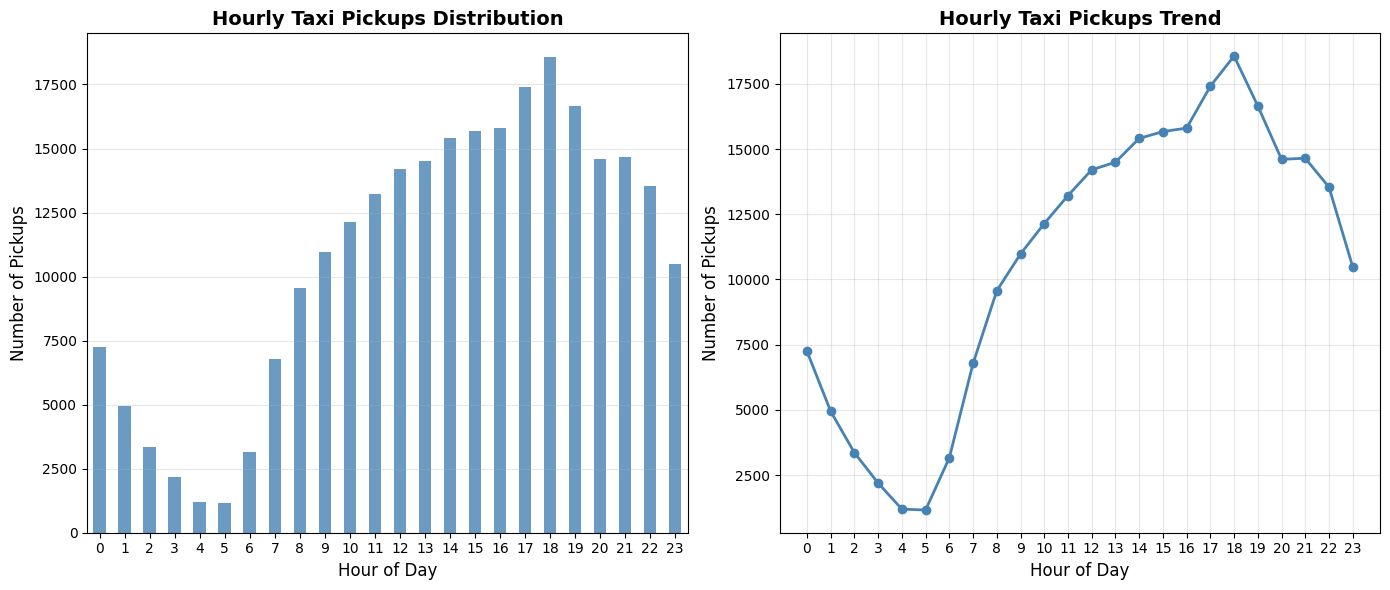


✓ Hourly trends analysis complete!



In [49]:
# Find and show the hourly trends in taxi pickups


print("="*50)
print("HOURLY TRENDS IN TAXI PICKUPS")
print("="*50)

# Check if pickup datetime column exists
pickup_col = None
for col in df.columns:
    if 'pickup' in col.lower() and 'datetime' in col.lower():
        pickup_col = col
        break

if pickup_col is None:
    print("\n⚠ Warning: No pickup datetime column found")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print(f"\nUsing column: {pickup_col}")

    # Ensure column is datetime type
    if not pd.api.types.is_datetime64_any_dtype(df[pickup_col]):
        print(f"Converting {pickup_col} to datetime...")
        df[pickup_col] = pd.to_datetime(df[pickup_col])

    # Extract hour from pickup datetime
    df['pickup_hour'] = df[pickup_col].dt.hour

    # Calculate hourly pickup counts
    hourly_pickups = df['pickup_hour'].value_counts().sort_index()

    print("\n--- Hourly Pickup Counts ---")
    print(hourly_pickups)

    # Calculate percentages
    hourly_percentages = (hourly_pickups / len(df) * 100).round(2)

    # Create summary table
    hourly_summary = pd.DataFrame({
        'Hour': hourly_pickups.index,
        'Pickup Count': hourly_pickups.values,
        'Percentage': hourly_percentages.values
    })

    print("\n--- Hourly Pickup Summary ---")
    print(hourly_summary.to_string(index=False))

    # Identify peak hours
    print("\n--- Peak Hours Analysis ---")
    top_3_hours = hourly_pickups.nlargest(3)
    print(f"Top 3 busiest hours:")
    for hour, count in top_3_hours.items():
        pct = (count / len(df) * 100)
        print(f"  {hour}:00 - {count:,} pickups ({pct:.2f}%)")

    # Identify off-peak hours
    bottom_3_hours = hourly_pickups.nsmallest(3)
    print(f"\nTop 3 quietest hours:")
    for hour, count in bottom_3_hours.items():
        pct = (count / len(df) * 100)
        print(f"  {hour}:00 - {count:,} pickups ({pct:.2f}%)")

    # Time period analysis
    print("\n--- Time Period Analysis ---")

    # Define time periods
    morning_rush = df[df['pickup_hour'].isin([7, 8, 9])].shape[0]
    daytime = df[df['pickup_hour'].isin([10, 11, 12, 13, 14, 15, 16])].shape[0]
    evening_rush = df[df['pickup_hour'].isin([17, 18, 19, 20])].shape[0]
    night = df[df['pickup_hour'].isin([21, 22, 23, 0, 1, 2, 3, 4, 5, 6])].shape[0]

    print(f"Morning Rush (7-9 AM): {morning_rush:,} ({morning_rush/len(df)*100:.2f}%)")
    print(f"Daytime (10 AM-4 PM): {daytime:,} ({daytime/len(df)*100:.2f}%)")
    print(f"Evening Rush (5-8 PM): {evening_rush:,} ({evening_rush/len(df)*100:.2f}%)")
    print(f"Night (9 PM-6 AM): {night:,} ({night/len(df)*100:.2f}%)")

    # Visualization
    import matplotlib.pyplot as plt

    print("\n--- Generating Visualization ---")

    plt.figure(figsize=(14, 6))

    # Bar plot
    plt.subplot(1, 2, 1)
    hourly_pickups.plot(kind='bar', color='steelblue', alpha=0.8)
    plt.title('Hourly Taxi Pickups Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Number of Pickups', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)

    # Line plot
    plt.subplot(1, 2, 2)
    hourly_pickups.plot(kind='line', marker='o', color='steelblue', linewidth=2, markersize=6)
    plt.title('Hourly Taxi Pickups Trend', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Number of Pickups', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24))

    plt.tight_layout()
    plt.show()

    print("\n✓ Hourly trends analysis complete!")

print("\n" + "="*50)



DAILY TRENDS IN TAXI PICKUPS (DAYS OF THE WEEK)

--- Daily Pickup Counts ---
pickup_day
Monday       31688
Tuesday      37438
Wednesday    39903
Thursday     40184
Friday       38093
Saturday     38436
Sunday       31709
Name: count, dtype: int64

--- Daily Pickup Summary ---
      Day  Pickup Count  Percentage
   Monday         31688       12.31
  Tuesday         37438       14.54
Wednesday         39903       15.50
 Thursday         40184       15.61
   Friday         38093       14.80
 Saturday         38436       14.93
   Sunday         31709       12.32

--- Peak Days Analysis ---
Busiest day: Thursday (40,184 pickups)
Quietest day: Monday (31,688 pickups)

--- Weekday vs Weekend ---
Weekday pickups (Mon-Fri): 187,306 (72.75%)
Weekend pickups (Sat-Sun): 70,145 (27.25%)

--- Generating Visualization ---


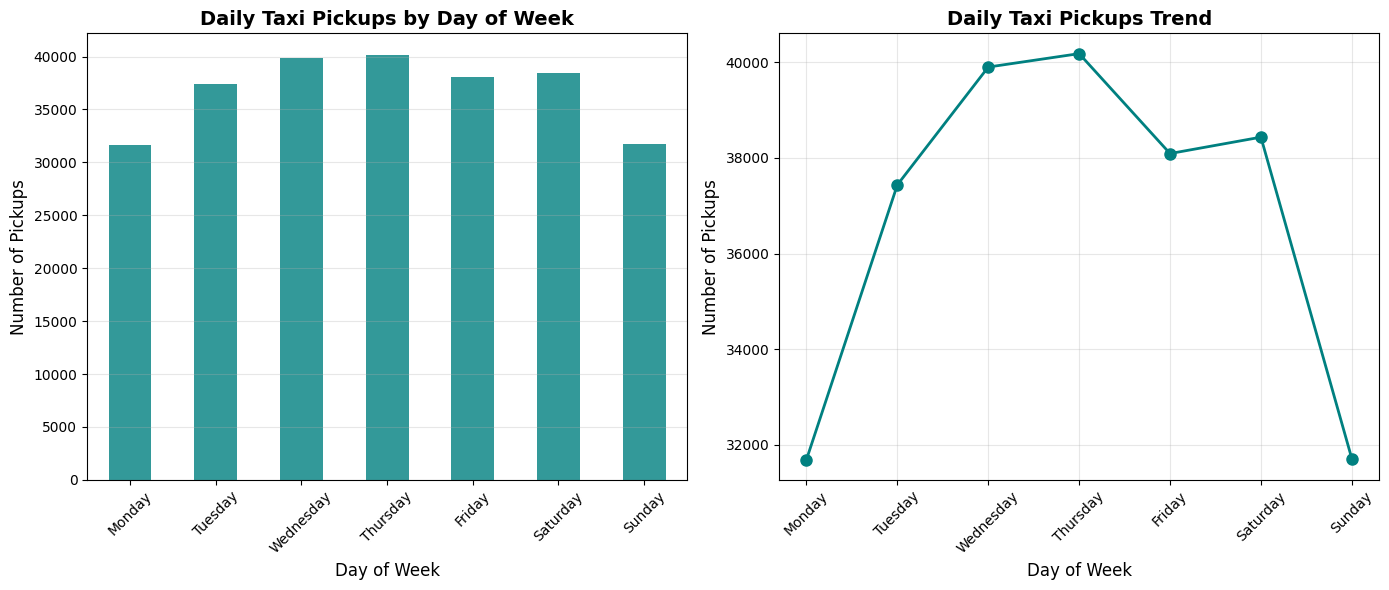


✓ Daily trends analysis complete!


In [50]:
# Find and show the daily trends in taxi pickups (days of the week)


print("="*50)
print("DAILY TRENDS IN TAXI PICKUPS (DAYS OF THE WEEK)")
print("="*50)

# Extract day of week from pickup datetime
df['pickup_day'] = df[pickup_col].dt.day_name()
df['pickup_dayofweek'] = df[pickup_col].dt.dayofweek  # 0=Monday, 6=Sunday

# Calculate daily pickup counts
# Order by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = df['pickup_day'].value_counts().reindex(day_order)

print("\n--- Daily Pickup Counts ---")
print(daily_pickups)

# Calculate percentages
daily_percentages = (daily_pickups / len(df) * 100).round(2)

# Create summary table
daily_summary = pd.DataFrame({
    'Day': daily_pickups.index,
    'Pickup Count': daily_pickups.values,
    'Percentage': daily_percentages.values
})

print("\n--- Daily Pickup Summary ---")
print(daily_summary.to_string(index=False))

# Identify busiest and quietest days
print("\n--- Peak Days Analysis ---")
busiest_day = daily_pickups.idxmax()
quietest_day = daily_pickups.idxmin()
print(f"Busiest day: {busiest_day} ({daily_pickups[busiest_day]:,} pickups)")
print(f"Quietest day: {quietest_day} ({daily_pickups[quietest_day]:,} pickups)")

# Weekday vs Weekend comparison
weekday_pickups = df[df['pickup_dayofweek'] < 5].shape[0]
weekend_pickups = df[df['pickup_dayofweek'] >= 5].shape[0]

print("\n--- Weekday vs Weekend ---")
print(f"Weekday pickups (Mon-Fri): {weekday_pickups:,} ({weekday_pickups/len(df)*100:.2f}%)")
print(f"Weekend pickups (Sat-Sun): {weekend_pickups:,} ({weekend_pickups/len(df)*100:.2f}%)")

# Visualization
import matplotlib.pyplot as plt

print("\n--- Generating Visualization ---")

plt.figure(figsize=(14, 6))

# Bar plot
plt.subplot(1, 2, 1)
daily_pickups.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Daily Taxi Pickups by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Line plot
plt.subplot(1, 2, 2)
daily_pickups.plot(kind='line', marker='o', color='teal', linewidth=2, markersize=8)
plt.title('Daily Taxi Pickups Trend', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\n✓ Daily trends analysis complete!")
print("="*50)



MONTHLY TRENDS IN TAXI PICKUPS

--- Monthly Pickup Counts ---
pickup_month_name
January      20921
February     20131
March        23360
April        22179
May          23880
June         22306
July         19380
August       18621
September    18782
October      23080
November     22504
December     22307
Name: count, dtype: int64

--- Monthly Pickup Summary ---
    Month  Pickup Count  Percentage
  January         20921        8.13
 February         20131        7.82
    March         23360        9.07
    April         22179        8.61
      May         23880        9.28
     June         22306        8.66
     July         19380        7.53
   August         18621        7.23
September         18782        7.30
  October         23080        8.96
 November         22504        8.74
 December         22307        8.66

--- Peak Months Analysis ---
Busiest month: May (23,880 pickups)
Quietest month: August (18,621 pickups)

--- Seasonal Analysis ---
Spring (Mar-May): 69,419 (26.96%)

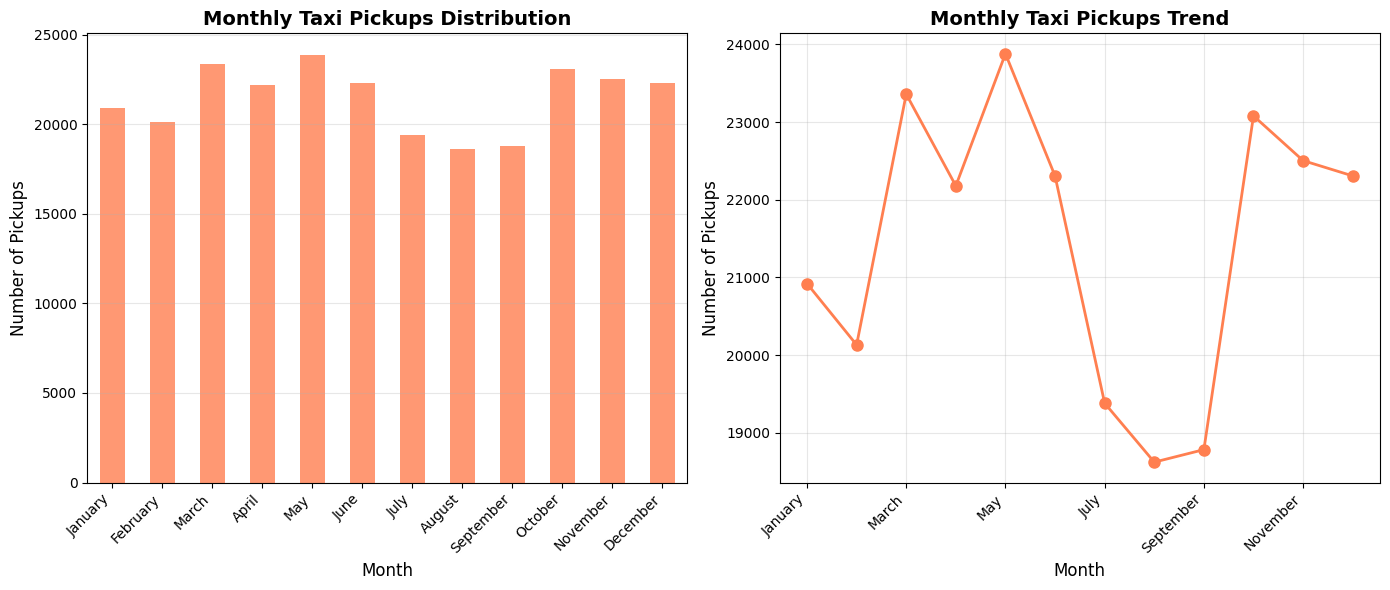


✓ Monthly trends analysis complete!


In [52]:

# Show the monthly trends in pickups

print("="*50)
print("MONTHLY TRENDS IN TAXI PICKUPS")
print("="*50)

# Extract month from pickup datetime
df['pickup_month'] = df[pickup_col].dt.month
df['pickup_month_name'] = df[pickup_col].dt.month_name()

# Calculate monthly pickup counts
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups = df['pickup_month_name'].value_counts().reindex(month_order)

print("\n--- Monthly Pickup Counts ---")
print(monthly_pickups)

# Calculate percentages
monthly_percentages = (monthly_pickups / len(df) * 100).round(2)

# Create summary table
monthly_summary = pd.DataFrame({
    'Month': monthly_pickups.index,
    'Pickup Count': monthly_pickups.values,
    'Percentage': monthly_percentages.values
})

print("\n--- Monthly Pickup Summary ---")
print(monthly_summary.to_string(index=False))

# Identify busiest and quietest months
print("\n--- Peak Months Analysis ---")
busiest_month = monthly_pickups.idxmax()
quietest_month = monthly_pickups.idxmin()
print(f"Busiest month: {busiest_month} ({monthly_pickups[busiest_month]:,} pickups)")
print(f"Quietest month: {quietest_month} ({monthly_pickups[quietest_month]:,} pickups)")

# Seasonal analysis
print("\n--- Seasonal Analysis ---")
spring = df[df['pickup_month'].isin([3, 4, 5])].shape[0]
summer = df[df['pickup_month'].isin([6, 7, 8])].shape[0]
fall = df[df['pickup_month'].isin([9, 10, 11])].shape[0]
winter = df[df['pickup_month'].isin([12, 1, 2])].shape[0]

print(f"Spring (Mar-May): {spring:,} ({spring/len(df)*100:.2f}%)")
print(f"Summer (Jun-Aug): {summer:,} ({summer/len(df)*100:.2f}%)")
print(f"Fall (Sep-Nov): {fall:,} ({fall/len(df)*100:.2f}%)")
print(f"Winter (Dec-Feb): {winter:,} ({winter/len(df)*100:.2f}%)")

# Visualization
import matplotlib.pyplot as plt

print("\n--- Generating Visualization ---")

plt.figure(figsize=(14, 6))

# Bar plot
plt.subplot(1, 2, 1)
monthly_pickups.plot(kind='bar', color='coral', alpha=0.8)
plt.title('Monthly Taxi Pickups Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Line plot
plt.subplot(1, 2, 2)
monthly_pickups.plot(kind='line', marker='o', color='coral', linewidth=2, markersize=8)
plt.title('Monthly Taxi Pickups Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\n✓ Monthly trends analysis complete!")
print("="*50)



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

FINANCIAL PARAMETERS ANALYSIS

Analyzing parameters: ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

PARAMETER: fare_amount

--- Basic Statistics ---
Count: 257,451
Mean: 15.09
Median: 12.80
Std Dev: 8.81
Min: 0.01
Max: 59.50

--- Zero Values ---
Zero values: 0 (0.00%)

--- Negative Values ---
Negative values: 0 (0.00%)

--- Valid (Positive) Values Statistics ---
Count: 257,451
Mean: 15.09
Median: 12.80
25th percentile: 8.60
75th percentile: 18.40


PARAMETER: tip_amount

--- Basic Statistics ---
Count: 257,451
Mean: 2.80
Median: 2.72
Std Dev: 2.26
Min: 0.00
Max: 13.00

--- Zero Values ---
Zero values: 56,967 (22.13%)

--- Negative Values ---
Negative values: 0 (0.00%)

--- Valid (Positive) Values Statistics ---
Count: 200,484
Mean: 3.60
Median: 3.16
25th percentile: 2.27
75th percentile: 4.48


PARAMETER: total_amount

--- Basic Statistics ---
Count: 257,451
Mean: 22.81
Median: 20.00
Std Dev: 10.62
Min: 1.01
Max: 65.10

--- Zero Values ---
Zero values: 0 (0.00%)

--- N

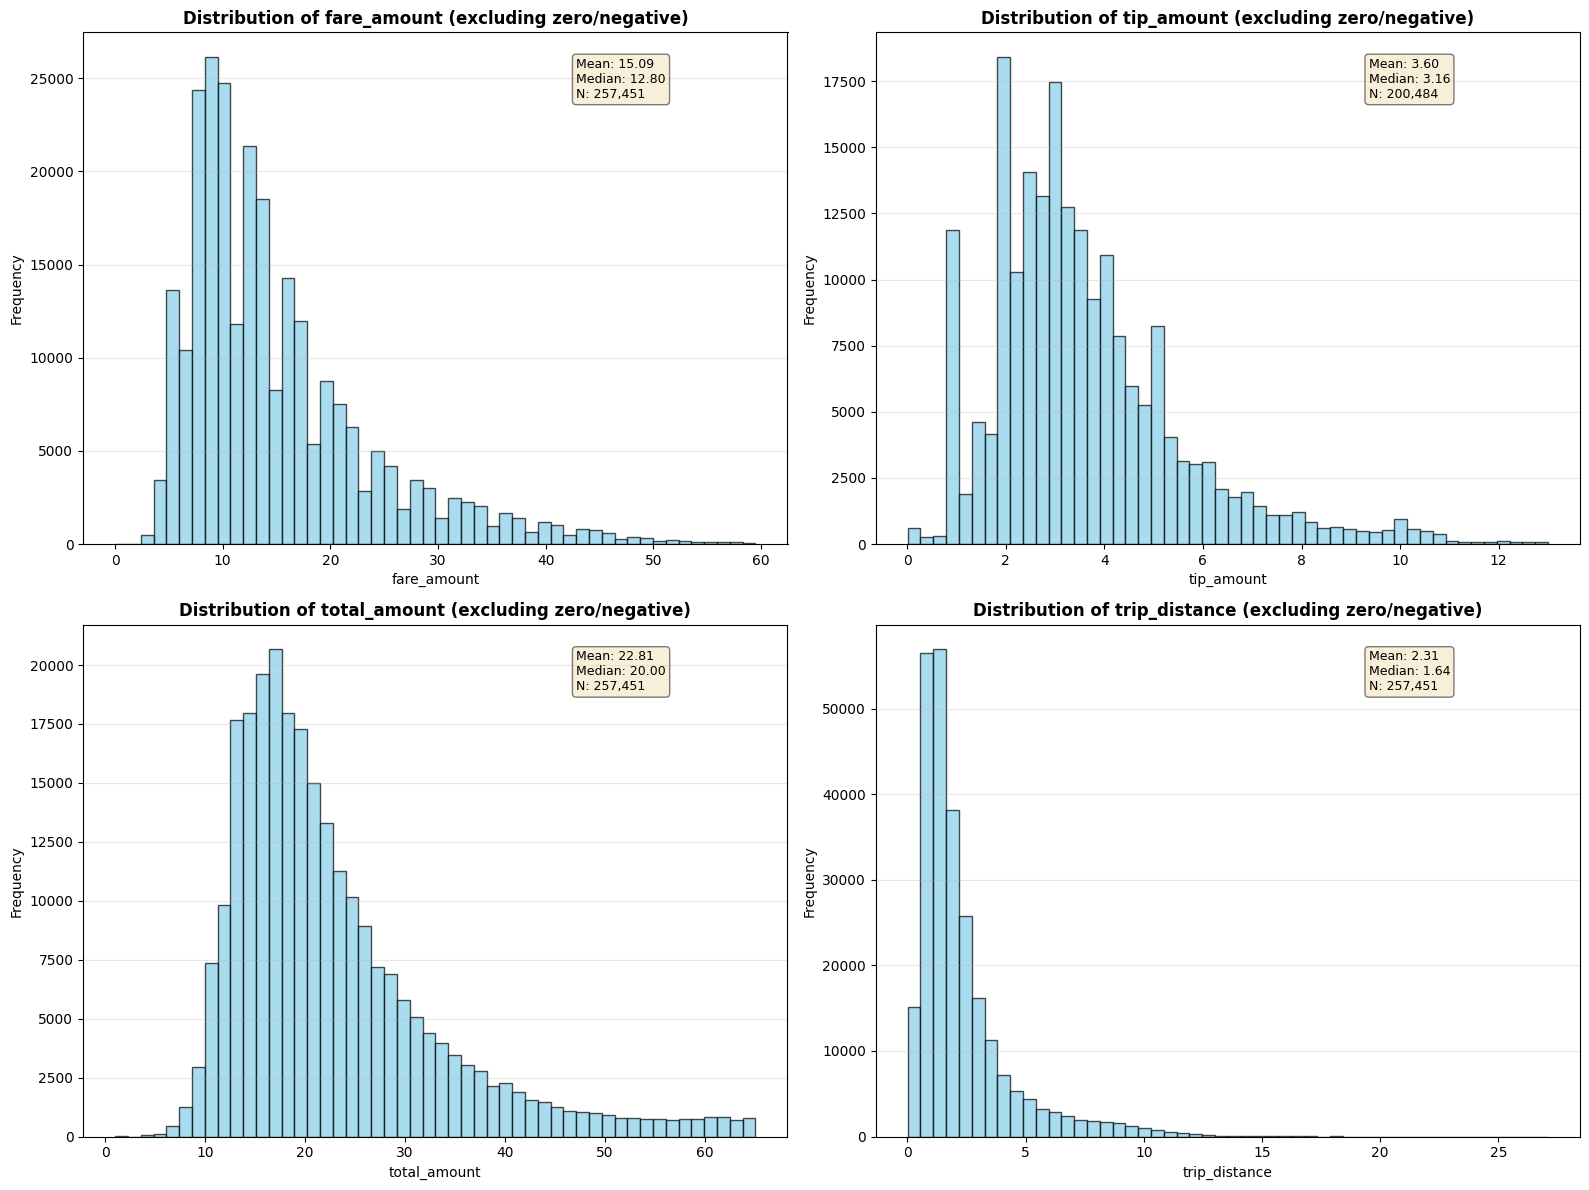

In [53]:
# Analyse the above parameters


print("="*50)
print("FINANCIAL PARAMETERS ANALYSIS")
print("="*50)

# Define financial parameters to analyze
financial_params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check which parameters exist in the dataframe
financial_params = [col for col in financial_params if col in df.columns]

print(f"\nAnalyzing parameters: {financial_params}\n")

# =============================================================================
# Analyze each parameter
# =============================================================================

for param in financial_params:
    print("="*60)
    print(f"PARAMETER: {param}")
    print("="*60)

    # Basic statistics
    print(f"\n--- Basic Statistics ---")
    print(f"Count: {df[param].count():,}")
    print(f"Mean: {df[param].mean():.2f}")
    print(f"Median: {df[param].median():.2f}")
    print(f"Std Dev: {df[param].std():.2f}")
    print(f"Min: {df[param].min():.2f}")
    print(f"Max: {df[param].max():.2f}")

    # Check for zero values
    zero_count = (df[param] == 0).sum()
    zero_pct = (zero_count / len(df)) * 100
    print(f"\n--- Zero Values ---")
    print(f"Zero values: {zero_count:,} ({zero_pct:.2f}%)")

    # Check for negative values
    negative_count = (df[param] < 0).sum()
    negative_pct = (negative_count / len(df)) * 100
    print(f"\n--- Negative Values ---")
    print(f"Negative values: {negative_count:,} ({negative_pct:.2f}%)")

    if negative_count > 0:
        print(f"Sample negative values: {df[df[param] < 0][param].head().tolist()}")

    # Distribution of non-zero, non-negative values
    valid_values = df[(df[param] > 0)]
    if len(valid_values) > 0:
        print(f"\n--- Valid (Positive) Values Statistics ---")
        print(f"Count: {len(valid_values):,}")
        print(f"Mean: {valid_values[param].mean():.2f}")
        print(f"Median: {valid_values[param].median():.2f}")
        print(f"25th percentile: {valid_values[param].quantile(0.25):.2f}")
        print(f"75th percentile: {valid_values[param].quantile(0.75):.2f}")

    print("\n")

# =============================================================================
# Summary Table
# =============================================================================

print("="*80)
print("SUMMARY TABLE - ZERO AND NEGATIVE VALUES")
print("="*80)

summary_data = []
for param in financial_params:
    zero_count = (df[param] == 0).sum()
    negative_count = (df[param] < 0).sum()
    valid_count = ((df[param] > 0)).sum()

    summary_data.append({
        'Parameter': param,
        'Total Records': len(df),
        'Zero Values': zero_count,
        'Zero %': f"{(zero_count/len(df)*100):.2f}%",
        'Negative Values': negative_count,
        'Negative %': f"{(negative_count/len(df)*100):.2f}%",
        'Valid (>0)': valid_count,
        'Valid %': f"{(valid_count/len(df)*100):.2f}%"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + summary_df.to_string(index=False))

# =============================================================================
# Visualization
# =============================================================================

print("\n--- Generating Visualizations ---")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, param in enumerate(financial_params):
    # Filter out zero and negative values for better visualization
    valid_data = df[df[param] > 0][param]

    # Plot histogram
    axes[i].hist(valid_data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {param} (excluding zero/negative)', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(param, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

    # Add statistics text
    stats_text = f'Mean: {valid_data.mean():.2f}\nMedian: {valid_data.median():.2f}\nN: {len(valid_data):,}'
    axes[i].text(0.7, 0.95, stats_text, transform=axes[i].transAxes,
                fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# =============================================================================
# Box plots for outlier visualization



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [54]:
# Create a df with non zero entries for the selected parameters.
# Create a df with non zero entries for the selected parameters.

print("="*50)
print("CREATING DATAFRAME WITH NON-ZERO ENTRIES")
print("="*50)

# Define financial parameters
financial_params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check which parameters exist in the dataframe
financial_params = [col for col in financial_params if col in df.columns]

print(f"\nFiltering for non-zero values in: {financial_params}")

# Store original dataframe size
original_rows = len(df)
print(f"\nOriginal dataframe rows: {original_rows:,}")

# Show counts of zero values before filtering
print("\n--- Zero Values Before Filtering ---")
for param in financial_params:
    zero_count = (df[param] == 0).sum()
    print(f"{param}: {zero_count:,} zero values ({zero_count/len(df)*100:.2f}%)")

# Create a copy of the dataframe with non-zero entries
# Filter: Keep only rows where ALL financial parameters are greater than zero
df_nonzero = df.copy()

for param in financial_params:
    df_nonzero = df_nonzero[df_nonzero[param] > 0]

df_nonzero = df_nonzero.reset_index(drop=True)

# Display results
new_rows = len(df_nonzero)
rows_removed = original_rows - new_rows

print("\n" + "="*50)
print("FILTERING RESULTS")
print("="*50)

print(f"\nRows before filtering: {original_rows:,}")
print(f"Rows after filtering: {new_rows:,}")
print(f"Rows removed: {rows_removed:,} ({rows_removed/original_rows*100:.2f}%)")
print(f"Rows retained: {new_rows/original_rows*100:.2f}%")

# Verify no zero values remain in financial parameters
print("\n--- Verification: Zero Values After Filtering ---")
all_clear = True
for param in financial_params:
    zero_count = (df_nonzero[param] == 0).sum()
    if zero_count == 0:
        print(f"✓ {param}: {zero_count} zero values")
    else:
        print(f"✗ {param}: {zero_count} zero values (filtering issue!)")
        all_clear = False

if all_clear:
    print("\n✓✓✓ SUCCESS: All zero values removed from financial parameters! ✓✓✓")

# Show statistics comparison
print("\n" + "="*50)
print("STATISTICS COMPARISON")
print("="*50)

comparison_data = []
for param in financial_params:
    comparison_data.append({
        'Parameter': param,
        'Original Mean': f"{df[param].mean():.2f}",
        'Filtered Mean': f"{df_nonzero[param].mean():.2f}",
        'Original Median': f"{df[param].median():.2f}",
        'Filtered Median': f"{df_nonzero[param].median():.2f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

# Display first few rows
print("\n--- Sample of Filtered Dataframe ---")
display_cols = ['tpep_pickup_datetime'] + financial_params
display_cols = [col for col in display_cols if col in df_nonzero.columns]
print(df_nonzero[display_cols].head(10))

print("\n" + "="*50)
print(f"New dataframe 'df_nonzero' created with {len(df_nonzero):,} rows")
print("="*50)



CREATING DATAFRAME WITH NON-ZERO ENTRIES

Filtering for non-zero values in: ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

Original dataframe rows: 257,451

--- Zero Values Before Filtering ---
fare_amount: 0 zero values (0.00%)
tip_amount: 56,967 zero values (22.13%)
total_amount: 0 zero values (0.00%)
trip_distance: 0 zero values (0.00%)

FILTERING RESULTS

Rows before filtering: 257,451
Rows after filtering: 200,484
Rows removed: 56,967 (22.13%)
Rows retained: 77.87%

--- Verification: Zero Values After Filtering ---
✓ fare_amount: 0 zero values
✓ tip_amount: 0 zero values
✓ total_amount: 0 zero values
✓ trip_distance: 0 zero values

✓✓✓ SUCCESS: All zero values removed from financial parameters! ✓✓✓

STATISTICS COMPARISON

    Parameter Original Mean Filtered Mean Original Median Filtered Median
  fare_amount         15.09         14.83           12.80           12.80
   tip_amount          2.80          3.60            2.72            3.16
 total_amount         22

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

MONTHLY REVENUE ANALYSIS

--- Monthly Revenue (Total Amount) ---
pickup_month_name
January      459974.08
February     444417.11
March        527221.45
April        500952.15
May          550975.62
June         512025.57
July         440512.08
August       423457.72
September    439515.78
October      538160.31
November     521281.80
December     515189.77
Name: total_amount, dtype: float64

--- Detailed Monthly Revenue Statistics ---
                   Total Revenue  Average Fare  Median Fare  Number of Trips  Min Fare  Max Fare
pickup_month_name                                                                               
January                459974.08     21.986238        19.20            20921      1.19     65.10
February               444417.11     22.076256        19.32            20131      4.50     65.10
March                  527221.45     22.569411        19.70            23360      4.50     65.10
April                  500952.15     22.586778        19.80            22179

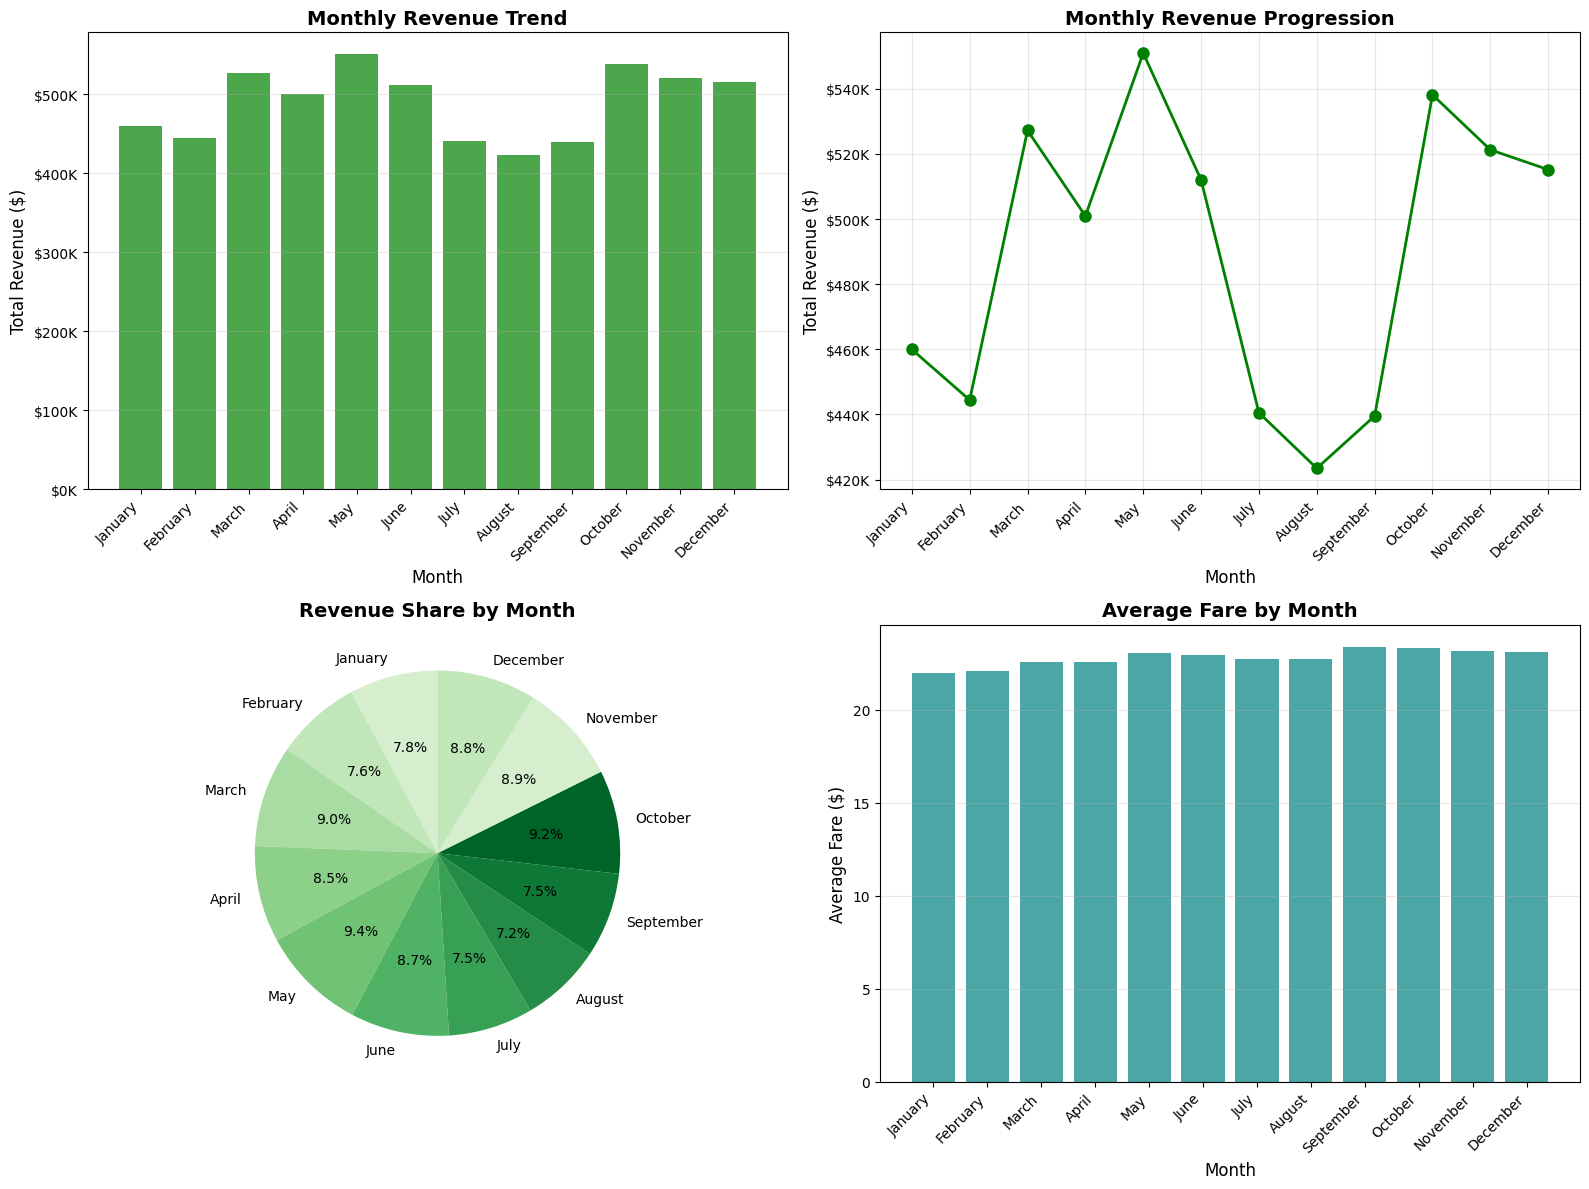


✓ Monthly revenue analysis complete!


In [55]:
# Group data by month and analyse monthly revenue


print("="*50)
print("MONTHLY REVENUE ANALYSIS")
print("="*50)

# Ensure we have month column
if 'pickup_month' not in df.columns:
    df['pickup_month'] = df[pickup_col].dt.month
if 'pickup_month_name' not in df.columns:
    df['pickup_month_name'] = df[pickup_col].dt.month_name()

# Group data by month and calculate total revenue
monthly_revenue = df.groupby('pickup_month_name')['total_amount'].sum()

# Order by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(month_order)

print("\n--- Monthly Revenue (Total Amount) ---")
print(monthly_revenue)

# Calculate additional statistics
monthly_stats = df.groupby('pickup_month_name')['total_amount'].agg([
    ('Total Revenue', 'sum'),
    ('Average Fare', 'mean'),
    ('Median Fare', 'median'),
    ('Number of Trips', 'count'),
    ('Min Fare', 'min'),
    ('Max Fare', 'max')
]).reindex(month_order)

print("\n--- Detailed Monthly Revenue Statistics ---")
print(monthly_stats.to_string())

# Calculate percentage share of each month
total_revenue = monthly_revenue.sum()
monthly_revenue_pct = (monthly_revenue / total_revenue * 100).round(2)

# Create comprehensive summary
monthly_summary = pd.DataFrame({
    'Month': monthly_revenue.index,
    'Total Revenue': monthly_revenue.values,
    'Revenue %': monthly_revenue_pct.values,
    'Avg Fare': monthly_stats['Average Fare'].values,
    'Number of Trips': monthly_stats['Number of Trips'].values
})

print("\n--- Monthly Revenue Summary ---")
print(monthly_summary.to_string(index=False))

# Identify peak revenue months
print("\n--- Peak Revenue Analysis ---")
highest_revenue_month = monthly_revenue.idxmax()
lowest_revenue_month = monthly_revenue.idxmin()

print(f"Highest revenue month: {highest_revenue_month} (${monthly_revenue[highest_revenue_month]:,.2f})")
print(f"Lowest revenue month: {lowest_revenue_month} (${monthly_revenue[lowest_revenue_month]:,.2f})")
print(f"Total annual revenue: ${total_revenue:,.2f}")
print(f"Average monthly revenue: ${monthly_revenue.mean():,.2f}")

# Month-over-month growth
print("\n--- Month-over-Month Growth ---")
monthly_growth = monthly_revenue.pct_change() * 100
for i, (month, growth) in enumerate(zip(month_order[1:], monthly_growth[1:]), 1):
    if pd.notna(growth):
        direction = "📈" if growth > 0 else "📉"
        print(f"{month}: {growth:+.2f}% {direction}")

# Seasonal revenue analysis
print("\n--- Seasonal Revenue Analysis ---")
df['season'] = df['pickup_month'].apply(lambda x:
    'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Fall'
)

seasonal_revenue = df.groupby('season')['total_amount'].agg([
    ('Total Revenue', 'sum'),
    ('Avg Fare', 'mean'),
    ('Number of Trips', 'count')
])

# Order seasons
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_revenue = seasonal_revenue.reindex(season_order)

print(seasonal_revenue.to_string())

# Visualization
import matplotlib.pyplot as plt

print("\n--- Generating Visualizations ---")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar chart - Monthly Revenue
axes[0, 0].bar(range(len(monthly_revenue)), monthly_revenue.values, color='green', alpha=0.7)
axes[0, 0].set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month', fontsize=12)
axes[0, 0].set_ylabel('Total Revenue ($)', fontsize=12)
axes[0, 0].set_xticks(range(len(month_order)))
axes[0, 0].set_xticklabels(month_order, rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# Format y-axis as currency
axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 2. Line chart - Monthly Revenue Trend
axes[0, 1].plot(range(len(monthly_revenue)), monthly_revenue.values,
                marker='o', color='green', linewidth=2, markersize=8)
axes[0, 1].set_title('Monthly Revenue Progression', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month', fontsize=12)
axes[0, 1].set_ylabel('Total Revenue ($)', fontsize=12)
axes[0, 1].set_xticks(range(len(month_order)))
axes[0, 1].set_xticklabels(month_order, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 3. Pie chart - Revenue Share by Month
axes[1, 0].pie(monthly_revenue.values, labels=month_order, autopct='%1.1f%%',
               startangle=90, colors=plt.cm.Greens(range(50, 250, 20)))
axes[1, 0].set_title('Revenue Share by Month', fontsize=14, fontweight='bold')

# 4. Bar chart - Average Fare per Month
avg_fares = monthly_stats['Average Fare'].values
axes[1, 1].bar(range(len(avg_fares)), avg_fares, color='teal', alpha=0.7)
axes[1, 1].set_title('Average Fare by Month', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Average Fare ($)', fontsize=12)
axes[1, 1].set_xticks(range(len(month_order)))
axes[1, 1].set_xticklabels(month_order, rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Monthly revenue analysis complete!")
print("="*50)



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

QUARTERLY REVENUE PROPORTION ANALYSIS

--- Quarterly Revenue ---
Q1 (Jan-Mar): $1,431,612.64
Q2 (Apr-Jun): $1,563,953.34
Q3 (Jul-Sep): $1,303,485.58
Q4 (Oct-Dec): $1,574,631.88

Total Annual Revenue: $5,873,683.44

QUARTERLY REVENUE PROPORTION
Q1 (Jan-Mar):
  Revenue: $1,431,612.64
  Proportion: 24.37%

Q2 (Apr-Jun):
  Revenue: $1,563,953.34
  Proportion: 26.63%

Q3 (Jul-Sep):
  Revenue: $1,303,485.58
  Proportion: 22.19%

Q4 (Oct-Dec):
  Revenue: $1,574,631.88
  Proportion: 26.81%

--- Summary Table ---
     Quarter  Total Revenue  Proportion (%)
Q1 (Jan-Mar)     1431612.64           24.37
Q2 (Apr-Jun)     1563953.34           26.63
Q3 (Jul-Sep)     1303485.58           22.19
Q4 (Oct-Dec)     1574631.88           26.81

--- Detailed Quarterly Statistics ---
              Number of Trips  Average Fare  Total Revenue  Revenue %
quarter_name                                                         
Q1 (Jan-Mar)            64412     22.225868     1431612.64      24.37
Q2 (Apr-Jun)         

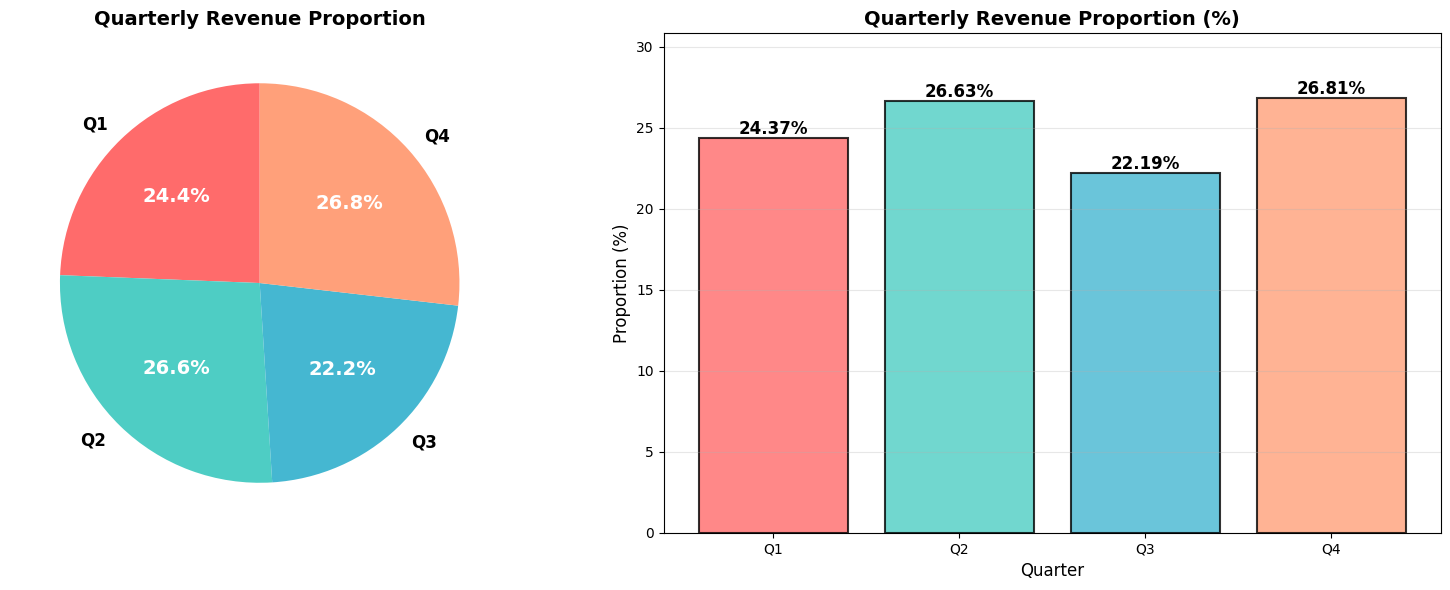


✓ Quarterly proportion analysis complete!


In [59]:
# Calculate proportion of each quarter

print("="*50)
print("QUARTERLY REVENUE PROPORTION ANALYSIS")
print("="*50)

# Create quarter column
df['pickup_quarter'] = df[pickup_col].dt.quarter

# Map quarter numbers to names
quarter_names = {1: 'Q1 (Jan-Mar)', 2: 'Q2 (Apr-Jun)', 3: 'Q3 (Jul-Sep)', 4: 'Q4 (Oct-Dec)'}
df['quarter_name'] = df['pickup_quarter'].map(quarter_names)

# Calculate quarterly revenue
quarterly_revenue = df.groupby('quarter_name')['total_amount'].sum()

# Order by quarter
quarter_order = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
quarterly_revenue = quarterly_revenue.reindex(quarter_order)

print("\n--- Quarterly Revenue ---")
for quarter, revenue in quarterly_revenue.items():
    print(f"{quarter}: ${revenue:,.2f}")

# Calculate total revenue
total_revenue = quarterly_revenue.sum()
print(f"\nTotal Annual Revenue: ${total_revenue:,.2f}")

# Calculate proportion (percentage) of each quarter
quarterly_proportion = (quarterly_revenue / total_revenue * 100).round(2)

print("\n" + "="*50)
print("QUARTERLY REVENUE PROPORTION")
print("="*50)

for quarter, proportion in quarterly_proportion.items():
    revenue = quarterly_revenue[quarter]
    print(f"{quarter}:")
    print(f"  Revenue: ${revenue:,.2f}")
    print(f"  Proportion: {proportion:.2f}%")
    print()

# Create summary table
quarterly_summary = pd.DataFrame({
    'Quarter': quarterly_revenue.index,
    'Total Revenue': quarterly_revenue.values,
    'Proportion (%)': quarterly_proportion.values
})

print("--- Summary Table ---")
print(quarterly_summary.to_string(index=False))

# Additional statistics
quarterly_stats = df.groupby('quarter_name')['total_amount'].agg([
    ('Number of Trips', 'count'),
    ('Average Fare', 'mean')
]).reindex(quarter_order)

quarterly_stats['Total Revenue'] = quarterly_revenue.values
quarterly_stats['Revenue %'] = quarterly_proportion.values

print("\n--- Detailed Quarterly Statistics ---")
print(quarterly_stats.to_string())

# Identify best performing quarter
best_quarter = quarterly_proportion.idxmax()
worst_quarter = quarterly_proportion.idxmin()
print(f"\n✓ Best performing quarter: {best_quarter} ({quarterly_proportion[best_quarter]:.2f}% of total revenue)")
print(f"✓ Worst performing quarter: {worst_quarter} ({quarterly_proportion[worst_quarter]:.2f}% of total revenue)")

# Visualization
import matplotlib.pyplot as plt

print("\n--- Generating Visualizations ---")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Pie chart - Revenue Proportion
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
wedges, texts, autotexts = axes[0].pie(quarterly_revenue.values,
                                        labels=['Q1', 'Q2', 'Q3', 'Q4'],
                                        autopct='%1.1f%%',
                                        startangle=90,
                                        colors=colors,
                                        textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Quarterly Revenue Proportion', fontsize=14, fontweight='bold')

# Make percentage text more visible
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

# 2. Bar chart with proportions
bars = axes[1].bar(range(4), quarterly_proportion.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_title('Quarterly Revenue Proportion (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Quarter', fontsize=12)
axes[1].set_ylabel('Proportion (%)', fontsize=12)
axes[1].set_xticks(range(4))
axes[1].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, max(quarterly_proportion.values) * 1.15)

# Add percentage labels on bars
for i, (bar, val) in enumerate(zip(bars, quarterly_proportion.values)):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\n✓ Quarterly proportion analysis complete!")
print("="*50)

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

RELATIONSHIP BETWEEN TRIP DISTANCE AND FARE AMOUNT

Original dataframe rows: 257,451
Filtered dataframe rows (distance > 0): 257,451
Rows removed (zero distance): 0

--- Basic Statistics ---
Trip Distance:
  Mean: 2.31 miles
  Median: 1.64 miles
  Min: 0.01 miles
  Max: 27.10 miles

Fare Amount:
  Mean: $15.09
  Median: $12.80
  Min: $0.01
  Max: $59.50

CORRELATION ANALYSIS

Pearson Correlation Coefficient: 0.9174
Interpretation: Strong positive correlation

This means: As trip distance increases, fare amount tends to increase.

--- Fare Per Mile Statistics ---
Average fare per mile: $8.72
Median fare per mile: $7.42

--- Generating Visualizations ---


/tmp/ipython-input-4121068378.py:105: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare_by_bin = df_distance.groupby('distance_bin')['fare_amount'].mean()


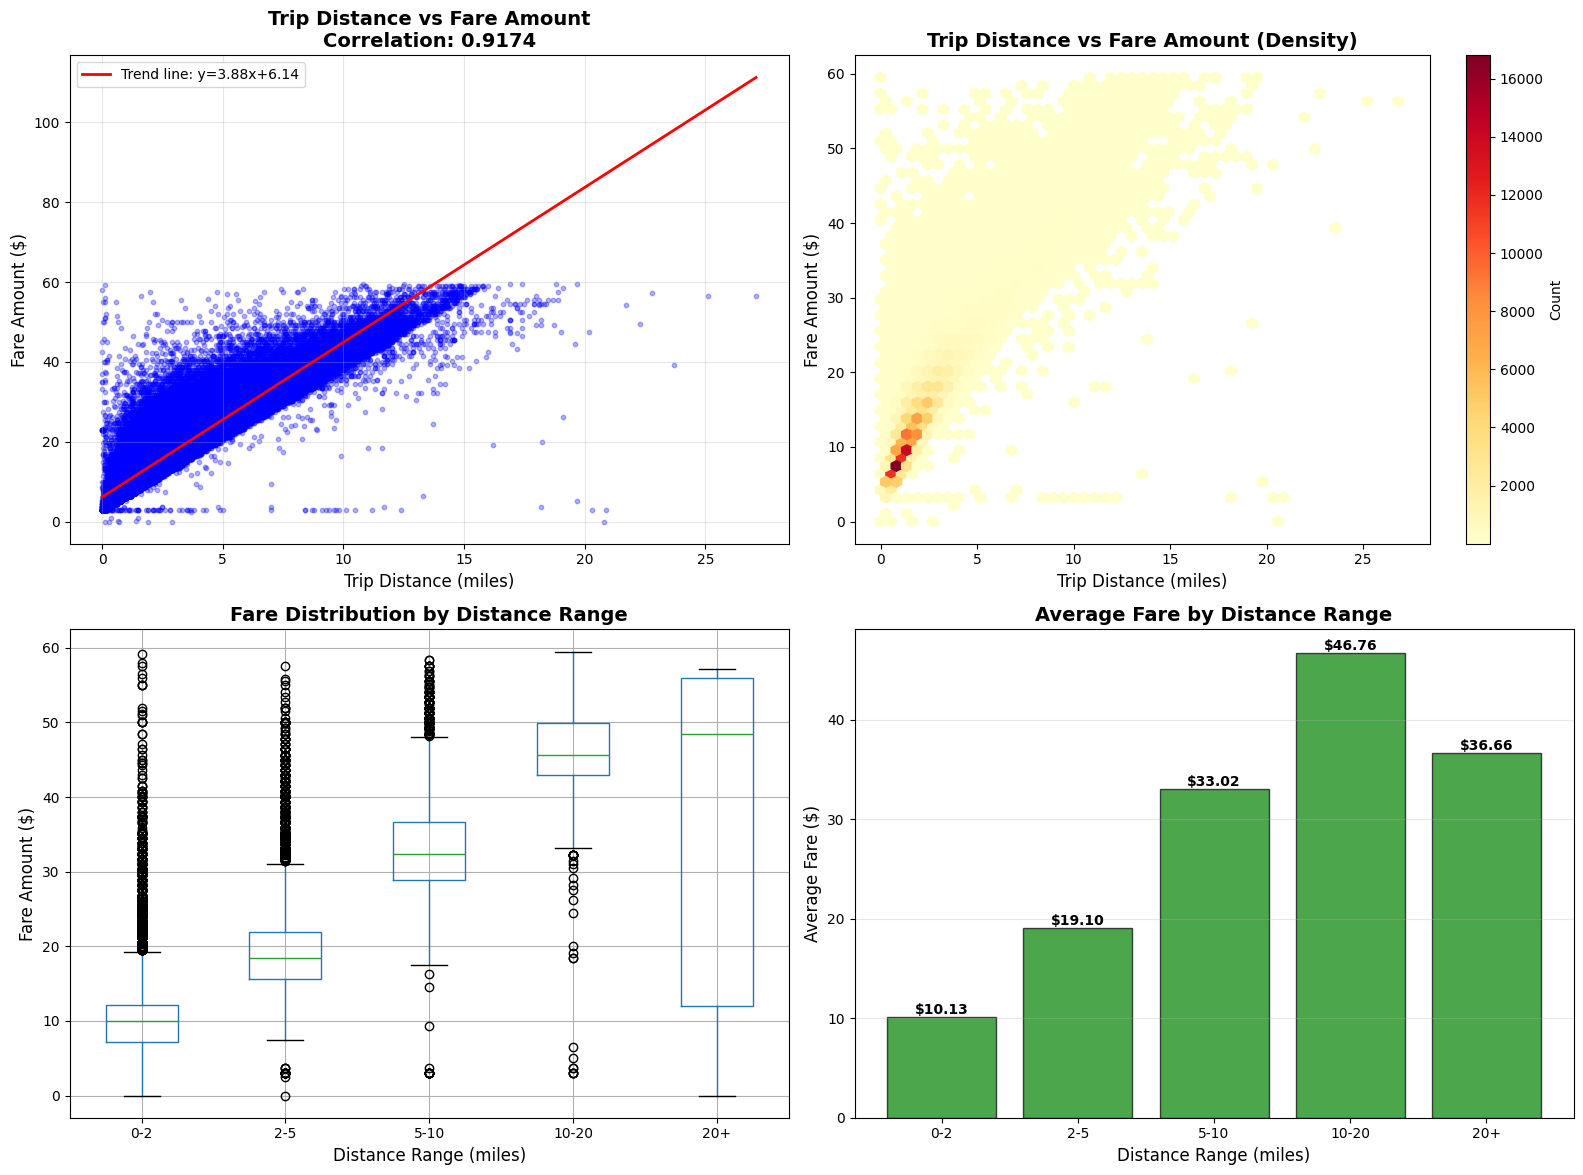


--- Average Fare and Fare Per Mile by Distance Range ---
               Avg Fare  Median Fare  Trip Count  Avg Fare/Mile  Median Fare/Mile
distance_bin                                                                     
0-2           10.126229         10.0      157258      10.418176          8.571429
2-5           19.104654         18.4       76368       6.478531          6.208333
5-10          33.015593         32.4       20411       4.809017          4.654919
10-20         46.759744         45.7        3404       4.044804          4.037037
20+           36.661000         48.5          10       1.585936          2.152301

✓ Trip distance vs fare amount analysis complete!


/tmp/ipython-input-4121068378.py:124: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_analysis = df_distance.groupby('distance_bin').agg({


In [61]:
# Show how trip fare is affected by distance

print("="*50)
print("RELATIONSHIP BETWEEN TRIP DISTANCE AND FARE AMOUNT")
print("="*50)

# Filter out trips with zero distance (as suggested in the hint)
df_distance = df[df['trip_distance'] > 0].copy()

print(f"\nOriginal dataframe rows: {len(df):,}")
print(f"Filtered dataframe rows (distance > 0): {len(df_distance):,}")
print(f"Rows removed (zero distance): {len(df) - len(df_distance):,}")

# Basic statistics
print("\n--- Basic Statistics ---")
print(f"Trip Distance:")
print(f"  Mean: {df_distance['trip_distance'].mean():.2f} miles")
print(f"  Median: {df_distance['trip_distance'].median():.2f} miles")
print(f"  Min: {df_distance['trip_distance'].min():.2f} miles")
print(f"  Max: {df_distance['trip_distance'].max():.2f} miles")

print(f"\nFare Amount:")
print(f"  Mean: ${df_distance['fare_amount'].mean():.2f}")
print(f"  Median: ${df_distance['fare_amount'].median():.2f}")
print(f"  Min: ${df_distance['fare_amount'].min():.2f}")
print(f"  Max: ${df_distance['fare_amount'].max():.2f}")

# Calculate correlation
correlation = df_distance['trip_distance'].corr(df_distance['fare_amount'])

print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)
print(f"\nPearson Correlation Coefficient: {correlation:.4f}")

# Interpret correlation
if correlation > 0.7:
    strength = "Strong positive"
elif correlation > 0.4:
    strength = "Moderate positive"
elif correlation > 0:
    strength = "Weak positive"
elif correlation > -0.4:
    strength = "Weak negative"
elif correlation > -0.7:
    strength = "Moderate negative"
else:
    strength = "Strong negative"

print(f"Interpretation: {strength} correlation")
print(f"\nThis means: As trip distance increases, fare amount tends to {'increase' if correlation > 0 else 'decrease'}.")

# Calculate fare per mile
df_distance['fare_per_mile'] = df_distance['fare_amount'] / df_distance['trip_distance']

print("\n--- Fare Per Mile Statistics ---")
print(f"Average fare per mile: ${df_distance['fare_per_mile'].mean():.2f}")
print(f"Median fare per mile: ${df_distance['fare_per_mile'].median():.2f}")

# Visualizations
import matplotlib.pyplot as plt
import numpy as np

print("\n--- Generating Visualizations ---")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatter plot with trend line
axes[0, 0].scatter(df_distance['trip_distance'], df_distance['fare_amount'],
                   alpha=0.3, s=10, color='blue')

# Add trend line
z = np.polyfit(df_distance['trip_distance'], df_distance['fare_amount'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df_distance['trip_distance'].min(), df_distance['trip_distance'].max(), 100)
axes[0, 0].plot(x_trend, p(x_trend), "r-", linewidth=2, label=f'Trend line: y={z[0]:.2f}x+{z[1]:.2f}')

axes[0, 0].set_title(f'Trip Distance vs Fare Amount\nCorrelation: {correlation:.4f}',
                     fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Trip Distance (miles)', fontsize=12)
axes[0, 0].set_ylabel('Fare Amount ($)', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Hexbin plot (density)
hb = axes[0, 1].hexbin(df_distance['trip_distance'], df_distance['fare_amount'],
                       gridsize=50, cmap='YlOrRd', mincnt=1)
axes[0, 1].set_title('Trip Distance vs Fare Amount (Density)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Trip Distance (miles)', fontsize=12)
axes[0, 1].set_ylabel('Fare Amount ($)', fontsize=12)
plt.colorbar(hb, ax=axes[0, 1], label='Count')

# 3. Box plot by distance bins
distance_bins = [0, 2, 5, 10, 20, df_distance['trip_distance'].max()]
distance_labels = ['0-2', '2-5', '5-10', '10-20', '20+']
df_distance['distance_bin'] = pd.cut(df_distance['trip_distance'], bins=distance_bins, labels=distance_labels)

df_distance.boxplot(column='fare_amount', by='distance_bin', ax=axes[1, 0])
axes[1, 0].set_title('Fare Distribution by Distance Range', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Distance Range (miles)', fontsize=12)
axes[1, 0].set_ylabel('Fare Amount ($)', fontsize=12)
axes[1, 0].get_figure().suptitle('')  # Remove default title

# 4. Average fare by distance bins
avg_fare_by_bin = df_distance.groupby('distance_bin')['fare_amount'].mean()
axes[1, 1].bar(range(len(avg_fare_by_bin)), avg_fare_by_bin.values,
               color='green', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Average Fare by Distance Range', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Distance Range (miles)', fontsize=12)
axes[1, 1].set_ylabel('Average Fare ($)', fontsize=12)
axes[1, 1].set_xticks(range(len(distance_labels)))
axes[1, 1].set_xticklabels(distance_labels)
axes[1, 1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(avg_fare_by_bin.values):
    axes[1, 1].text(i, v, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Additional analysis - Fare per mile by distance ranges
print("\n--- Average Fare and Fare Per Mile by Distance Range ---")
distance_analysis = df_distance.groupby('distance_bin').agg({
    'fare_amount': ['mean', 'median', 'count'],
    'fare_per_mile': ['mean', 'median']
})
distance_analysis.columns = ['Avg Fare', 'Median Fare', 'Trip Count', 'Avg Fare/Mile', 'Median Fare/Mile']
print(distance_analysis.to_string())

print("\n✓ Trip distance vs fare amount analysis complete!")
print("="*50)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [6]:
# Diagnostic check
print("Checking dataframe status...")

# Check if df exists
try:
    print(f"✓ df exists with {len(df):,} rows")
    print(f"Columns: {df.columns.tolist()}")
except NameError:
    print("✗ df is not defined - you need to load your data first!")
    print("\nPlease run the data loading code first:")
    print("df = pd.read_parquet('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/nyc_taxi_2023_sampled.parquet')")

Checking dataframe status...
✗ df is not defined - you need to load your data first!

Please run the data loading code first:
df = pd.read_parquet('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/nyc_taxi_2023_sampled.parquet')


In [7]:
# Load the data
import pandas as pd
import numpy as np

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')

# Load the dataframe
df = pd.read_parquet('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/nyc_taxi_2023_sampled.parquet')

print(f"✓ Data loaded: {len(df):,} rows, {len(df.columns)} columns")
print(f"Columns: {df.columns.tolist()}")

Mounted at /content/drive
✓ Data loaded: 300,000 rows, 20 columns
Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']


In [8]:
# Show relationship between fare and number of passengers
# Load the data
import pandas as pd
import numpy as np

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')

# Load the dataframe
df = pd.read_parquet('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/nyc_taxi_2023_sampled.parquet')

print(f"✓ Data loaded: {len(df):,} rows, {len(df.columns)} columns")
print(f"Columns: {df.columns.tolist()}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Data loaded: 300,000 rows, 20 columns
Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']


RELATIONSHIP BETWEEN TIP AMOUNT AND TRIP DISTANCE

Using columns: tip_amount and trip_distance

--- Filtering Data ---
Total rows before filtering: 300,000
Rows after filtering (tip > 0, distance > 0): 227,216
Rows removed: 72,784

--- Basic Statistics ---
Tip Amount:
  Mean: $4.58
  Median: $3.40
  Min: $0.01
  Max: $251.29

Trip Distance:
  Mean: 4.01 miles
  Median: 1.82 miles

CORRELATION ANALYSIS

Pearson Correlation Coefficient: 0.0292
Interpretation: Weak positive correlation

--- Tip Per Mile Statistics ---
Average tip per mile: $2.45
Median tip per mile: $1.79

--- Generating Visualizations ---


/tmp/ipython-input-4023453458.py:110: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip = df_tip.groupby('distance_bin')['tip_amount'].mean()


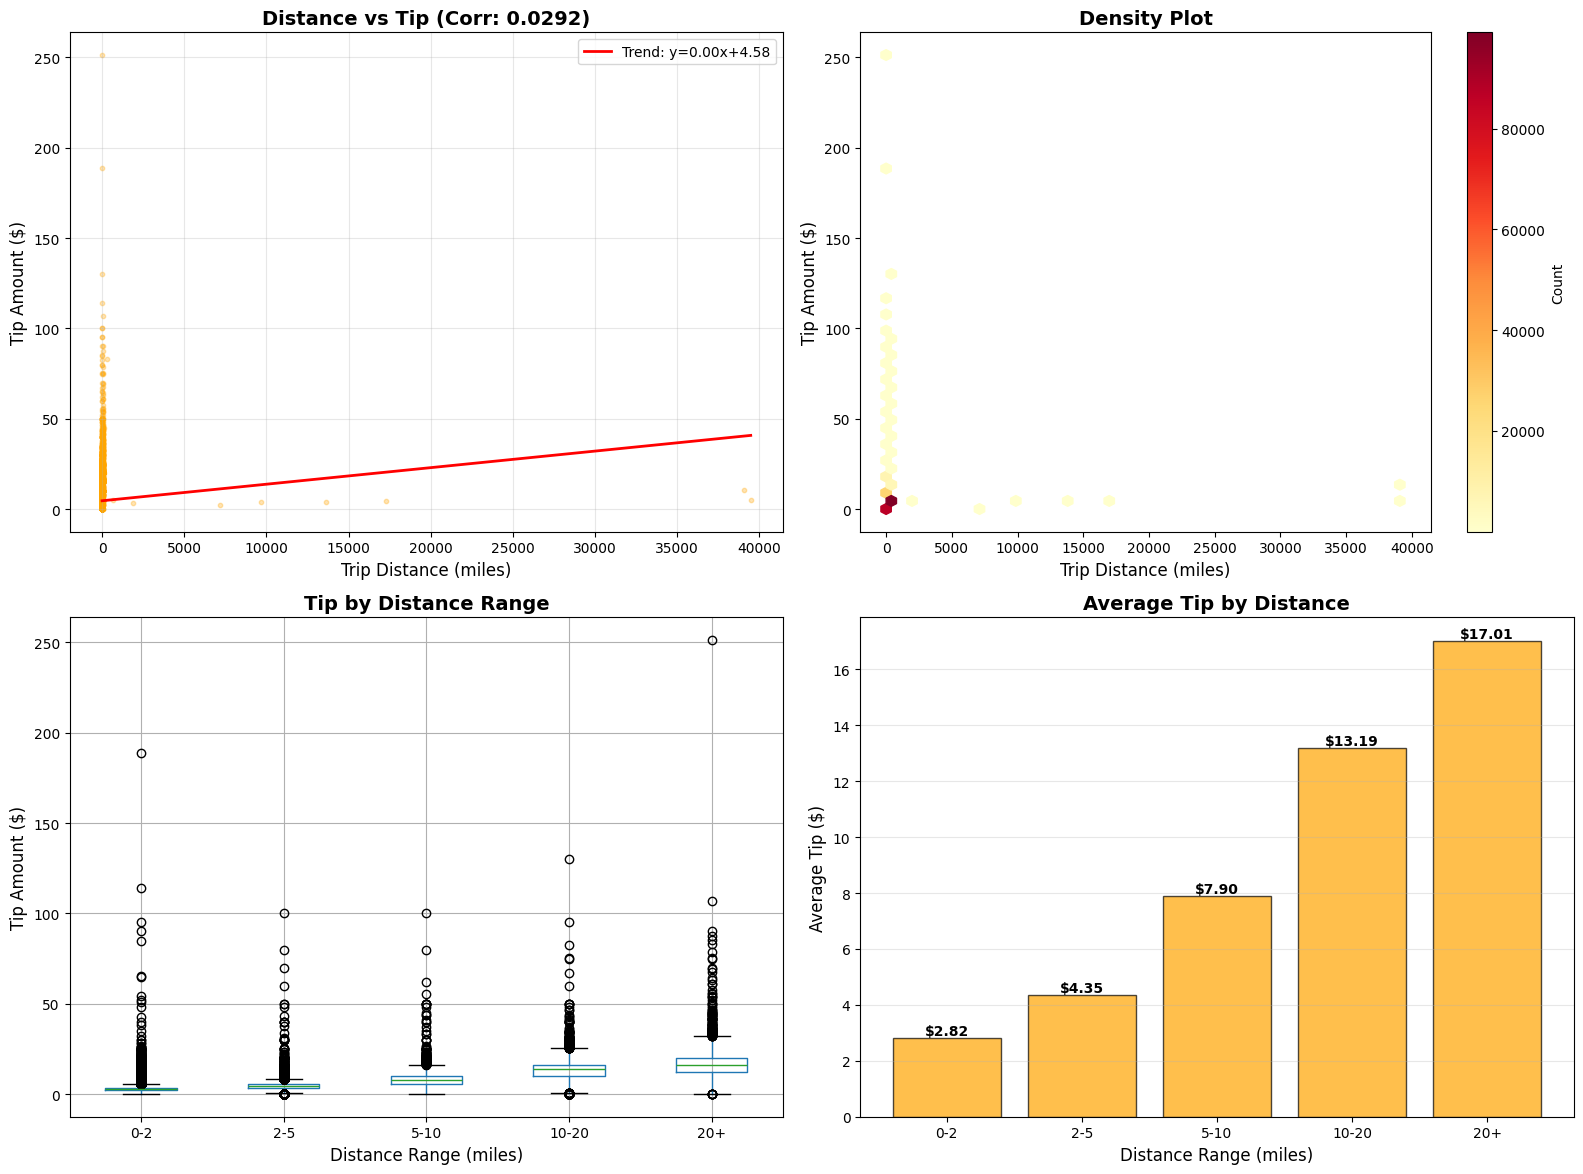


--- Tip Analysis by Distance Range ---
                Avg Tip  Median Tip  Trip Count  Avg Tip/Mile  Median Tip/Mile
distance_bin                                                                  
0-2            2.821278        2.74      124769      3.388518         2.411765
2-5            4.349162        4.30       64286      1.486728         1.497717
5-10           7.895113        7.60       19346      1.083484         1.121429
10-20         13.190730       13.59       16565      0.905252         0.923033
20+           17.008769       16.19        2250      0.721417         0.754205

✓ Tip vs distance analysis complete!


/tmp/ipython-input-4023453458.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_analysis = df_tip.groupby('distance_bin').agg({


In [10]:
# Show relationship between tip and trip distance

print("="*50)
print("RELATIONSHIP BETWEEN TIP AMOUNT AND TRIP DISTANCE")
print("="*50)

# Check if required columns exist
if 'tip_amount' not in df.columns or 'trip_distance' not in df.columns:
    print("\n⚠ Warning: Required columns not found")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print("\nUsing columns: tip_amount and trip_distance")

    # Filter for valid data (positive values)
    print("\n--- Filtering Data ---")
    print(f"Total rows before filtering: {len(df):,}")

    df_tip = df[(df['tip_amount'] > 0) &
                (df['trip_distance'] > 0)].copy()

    print(f"Rows after filtering (tip > 0, distance > 0): {len(df_tip):,}")
    print(f"Rows removed: {len(df) - len(df_tip):,}")

    # Basic statistics
    print("\n--- Basic Statistics ---")
    print(f"Tip Amount:")
    print(f"  Mean: ${df_tip['tip_amount'].mean():.2f}")
    print(f"  Median: ${df_tip['tip_amount'].median():.2f}")
    print(f"  Min: ${df_tip['tip_amount'].min():.2f}")
    print(f"  Max: ${df_tip['tip_amount'].max():.2f}")

    print(f"\nTrip Distance:")
    print(f"  Mean: {df_tip['trip_distance'].mean():.2f} miles")
    print(f"  Median: {df_tip['trip_distance'].median():.2f} miles")

    # Calculate correlation
    correlation = df_tip['trip_distance'].corr(df_tip['tip_amount'])

    print("\n" + "="*50)
    print("CORRELATION ANALYSIS")
    print("="*50)
    print(f"\nPearson Correlation Coefficient: {correlation:.4f}")

    # Interpret correlation
    if correlation > 0.7:
        strength = "Strong positive"
    elif correlation > 0.4:
        strength = "Moderate positive"
    elif correlation > 0:
        strength = "Weak positive"
    else:
        strength = "Negative"

    print(f"Interpretation: {strength} correlation")

    # Calculate tip per mile
    df_tip['tip_per_mile'] = df_tip['tip_amount'] / df_tip['trip_distance']

    print("\n--- Tip Per Mile Statistics ---")
    print(f"Average tip per mile: ${df_tip['tip_per_mile'].mean():.2f}")
    print(f"Median tip per mile: ${df_tip['tip_per_mile'].median():.2f}")

    # Visualizations
    import matplotlib.pyplot as plt
    import numpy as np

    print("\n--- Generating Visualizations ---")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Scatter plot with trend line
    axes[0, 0].scatter(df_tip['trip_distance'], df_tip['tip_amount'],
                       alpha=0.3, s=10, color='orange')

    # Add trend line
    z = np.polyfit(df_tip['trip_distance'], df_tip['tip_amount'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(df_tip['trip_distance'].min(),
                         df_tip['trip_distance'].max(), 100)
    axes[0, 0].plot(x_trend, p(x_trend), "r-", linewidth=2,
                    label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')

    axes[0, 0].set_title(f'Distance vs Tip (Corr: {correlation:.4f})',
                         fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Trip Distance (miles)', fontsize=12)
    axes[0, 0].set_ylabel('Tip Amount ($)', fontsize=12)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Hexbin plot
    hb = axes[0, 1].hexbin(df_tip['trip_distance'], df_tip['tip_amount'],
                           gridsize=50, cmap='YlOrRd', mincnt=1)
    axes[0, 1].set_title('Density Plot', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Trip Distance (miles)', fontsize=12)
    axes[0, 1].set_ylabel('Tip Amount ($)', fontsize=12)
    plt.colorbar(hb, ax=axes[0, 1], label='Count')

    # 3. Box plot by distance bins
    distance_bins = [0, 2, 5, 10, 20, df_tip['trip_distance'].max()]
    distance_labels = ['0-2', '2-5', '5-10', '10-20', '20+']
    df_tip['distance_bin'] = pd.cut(df_tip['trip_distance'], bins=distance_bins, labels=distance_labels)

    df_tip.boxplot(column='tip_amount', by='distance_bin', ax=axes[1, 0])
    axes[1, 0].set_title('Tip by Distance Range', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Distance Range (miles)', fontsize=12)
    axes[1, 0].set_ylabel('Tip Amount ($)', fontsize=12)
    axes[1, 0].get_figure().suptitle('')

    # 4. Average tip by distance bins
    avg_tip = df_tip.groupby('distance_bin')['tip_amount'].mean()
    axes[1, 1].bar(range(len(avg_tip)), avg_tip.values,
                   color='orange', alpha=0.7, edgecolor='black')
    axes[1, 1].set_title('Average Tip by Distance', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Distance Range (miles)', fontsize=12)
    axes[1, 1].set_ylabel('Average Tip ($)', fontsize=12)
    axes[1, 1].set_xticks(range(len(distance_labels)))
    axes[1, 1].set_xticklabels(distance_labels)
    axes[1, 1].grid(axis='y', alpha=0.3)

    # Add value labels
    for i, v in enumerate(avg_tip.values):
        axes[1, 1].text(i, v, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Additional analysis
    print("\n--- Tip Analysis by Distance Range ---")
    tip_analysis = df_tip.groupby('distance_bin').agg({
        'tip_amount': ['mean', 'median', 'count'],
        'tip_per_mile': ['mean', 'median']
    })
    tip_analysis.columns = ['Avg Tip', 'Median Tip', 'Trip Count', 'Avg Tip/Mile', 'Median Tip/Mile']
    print(tip_analysis.to_string())

    print("\n✓ Tip vs distance analysis complete!")
    print("="*50)

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

PAYMENT TYPE DISTRIBUTION ANALYSIS

Analyzing payment_type column...

--- Payment Type Distribution (by code) ---
payment_type
0     10101
1    233514
2     50554
3      1924
4      3907
Name: count, dtype: int64

--- Payment Type Distribution (by name) ---
payment_type_name
Credit Card    233514
Cash            50554
Other           10101
Dispute          3907
No Charge        1924
Name: count, dtype: int64

--- Payment Type Summary ---
Payment Type  Count  Percentage
 Credit Card 233514       77.84
        Cash  50554       16.85
       Other  10101        3.37
     Dispute   3907        1.30
   No Charge   1924        0.64

Total trips: 300,000

Most common payment type: Credit Card (77.84%)

DETAILED ANALYSIS BY PAYMENT TYPE

                    Avg Fare  Median Fare   Avg Tip  Median Tip  Avg Total  Median Total  Avg Distance  Median Distance
payment_type_name                                                                                                      
Cash               1

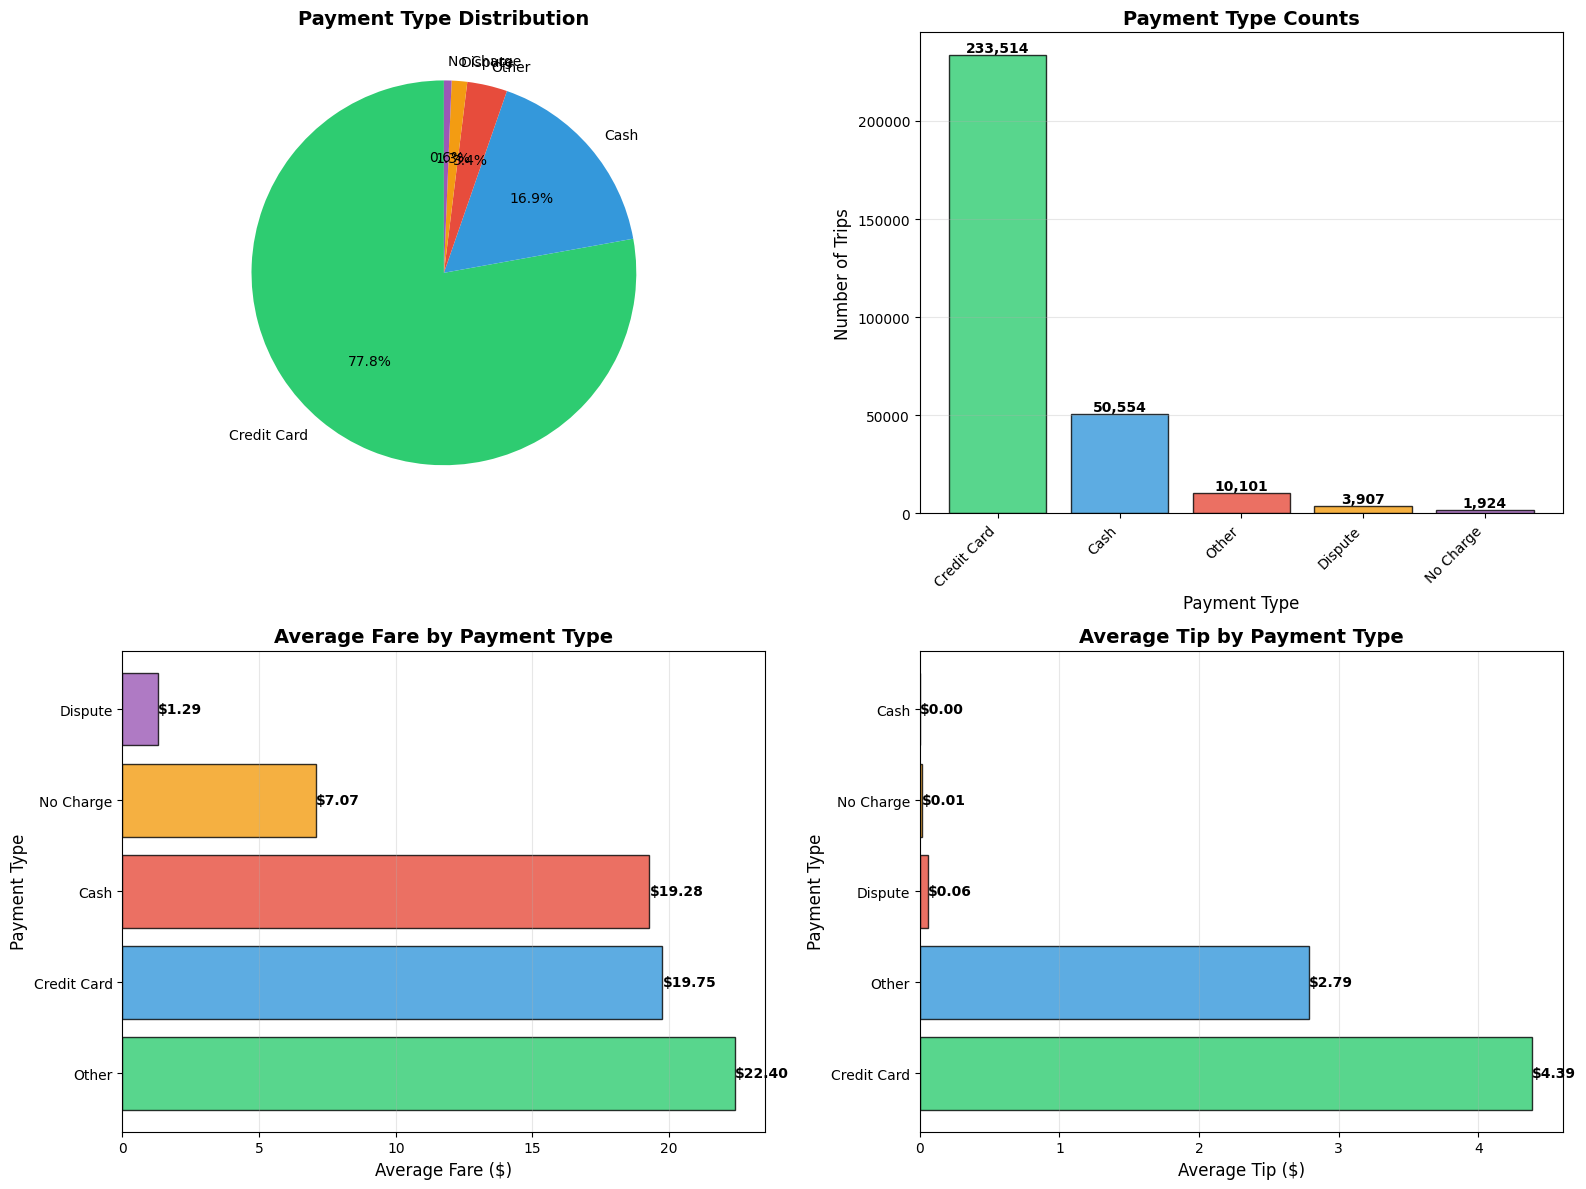


KEY INSIGHTS

1. Payment Method Preference:
   - Credit Card is the most popular (77.8% of trips)
   - Credit Card: 233,514 trips (77.8%)
   - Cash: 50,554 trips (16.9%)

2. Tipping Patterns:
   - Credit Card avg tip: $4.39
   - Cash avg tip: $0.00
   - Credit card users tip more than cash users

✓ Payment type analysis complete!


In [66]:
# Analyse the distribution of different payment types (payment_type).


print("="*50)
print("PAYMENT TYPE DISTRIBUTION ANALYSIS")
print("="*50)

# Check if payment_type column exists
if 'payment_type' not in df.columns:
    print("\n⚠ Warning: 'payment_type' column not found")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print("\nAnalyzing payment_type column...")

    # Payment type mapping
    payment_mapping = {
        1: 'Credit Card',
        2: 'Cash',
        3: 'No Charge',
        4: 'Dispute',
        5: 'Unknown',
        6: 'Voided Trip'
    }

    # Create a readable payment type column
    df['payment_type_name'] = df['payment_type'].map(payment_mapping)
    df['payment_type_name'] = df['payment_type_name'].fillna('Other')

    # Calculate payment type distribution
    payment_counts = df['payment_type'].value_counts().sort_index()
    payment_counts_named = df['payment_type_name'].value_counts()

    print("\n--- Payment Type Distribution (by code) ---")
    print(payment_counts)

    print("\n--- Payment Type Distribution (by name) ---")
    print(payment_counts_named)

    # Calculate percentages
    total_trips = len(df)
    payment_percentages = (payment_counts_named / total_trips * 100).round(2)

    # Create summary table
    payment_summary = pd.DataFrame({
        'Payment Type': payment_counts_named.index,
        'Count': payment_counts_named.values,
        'Percentage': payment_percentages.values
    })

    print("\n--- Payment Type Summary ---")
    print(payment_summary.to_string(index=False))

    print(f"\nTotal trips: {total_trips:,}")

    # Identify most common payment method
    most_common = payment_counts_named.idxmax()
    most_common_pct = payment_percentages[most_common]
    print(f"\nMost common payment type: {most_common} ({most_common_pct:.2f}%)")

    # Additional analysis by payment type
    print("\n" + "="*50)
    print("DETAILED ANALYSIS BY PAYMENT TYPE")
    print("="*50)

    payment_analysis = df.groupby('payment_type_name').agg({
        'fare_amount': ['mean', 'median'],
        'tip_amount': ['mean', 'median'],
        'total_amount': ['mean', 'median'],
        'trip_distance': ['mean', 'median']
    })

    payment_analysis.columns = ['Avg Fare', 'Median Fare', 'Avg Tip', 'Median Tip',
                                 'Avg Total', 'Median Total', 'Avg Distance', 'Median Distance']

    print("\n" + payment_analysis.to_string())

    # Tip analysis by payment type
    print("\n--- Tip Analysis by Payment Type ---")
    tip_by_payment = df.groupby('payment_type_name')['tip_amount'].agg(['mean', 'sum', 'count'])
    tip_by_payment.columns = ['Average Tip', 'Total Tips', 'Trip Count']
    tip_by_payment['Avg Tip %'] = (tip_by_payment['Average Tip'] /
                                    df.groupby('payment_type_name')['fare_amount'].mean() * 100).round(2)
    print(tip_by_payment.to_string())

    # Visualizations
    import matplotlib.pyplot as plt

    print("\n--- Generating Visualizations ---")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Pie chart - Payment type distribution
    colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6', '#95a5a6']
    axes[0, 0].pie(payment_counts_named.values, labels=payment_counts_named.index,
                   autopct='%1.1f%%', startangle=90, colors=colors[:len(payment_counts_named)])
    axes[0, 0].set_title('Payment Type Distribution', fontsize=14, fontweight='bold')

    # 2. Bar chart - Payment type counts
    bars = axes[0, 1].bar(range(len(payment_counts_named)), payment_counts_named.values,
                          color=colors[:len(payment_counts_named)], alpha=0.8, edgecolor='black')
    axes[0, 1].set_title('Payment Type Counts', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Payment Type', fontsize=12)
    axes[0, 1].set_ylabel('Number of Trips', fontsize=12)
    axes[0, 1].set_xticks(range(len(payment_counts_named)))
    axes[0, 1].set_xticklabels(payment_counts_named.index, rotation=45, ha='right')
    axes[0, 1].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, payment_counts_named.values)):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{val:,}', ha='center', va='bottom', fontweight='bold')

    # 3. Average fare by payment type
    avg_fare = df.groupby('payment_type_name')['fare_amount'].mean().sort_values(ascending=False)
    axes[1, 0].barh(range(len(avg_fare)), avg_fare.values,
                    color=colors[:len(avg_fare)], alpha=0.8, edgecolor='black')
    axes[1, 0].set_title('Average Fare by Payment Type', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Average Fare ($)', fontsize=12)
    axes[1, 0].set_ylabel('Payment Type', fontsize=12)
    axes[1, 0].set_yticks(range(len(avg_fare)))
    axes[1, 0].set_yticklabels(avg_fare.index)
    axes[1, 0].grid(axis='x', alpha=0.3)

    # Add value labels
    for i, v in enumerate(avg_fare.values):
        axes[1, 0].text(v, i, f'${v:.2f}', va='center', ha='left', fontweight='bold')

    # 4. Average tip by payment type
    avg_tip = df.groupby('payment_type_name')['tip_amount'].mean().sort_values(ascending=False)
    axes[1, 1].barh(range(len(avg_tip)), avg_tip.values,
                    color=colors[:len(avg_tip)], alpha=0.8, edgecolor='black')
    axes[1, 1].set_title('Average Tip by Payment Type', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Average Tip ($)', fontsize=12)
    axes[1, 1].set_ylabel('Payment Type', fontsize=12)
    axes[1, 1].set_yticks(range(len(avg_tip)))
    axes[1, 1].set_yticklabels(avg_tip.index)
    axes[1, 1].grid(axis='x', alpha=0.3)

    # Add value labels
    for i, v in enumerate(avg_tip.values):
        axes[1, 1].text(v, i, f'${v:.2f}', va='center', ha='left', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Key insights
    print("\n" + "="*50)
    print("KEY INSIGHTS")
    print("="*50)

    print(f"\n1. Payment Method Preference:")
    print(f"   - {most_common} is the most popular ({most_common_pct:.1f}% of trips)")

    credit_card_trips = payment_counts_named.get('Credit Card', 0)
    cash_trips = payment_counts_named.get('Cash', 0)
    print(f"   - Credit Card: {credit_card_trips:,} trips ({credit_card_trips/total_trips*100:.1f}%)")
    print(f"   - Cash: {cash_trips:,} trips ({cash_trips/total_trips*100:.1f}%)")

    print(f"\n2. Tipping Patterns:")
    if 'Credit Card' in avg_tip.index and 'Cash' in avg_tip.index:
        print(f"   - Credit Card avg tip: ${avg_tip['Credit Card']:.2f}")
        print(f"   - Cash avg tip: ${avg_tip['Cash']:.2f}")
        print(f"   - Credit card users tip {'more' if avg_tip['Credit Card'] > avg_tip['Cash'] else 'less'} than cash users")

    print("\n✓ Payment type analysis complete!")
    print("="*50)




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [12]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [15]:
# Option 1: Upload directly to Colab (temporary)
from google.colab import files
import zipfile
import os

print("Please upload the taxi_zones folder (as a zip file)")
uploaded = files.upload()

# Extract if it's a zip file
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        print(f"Extracting {filename}...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('taxi_zones')
        print("✓ Extracted successfully")

# Find the shapefile
for root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('.shp'):
            shp_path = os.path.join(root, file)
            print(f"Found shapefile at: {shp_path}")

Please upload the taxi_zones folder (as a zip file)


Saving EDA_Assg_NYC_Taxi_Starter.ipynb to EDA_Assg_NYC_Taxi_Starter.ipynb


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [17]:
# Import geopandas
import geopandas as gpd

print("="*50)
print("LOADING TAXI ZONES SHAPEFILE")
print("="*50)

# Install geopandas if not already installed
try:
    import geopandas as gpd
    print("✓ geopandas is already installed")
except ImportError:
    print("Installing geopandas...")
    !pip install geopandas
    import geopandas as gpd
    print("✓ geopandas installed successfully")

# Read the shapefile
# You need to provide the correct path to your taxi_zones.shp file
# Try to find the file first

import os

# Search for the shapefile
print("\nSearching for taxi_zones.shp...")

search_locations = [
    '/content/drive/MyDrive/',
    '/content/',
    '.'
]

zones = None
zones_path = None

for location in search_locations:
    if os.path.exists(location):
        for root, dirs, files in os.walk(location):
            if 'taxi_zones.shp' in files:
                zones_path = os.path.join(root, 'taxi_zones.shp')
                print(f"Found: {zones_path}")
                try:
                    zones = gpd.read_file(zones_path)
                    print(f"✓ Successfully loaded {len(zones)} zones")
                    break
                except Exception as e:
                    print(f"Error loading: {e}")
        if zones is not None:
            break

if zones is None:
    print("\n⚠ Could not find or load taxi_zones.shp")
    print("\nPlease provide the correct path manually:")
    print("zones = gpd.read_file('YOUR_PATH_HERE/taxi_zones.shp')")
else:
    print(f"\n✓ Zones loaded successfully!")
    print(f"Shape: {zones.shape}")

LOADING TAXI ZONES SHAPEFILE
✓ geopandas is already installed

Searching for taxi_zones.shp...

⚠ Could not find or load taxi_zones.shp

Please provide the correct path manually:
zones = gpd.read_file('YOUR_PATH_HERE/taxi_zones.shp')


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [22]:
# Upload the taxi_zones folder as a zip file
from google.colab import files
import zipfile

print("Please upload the taxi_zones.zip file")
uploaded = files.upload()

# Extract the zip file
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        print(f"Extracting {filename}...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('.')
        print("✓ Extracted")

# Find the shapefile
import os
for root, dirs, files in os.walk('.'):
    for file in files:
        if file == 'taxi_zones.shp':
            shp_path = os.path.join(root, file)
            print(f"\nFound shapefile at: {shp_path}")

Please upload the taxi_zones.zip file


Saving EDA_Assg_NYC_Taxi_Starter.ipynb to EDA_Assg_NYC_Taxi_Starter (1).ipynb


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

GROUPING DATA BY LOCATION
Using original dataframe (df)

Using column: PULocationID

--- Calculating Trip Counts by Location ---

✓ Grouped data created
Total unique locations: 244
Total trips: 300,000

--- Top 20 Pickup Locations ---
 PULocationID  trip_count
          132       15471
          237       13967
          161       13830
          236       12475
          162       10477
          138       10133
          186       10075
          230       10004
          142        9767
          170        8819
          163        8680
          239        8174
           48        7965
          234        7957
           68        7742
          141        7142
           79        7070
          164        6954
          249        6757
          107        6362

--- Trip Count Statistics ---
Mean trips per location: 1229.51
Median trips per location: 23.50
Max trips (busiest location): 15,471
Min trips (quietest location): 1

--- Generating Visualizations ---


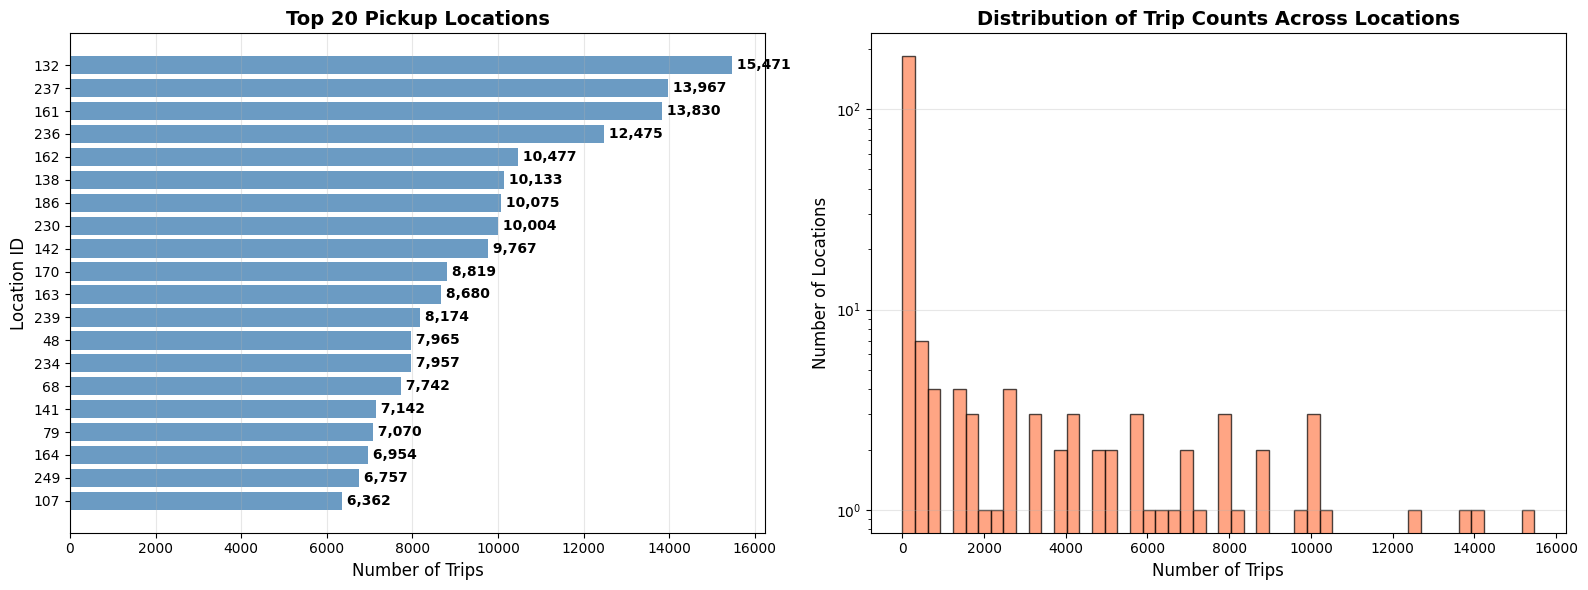


✓ Grouping and analysis complete!

Dataframe 'trips_by_location' created with 244 locations



In [23]:
# Group data by location and calculate the number of trips


print("="*50)
print("GROUPING DATA BY LOCATION")
print("="*50)

# Check if we have the merged data
if 'df_merged' in locals():
    print("Using merged dataframe (df_merged)")
    data_to_use = df_merged
elif 'PULocationID' in df.columns:
    print("Using original dataframe (df)")
    data_to_use = df
else:
    print("⚠ Error: No suitable dataframe found")
    data_to_use = None

if data_to_use is not None:
    # Find the pickup location column
    pickup_location_col = None
    for col in data_to_use.columns:
        if 'pulocation' in col.lower() or (col.lower() == 'locationid' and 'pu' in str(data_to_use.columns)):
            pickup_location_col = col
            break

    if pickup_location_col is None:
        # Try to find any location column
        location_cols = [col for col in data_to_use.columns if 'location' in col.lower() and 'id' in col.lower()]
        if location_cols:
            pickup_location_col = location_cols[0]

    print(f"\nUsing column: {pickup_location_col}")

    if pickup_location_col:
        # Group by location and count trips
        print("\n--- Calculating Trip Counts by Location ---")

        trips_by_location = data_to_use.groupby(pickup_location_col).size().reset_index(name='trip_count')
        trips_by_location = trips_by_location.sort_values('trip_count', ascending=False)

        print(f"\n✓ Grouped data created")
        print(f"Total unique locations: {len(trips_by_location)}")
        print(f"Total trips: {trips_by_location['trip_count'].sum():,}")

        # Display top 20 locations
        print("\n--- Top 20 Pickup Locations ---")
        print(trips_by_location.head(20).to_string(index=False))

        # Statistics
        print("\n--- Trip Count Statistics ---")
        print(f"Mean trips per location: {trips_by_location['trip_count'].mean():.2f}")
        print(f"Median trips per location: {trips_by_location['trip_count'].median():.2f}")
        print(f"Max trips (busiest location): {trips_by_location['trip_count'].max():,}")
        print(f"Min trips (quietest location): {trips_by_location['trip_count'].min():,}")

        # If we have zone information, show it with zone names
        if 'zone' in data_to_use.columns:
            print("\n--- Top 20 Pickup Zones (with names) ---")
            trips_by_zone = data_to_use.groupby(['PULocationID', 'zone']).size().reset_index(name='trip_count')
            trips_by_zone = trips_by_zone.sort_values('trip_count', ascending=False)
            print(trips_by_zone.head(20).to_string(index=False))

        if 'borough' in data_to_use.columns:
            print("\n--- Trips by Borough ---")
            trips_by_borough = data_to_use.groupby('borough').size().sort_values(ascending=False)
            print(trips_by_borough)

        # Visualization
        import matplotlib.pyplot as plt

        print("\n--- Generating Visualizations ---")

        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        # Bar chart - Top 20 locations
        top_20 = trips_by_location.head(20)
        axes[0].barh(range(len(top_20)), top_20['trip_count'].values, color='steelblue', alpha=0.8)
        axes[0].set_yticks(range(len(top_20)))
        axes[0].set_yticklabels(top_20[pickup_location_col].values)
        axes[0].set_xlabel('Number of Trips', fontsize=12)
        axes[0].set_ylabel('Location ID', fontsize=12)
        axes[0].set_title('Top 20 Pickup Locations', fontsize=14, fontweight='bold')
        axes[0].invert_yaxis()
        axes[0].grid(axis='x', alpha=0.3)

        # Add value labels
        for i, v in enumerate(top_20['trip_count'].values):
            axes[0].text(v, i, f' {v:,}', va='center', fontweight='bold')

        # Histogram - Distribution of trip counts
        axes[1].hist(trips_by_location['trip_count'], bins=50, color='coral', alpha=0.7, edgecolor='black')
        axes[1].set_xlabel('Number of Trips', fontsize=12)
        axes[1].set_ylabel('Number of Locations', fontsize=12)
        axes[1].set_title('Distribution of Trip Counts Across Locations', fontsize=14, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        axes[1].set_yscale('log')  # Log scale for better visualization

        plt.tight_layout()
        plt.show()

        print("\n✓ Grouping and analysis complete!")
        print(f"\nDataframe 'trips_by_location' created with {len(trips_by_location)} locations")

    else:
        print("\n✗ Could not find pickup location column")
        print(f"Available columns: {data_to_use.columns.tolist()}")
else:
    print("\n✗ No data available for grouping")

print("\n" + "="*50)



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [25]:
# Step 1: Load the zones shapefile
import geopandas as gpd
import os

print("="*50)
print("STEP 1: LOADING ZONES SHAPEFILE")
print("="*50)

# If zones is not loaded, try to load it
if 'zones' not in locals() or zones is None:
    print("Zones not loaded. Attempting to load...")

    # Try common paths
    possible_paths = [
        '/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/taxi_zones/taxi_zones.shp',
        '/content/drive/MyDrive/taxi_zones/taxi_zones.shp',
        '/content/taxi_zones/taxi_zones.shp',
        'taxi_zones/taxi_zones.shp'
    ]

    zones = None
    for path in possible_paths:
        if os.path.exists(path):
            try:
                zones = gpd.read_file(path)
                print(f"✓ Loaded from: {path}")
                break
            except Exception as e:
                print(f"✗ Failed: {e}")

    if zones is None:
        # Search for it
        print("\nSearching for taxi_zones.shp...")
        for root, dirs, files in os.walk('/content/drive/MyDrive/'):
            if 'taxi_zones.shp' in files:
                shp_path = os.path.join(root, 'taxi_zones.shp')
                print(f"Found at: {shp_path}")
                try:
                    zones = gpd.read_file(shp_path)
                    print(f"✓ Loaded successfully!")
                    break
                except Exception as e:
                    print(f"✗ Error: {e}")

if zones is not None:
    print(f"\n✓ Zones loaded: {len(zones)} zones")
    print(f"Columns: {zones.columns.tolist()}")
else:
    print("\n✗ Could not load zones shapefile")
    print("\nPlease provide the correct path manually:")
    print("zones = gpd.read_file('YOUR_PATH/taxi_zones.shp')")

STEP 1: LOADING ZONES SHAPEFILE
Zones not loaded. Attempting to load...

Searching for taxi_zones.shp...

✗ Could not load zones shapefile

Please provide the correct path manually:
zones = gpd.read_file('YOUR_PATH/taxi_zones.shp')


In [27]:
# Merge trip counts back to the zones GeoDataFrame


print("="*50)
print("MERGING TRIP COUNTS TO ZONES GEODATAFRAME")
print("="*50)

# Check if required dataframes exist
if 'zones' not in locals() or zones is None:
    print("✗ Error: 'zones' GeoDataFrame not found or not loaded correctly.")
    print("Please load the zones shapefile first using gpd.read_file('YOUR_PATH/taxi_zones.shp')")
elif 'trips_by_location' not in locals():
    print("✗ Error: 'trips_by_location' not found")
    print("Creating trips_by_location now...")

    # Create trips_by_location if it doesn't exist
    if 'df_merged' in locals():
        data_to_use = df_merged
    elif 'df' in locals():
        data_to_use = df
    else:
        print("✗ Error: No suitable dataframe (df or df_merged) found to create trips_by_location")
        data_to_use = None

    if data_to_use is not None:
        # Find pickup location column
        pickup_location_col = None
        for col in data_to_use.columns:
            if 'pulocation' in col.lower():
                pickup_location_col = col
                break

        if pickup_location_col:
            trips_by_location = data_to_use.groupby(pickup_location_col).size().reset_index(name='trip_count')
            print(f"✓ Created trips_by_location with {len(trips_by_location)} locations")
        else:
            print("✗ Could not find pickup location column in the dataframe")
            trips_by_location = None
else:
    print("✓ Both 'zones' and 'trips_by_location' found")

# Proceed with merge if both dataframes exist and zones is not None
if 'zones' in locals() and zones is not None and 'trips_by_location' in locals() and trips_by_location is not None:

    # Identify the location ID columns
    print("\n--- Identifying Columns ---")

    # Find LocationID in zones
    zone_location_col = None
    for col in zones.columns:
        if 'location' in col.lower() and 'id' in col.lower():
            zone_location_col = col
            break

    # Find LocationID in trips_by_location
    # Assuming the first column of trips_by_location is the location ID
    if len(trips_by_location.columns) > 0:
      trip_location_col = trips_by_location.columns[0]
    else:
      print("✗ Error: trips_by_location dataframe is empty or has no columns.")
      trip_location_col = None


    if zone_location_col and trip_location_col:
        # Check data before merge
        print(f"\n--- Before Merge ---")
        print(f"Zones shape: {zones.shape}")
        print(f"Unique zones: {zones[zone_location_col].nunique()}")
        print(f"Trips by location shape: {trips_by_location.shape}")
        print(f"Unique locations with trips: {len(trips_by_location)}")

        # Perform the merge
        print("\n--- Performing Merge ---")
        zones_with_trips = zones.merge(trips_by_location,
                                       left_on=zone_location_col,
                                       right_on=trip_location_col,
                                       how='left')

        # Fill NaN trip counts with 0 (zones with no pickups)
        zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0).astype(int)

        print(f"\n✓ Merge complete!")
        print(f"Zones with trips shape: {zones_with_trips.shape}")
        print(f"Total zones: {len(zones_with_trips)}")
        print(f"Zones with pickups: {(zones_with_trips['trip_count'] > 0).sum()}")
        print(f"Zones with no pickups: {(zones_with_trips['trip_count'] == 0).sum()}")

        # Statistics
        print("\n--- Trip Count Statistics ---")
        print(f"Total trips: {zones_with_trips['trip_count'].sum():,}")
        print(f"Mean trips per zone: {zones_with_trips['trip_count'].mean():.2f}")
        print(f"Median trips per zone: {zones_with_trips['trip_count'].median():.2f}")
        print(f"Max trips in a zone: {zones_with_trips['trip_count'].max():,}")

        # Top zones
        print("\n--- Top 10 Zones by Trip Count ---")
        top_zones = zones_with_trips.nlargest(10, 'trip_count')
        display_cols = [zone_location_col, 'trip_count']
        if 'zone' in zones_with_trips.columns:
            display_cols.insert(1, 'zone')
        if 'borough' in zones_with_trips.columns:
            display_cols.insert(2, 'borough')

        print(top_zones[display_cols].to_string(index=False))

        # Sample of merged data
        print("\n--- Sample of Merged Data ---")
        print(zones_with_trips[display_cols].head(10).to_string(index=False))

        print("\n" + "="*50)
        print("✓ MERGE SUCCESSFUL")
        print("="*50)
        print(f"New GeoDataFrame 'zones_with_trips' created")
        print(f"Use this for creating the choropleth map")

        # Quick preview of distribution
        import matplotlib.pyplot as plt

        print("\n--- Quick Distribution Plot ---")
        fig, ax = plt.subplots(figsize=(10, 6))

        zones_with_trips['trip_count'].hist(bins=50, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
        ax.set_xlabel('Number of Trips', fontsize=12)
        ax.set_ylabel('Number of Zones', fontsize=12)
        ax.set_title('Distribution of Trips Across Zones', fontsize=14, fontweight='bold')
        ax.grid(axis='y', alpha=0.3)

        plt.tight_layout()
        plt.show()

    else:
        print("\n✗ Cannot find LocationID column in zones or trips_by_location")
        if 'zones' in locals() and zones is not None:
             print(f"Zones columns: {zones.columns.tolist()}")
        if 'trips_by_location' in locals() and trips_by_location is not None:
             print(f"Trips by location columns: {trips_by_location.columns.tolist()}")

else:
    print("\n✗ Cannot proceed with merge - missing required data or zones not loaded correctly.")

MERGING TRIP COUNTS TO ZONES GEODATAFRAME
✗ Error: 'zones' GeoDataFrame not found or not loaded correctly.
Please load the zones shapefile first using gpd.read_file('YOUR_PATH/taxi_zones.shp')

✗ Cannot proceed with merge - missing required data or zones not loaded correctly.


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [28]:
# Define figure and axis
import matplotlib.pyplot as plt

print("="*50)
print("GENERATING CHOROPLETH MAP OF ZONE TRIP COUNTS")
print("="*50)

# Check if the necessary GeoDataFrame exists
if 'zones_with_trips' not in locals() or zones_with_trips is None:
    print("\n✗ Error: 'zones_with_trips' GeoDataFrame not found.")
    print("Please run the previous steps to merge trip counts with zone geometries.")
else:
    print("\n✓ 'zones_with_trips' GeoDataFrame found.")
    print(f"Shape: {zones_with_trips.shape}")
    print(f"Columns: {zones_with_trips.columns.tolist()}")


    # Define figure and axis
    print("\n--- Defining Figure and Axis ---")
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    print("✓ Figure and axis created")

    # Plot the map and display it
    print("\n--- Plotting Choropleth Map ---")

    # Check if 'trip_count' column exists in the GeoDataFrame
    if 'trip_count' not in zones_with_trips.columns:
         print("\n✗ Error: 'trip_count' column not found in zones_with_trips.")
         print("Please ensure the merge step was successful and created the 'trip_count' column.")
    else:
        # Plot the GeoDataFrame
        zones_with_trips.plot(column='trip_count',
                              ax=ax,
                              legend=True,
                              legend_kwds={'label': "Number of Trips",
                                           'orientation': "horizontal"},
                              cmap='viridis', # You can change the colormap
                              missing_kwds={"color": "lightgrey",
                                            "edgecolor": "red",
                                            "hatch": "///",
                                            "label": "Missing values"})

        ax.set_title('Taxi Pickups by Zone (2023 Sample)', fontsize=16, fontweight='bold')
        ax.set_axis_off() # Turn off axes
        plt.tight_layout()

        print("✓ Map plotted")
        plt.show()
        print("\n✓ Choropleth map displayed!")

print("\n" + "="*50)

GENERATING CHOROPLETH MAP OF ZONE TRIP COUNTS

✗ Error: 'zones_with_trips' GeoDataFrame not found.
Please run the previous steps to merge trip counts with zone geometries.



In [29]:
# Display the trips_by_location DataFrame sorted by trip_count

print("="*50)
print("TRIP COUNTS BY LOCATION (SORTED)")
print("="*50)

if 'trips_by_location' in locals():
    # Sort the DataFrame by 'trip_count' in descending order
    sorted_trips_by_location = trips_by_location.sort_values('trip_count', ascending=False).reset_index(drop=True)

    print(f"\nTotal unique locations: {len(sorted_trips_by_location)}")
    print(f"Total trips counted: {sorted_trips_by_location['trip_count'].sum():,}")

    # Display the sorted DataFrame
    print("\n--- Trip Counts per Location (Sorted by Count) ---")
    print(sorted_trips_by_location.to_string(index=False))

else:
    print("\n✗ Error: 'trips_by_location' DataFrame not found.")
    print("Please run the step to group data by location first.")

print("\n" + "="*50)

TRIP COUNTS BY LOCATION (SORTED)

Total unique locations: 244
Total trips counted: 300,000

--- Trip Counts per Location (Sorted by Count) ---
 PULocationID  trip_count
          132       15471
          237       13967
          161       13830
          236       12475
          162       10477
          138       10133
          186       10075
          230       10004
          142        9767
          170        8819
          163        8680
          239        8174
           48        7965
          234        7957
           68        7742
          141        7142
           79        7070
          164        6954
          249        6757
          107        6362
          140        5977
          238        5832
          263        5752
          229        5679
          246        5091
           43        5080
           90        4872
          100        4843
          262        4126
          113        4116
          114        4048
          231        3955

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [67]:
# Define time periods and categorize trips

print("="*50)
print("DEFINING TIME PERIODS FOR SPEED ANALYSIS")
print("="*50)

# Check if pickup datetime column exists
pickup_col = None
for col in df.columns:
    if 'pickup' in col.lower() and 'datetime' in col.lower():
        pickup_col = col
        break

if pickup_col is None:
    print("\n⚠ Warning: No pickup datetime column found. Cannot define time periods.")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print(f"\nUsing column: {pickup_col}")

    # Ensure column is datetime type
    if not pd.api.types.is_datetime64_any_dtype(df[pickup_col]):
        print(f"Converting {pickup_col} to datetime...")
        df[pickup_col] = pd.to_datetime(df[pickup_col], errors='coerce')

    # Filter out rows where datetime conversion failed
    df_analysis = df.dropna(subset=[pickup_col]).copy()


    # Define time periods based on hour
    def get_time_period(hour):
        if 5 <= hour < 10:
            return 'Morning Rush (5AM-10AM)'
        elif 10 <= hour < 16:
            return 'Daytime (10AM-4PM)'
        elif 16 <= hour < 20:
            return 'Evening Rush (4PM-8PM)'
        else:
            return 'Night (8PM-5AM)'

    df_analysis['pickup_time_period'] = df_analysis[pickup_col].dt.hour.apply(get_time_period)

    print("✓ 'pickup_time_period' column created")

    print("\n--- Distribution of Trips by Time Period ---")
    print(df_analysis['pickup_time_period'].value_counts().to_string())

    print("\n--- Sample of Data with Time Period ---")
    display_cols = [pickup_col, 'pickup_time_period', 'PULocationID', 'DOLocationID', 'trip_distance', 'trip_duration', 'trip_speed_mph']
    display_cols = [col for col in display_cols if col in df_analysis.columns]
    print(df_analysis[display_cols].head())

    print("\n" + "="*50)
    print("TIME PERIOD DEFINITION COMPLETE")
    print("="*50)

DEFINING TIME PERIODS FOR SPEED ANALYSIS

Using column: tpep_pickup_datetime
✓ 'pickup_time_period' column created

--- Distribution of Trips by Time Period ---
pickup_time_period
Daytime (10AM-4PM)         99270
Night (8PM-5AM)            83639
Evening Rush (4PM-8PM)     79207
Morning Rush (5AM-10AM)    37884

--- Sample of Data with Time Period ---
  tpep_pickup_datetime      pickup_time_period  PULocationID  DOLocationID  \
0  2023-08-01 18:54:34  Evening Rush (4PM-8PM)           141           263   
1  2023-07-25 13:50:35      Daytime (10AM-4PM)           237           238   
2  2023-11-01 00:13:53         Night (8PM-5AM)           148           141   
3  2023-09-09 17:23:19  Evening Rush (4PM-8PM)           164            36   
4  2023-10-14 19:48:18  Evening Rush (4PM-8PM)           246           158   

   trip_distance  trip_duration  trip_speed_mph  
0           1.13          303.0       13.425743  
1           1.37          349.0       14.131805  
2           3.90          89

In [30]:
# Calculate trip duration
print("="*50)
print("CALCULATING TRIP DURATION")
print("="*50)

# Ensure datetime columns are in the correct format
datetime_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
for col in datetime_cols:
    if col in df.columns and not pd.api.types.is_datetime64_any_dtype(df[col]):
        print(f"Converting '{col}' to datetime...")
        df[col] = pd.to_datetime(df[col], errors='coerce') # Coerce errors to NaT

# Calculate trip duration in seconds
# Handle potential NaT values if coercion occurred
if all(col in df.columns for col in datetime_cols):
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
    print("✓ 'trip_duration' calculated in seconds")

    # Handle potential negative durations (errors)
    negative_durations = (df['trip_duration'] < 0).sum()
    if negative_durations > 0:
        print(f"\n⚠ Found {negative_durations:,} records with negative trip duration. Setting them to 0.")
        df['trip_duration'] = df['trip_duration'].apply(lambda x: max(0, x)) # Replace negative with 0

    # Handle potential NaT durations (from NaT in pickup/dropoff)
    nat_durations = df['trip_duration'].isnull().sum()
    if nat_durations > 0:
        print(f"\n⚠ Found {nat_durations:,} records with NaN trip duration. Setting them to 0.")
        df['trip_duration'] = df['trip_duration'].fillna(0) # Fill NaN durations with 0


    print("\n--- Trip Duration Statistics (in seconds) ---")
    print(f"Mean: {df['trip_duration'].mean():.2f}")
    print(f"Median: {df['trip_duration'].median():.2f}")
    print(f"Min: {df['trip_duration'].min():.2f}")
    print(f"Max: {df['trip_duration'].max():.2f}")

    print("\n--- Sample of Data with Trip Duration ---")
    print(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration']].head())

else:
    print("\n✗ Cannot calculate trip duration: Missing required datetime columns ('tpep_pickup_datetime' or 'tpep_dropoff_datetime')")


print("\n" + "="*50)
print("TRIP DURATION CALCULATION COMPLETE")
print("="*50)

CALCULATING TRIP DURATION
✓ 'trip_duration' calculated in seconds

⚠ Found 18 records with negative trip duration. Setting them to 0.

--- Trip Duration Statistics (in seconds) ---
Mean: 1043.47
Median: 757.00
Min: 0.00
Max: 174417.00

--- Sample of Data with Trip Duration ---
  tpep_pickup_datetime tpep_dropoff_datetime  trip_duration
0  2023-08-01 18:54:34   2023-08-01 18:59:37          303.0
1  2023-07-25 13:50:35   2023-07-25 13:56:24          349.0
2  2023-11-01 00:13:53   2023-11-01 00:28:48          895.0
3  2023-09-09 17:23:19   2023-09-09 17:50:54         1655.0
4  2023-10-14 19:48:18   2023-10-14 19:59:56          698.0

TRIP DURATION CALCULATION COMPLETE


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

HOURLY TRENDS IN TAXI PICKUPS

Using column: tpep_pickup_datetime

--- Hourly Pickup Counts ---
pickup_hour
0      8532
1      5688
2      3799
3      2580
4      1686
5      1724
6      4131
7      8191
8     11160
9     12678
10    13976
11    15150
12    16395
13    16946
14    18187
15    18616
16    18788
17    20271
18    21110
19    19038
20    16661
21    16706
22    15602
23    12385
Name: count, dtype: int64

--- Hourly Pickup Summary ---
 Hour  Pickup Count  Percentage
    0          8532        2.84
    1          5688        1.90
    2          3799        1.27
    3          2580        0.86
    4          1686        0.56
    5          1724        0.57
    6          4131        1.38
    7          8191        2.73
    8         11160        3.72
    9         12678        4.23
   10         13976        4.66
   11         15150        5.05
   12         16395        5.46
   13         16946        5.65
   14         18187        6.06
   15         18616        6.21
   

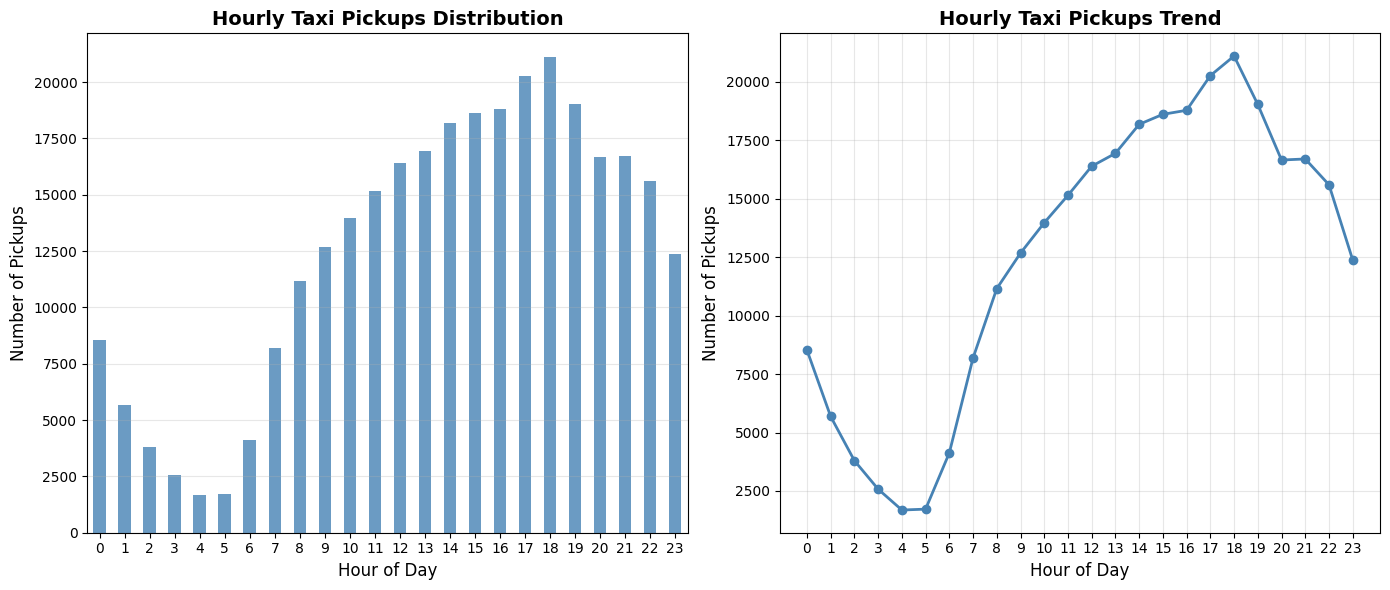


✓ Hourly trends analysis complete!



In [33]:
# Visualise the number of trips per hour and find the busiest hour
# Find and show the hourly trends in taxi pickups
# Find and show the hourly trends in taxi pickups

print("="*50)
print("HOURLY TRENDS IN TAXI PICKUPS")
print("="*50)

# Check if pickup datetime column exists
pickup_col = None
for col in df.columns:
    if 'pickup' in col.lower() and 'datetime' in col.lower():
        pickup_col = col
        break

if pickup_col is None:
    print("\n⚠ Warning: No pickup datetime column found")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print(f"\nUsing column: {pickup_col}")

    # Ensure column is datetime type
    if not pd.api.types.is_datetime64_any_dtype(df[pickup_col]):
        print(f"Converting {pickup_col} to datetime...")
        df[pickup_col] = pd.to_datetime(df[pickup_col])

    # Extract hour from pickup datetime
    df['pickup_hour'] = df[pickup_col].dt.hour

    # Calculate hourly pickup counts
    hourly_pickups = df['pickup_hour'].value_counts().sort_index()

    print("\n--- Hourly Pickup Counts ---")
    print(hourly_pickups)

    # Calculate percentages
    hourly_percentages = (hourly_pickups / len(df) * 100).round(2)

    # Create summary table
    hourly_summary = pd.DataFrame({
        'Hour': hourly_pickups.index,
        'Pickup Count': hourly_pickups.values,
        'Percentage': hourly_percentages.values
    })

    print("\n--- Hourly Pickup Summary ---")
    print(hourly_summary.to_string(index=False))

    # Identify peak hours
    print("\n--- Peak Hours Analysis ---")
    top_3_hours = hourly_pickups.nlargest(3)
    print(f"Top 3 busiest hours:")
    for hour, count in top_3_hours.items():
        pct = (count / len(df) * 100)
        print(f"  {hour}:00 - {count:,} pickups ({pct:.2f}%)")

    # Identify off-peak hours
    bottom_3_hours = hourly_pickups.nsmallest(3)
    print(f"\nTop 3 quietest hours:")
    for hour, count in bottom_3_hours.items():
        pct = (count / len(df) * 100)
        print(f"  {hour}:00 - {count:,} pickups ({pct:.2f}%)")

    # Time period analysis
    print("\n--- Time Period Analysis ---")

    # Define time periods
    morning_rush = df[df['pickup_hour'].isin([7, 8, 9])].shape[0]
    daytime = df[df['pickup_hour'].isin([10, 11, 12, 13, 14, 15, 16])].shape[0]
    evening_rush = df[df['pickup_hour'].isin([17, 18, 19, 20])].shape[0]
    night = df[df['pickup_hour'].isin([21, 22, 23, 0, 1, 2, 3, 4, 5, 6])].shape[0]

    print(f"Morning Rush (7-9 AM): {morning_rush:,} ({morning_rush/len(df)*100:.2f}%)")
    print(f"Daytime (10 AM-4 PM): {daytime:,} ({daytime/len(df)*100:.2f}%)")
    print(f"Evening Rush (5-8 PM): {evening_rush:,} ({evening_rush/len(df)*100:.2f}%)")
    print(f"Night (9 PM-6 AM): {night:,} ({night/len(df)*100:.2f}%)")

    # Visualization
    import matplotlib.pyplot as plt

    print("\n--- Generating Visualization ---")

    plt.figure(figsize=(14, 6))

    # Bar plot
    plt.subplot(1, 2, 1)
    hourly_pickups.plot(kind='bar', color='steelblue', alpha=0.8)
    plt.title('Hourly Taxi Pickups Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Number of Pickups', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)

    # Line plot
    plt.subplot(1, 2, 2)
    hourly_pickups.plot(kind='line', marker='o', color='steelblue', linewidth=2, markersize=6)
    plt.title('Hourly Taxi Pickups Trend', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Number of Pickups', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24))

    plt.tight_layout()
    plt.show()

    print("\n✓ Hourly trends analysis complete!")

print("\n" + "="*50)



In [34]:
# Calculate trip speed
print("="*50)
print("CALCULATING TRIP SPEED")
print("="*50)

# Ensure required columns exist
if 'trip_distance' not in df.columns or 'trip_duration' not in df.columns:
    print("\n✗ Error: Required columns ('trip_distance' or 'trip_duration') not found.")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print("\nUsing columns: trip_distance and trip_duration")

    # Calculate speed in miles per hour (mph)
    # Speed = Distance / Time
    # trip_duration is in seconds, so convert to hours by dividing by 3600
    # Handle cases where trip_duration is 0 to avoid division by zero

    # Create a copy to avoid SettingWithCopyWarning if df is a slice
    df_speed = df.copy()

    # Calculate speed, handle division by zero by setting speed to 0
    df_speed['trip_speed_mph'] = df_speed.apply(
        lambda row: (row['trip_distance'] / (row['trip_duration'] / 3600)) if row['trip_duration'] > 0 else 0,
        axis=1
    )

    # Replace original df with the one with the new speed column
    df = df_speed

    print("✓ 'trip_speed_mph' calculated")

    print("\n--- Trip Speed Statistics (mph) ---")
    print(f"Mean: {df['trip_speed_mph'].mean():.2f}")
    print(f"Median: {df['trip_speed_mph'].median():.2f}")
    print(f"Min: {df['trip_speed_mph'].min():.2f}")
    print(f"Max: {df['trip_speed_mph'].max():.2f}")

    print("\n--- Sample of Data with Trip Speed ---")
    print(df[['trip_distance', 'trip_duration', 'trip_speed_mph']].head())

    # Check for potentially unrealistic speeds (e.g., > 100 mph)
    unrealistic_speed_count = (df['trip_speed_mph'] > 100).sum()
    if unrealistic_speed_count > 0:
        print(f"\n⚠ Found {unrealistic_speed_count:,} records with speed > 100 mph (potentially unrealistic).")
        print("Consider investigating or filtering these records if necessary for your analysis.")

print("\n" + "="*50)
print("TRIP SPEED CALCULATION COMPLETE")
print("="*50)

CALCULATING TRIP SPEED

Using columns: trip_distance and trip_duration
✓ 'trip_speed_mph' calculated

--- Trip Speed Statistics (mph) ---
Mean: 13.01
Median: 9.55
Min: 0.00
Max: 118450.08

--- Sample of Data with Trip Speed ---
   trip_distance  trip_duration  trip_speed_mph
0           1.13          303.0       13.425743
1           1.37          349.0       14.131805
2           3.90          895.0       15.687151
3           6.65         1655.0       14.465257
4           1.07          698.0        5.518625

⚠ Found 143 records with speed > 100 mph (potentially unrealistic).
Consider investigating or filtering these records if necessary for your analysis.

TRIP SPEED CALCULATION COMPLETE


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [35]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Check if 'hourly_pickups' exists from previous analysis
if 'hourly_pickups' in locals():
    print("="*50)
    print("SCALING UP HOURLY TRIP COUNTS")
    print("="*50)

    # Scale up the counts
    scaled_hourly_pickups = (hourly_pickups / sample_fraction).astype(int)

    print(f"\nOriginal Hourly Pickup Counts:\n{hourly_pickups.to_string()}")
    print(f"\nScaled Hourly Pickup Counts (assuming {sample_fraction*100:.0f}% sample):\n{scaled_hourly_pickups.to_string()}")

    # Find the actual number of trips in the five busiest hours
    print("\n--- Actual Number of Trips in Busiest Hours ---")
    if 'top_3_hours' in locals(): # Check if top_3_hours is defined
        # Get the top 5 busiest hours from the original (unscaled) counts first
        top_5_hours_original = hourly_pickups.nlargest(5)

        print(f"\nTop 5 busiest hours (based on sample):")
        for hour, count in top_5_hours_original.items():
            scaled_count = scaled_hourly_pickups[hour]
            print(f"  Hour {hour}:00 - Sample Count: {count:,}, Scaled (Actual) Count: {scaled_count:,}")

    else:
        print("⚠ 'top_3_hours' not found. Calculating top 5 busiest hours from scaled counts...")
        # If top_3_hours wasn't available, calculate from scaled counts
        top_5_scaled = scaled_hourly_pickups.nlargest(5)
        print(f"\nTop 5 busiest hours (based on scaled data):")
        for hour, count in top_5_scaled.items():
             print(f"  Hour {hour}:00 - Scaled (Actual) Count: {count:,}")


    print("\n✓ Scaling complete!")
else:
    print("\n✗ Error: 'hourly_pickups' not found. Please run the hourly trend analysis first.")

print("\n" + "="*50)

SCALING UP HOURLY TRIP COUNTS

Original Hourly Pickup Counts:
pickup_hour
0      8532
1      5688
2      3799
3      2580
4      1686
5      1724
6      4131
7      8191
8     11160
9     12678
10    13976
11    15150
12    16395
13    16946
14    18187
15    18616
16    18788
17    20271
18    21110
19    19038
20    16661
21    16706
22    15602
23    12385

Scaled Hourly Pickup Counts (assuming 5% sample):
pickup_hour
0     170640
1     113760
2      75980
3      51600
4      33720
5      34480
6      82620
7     163820
8     223200
9     253560
10    279520
11    303000
12    327900
13    338920
14    363740
15    372320
16    375760
17    405420
18    422200
19    380760
20    333220
21    334120
22    312040
23    247700

--- Actual Number of Trips in Busiest Hours ---

Top 5 busiest hours (based on sample):
  Hour 18:00 - Sample Count: 21,110, Scaled (Actual) Count: 422,200
  Hour 17:00 - Sample Count: 20,271, Scaled (Actual) Count: 405,420
  Hour 19:00 - Sample Count: 19,038, S

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

WEEKDAY VS WEEKEND TRAFFIC TRENDS

Using column: tpep_pickup_datetime

--- Trip Counts by Day Type (Weekday/Weekend) ---
day_type
Weekday    218367
Weekend     81633
Name: count, dtype: int64

--- Trip Percentage by Day Type ---
day_type
Weekday    72.79
Weekend    27.21
Name: count, dtype: float64

--- Trip Counts by Day of Week ---
pickup_day_name
Monday       37661
Tuesday      43378
Wednesday    46068
Thursday     46786
Friday       44474
Saturday     43811
Sunday       37822
Name: count, dtype: int64

HOURLY TRENDS: WEEKDAY vs WEEKEND

Weekday trips: 218,367 (72.79%)
Weekend trips: 81,633 (27.21%)

--- Hourly Pickups (Weekday) ---
pickup_hour
0      4261
1      2128
2      1216
3       793
4       747
5      1290
6      3441
7      7126
8      9543
9     10146
10    10486
11    11109
12    11831
13    12150
14    13415
15    13683
16    13682
17    15156
18    16122
19    14327
20    12630
21    12746
22    11543
23     8796
Name: count, dtype: int64

--- Hourly Pickups (Weekend) 

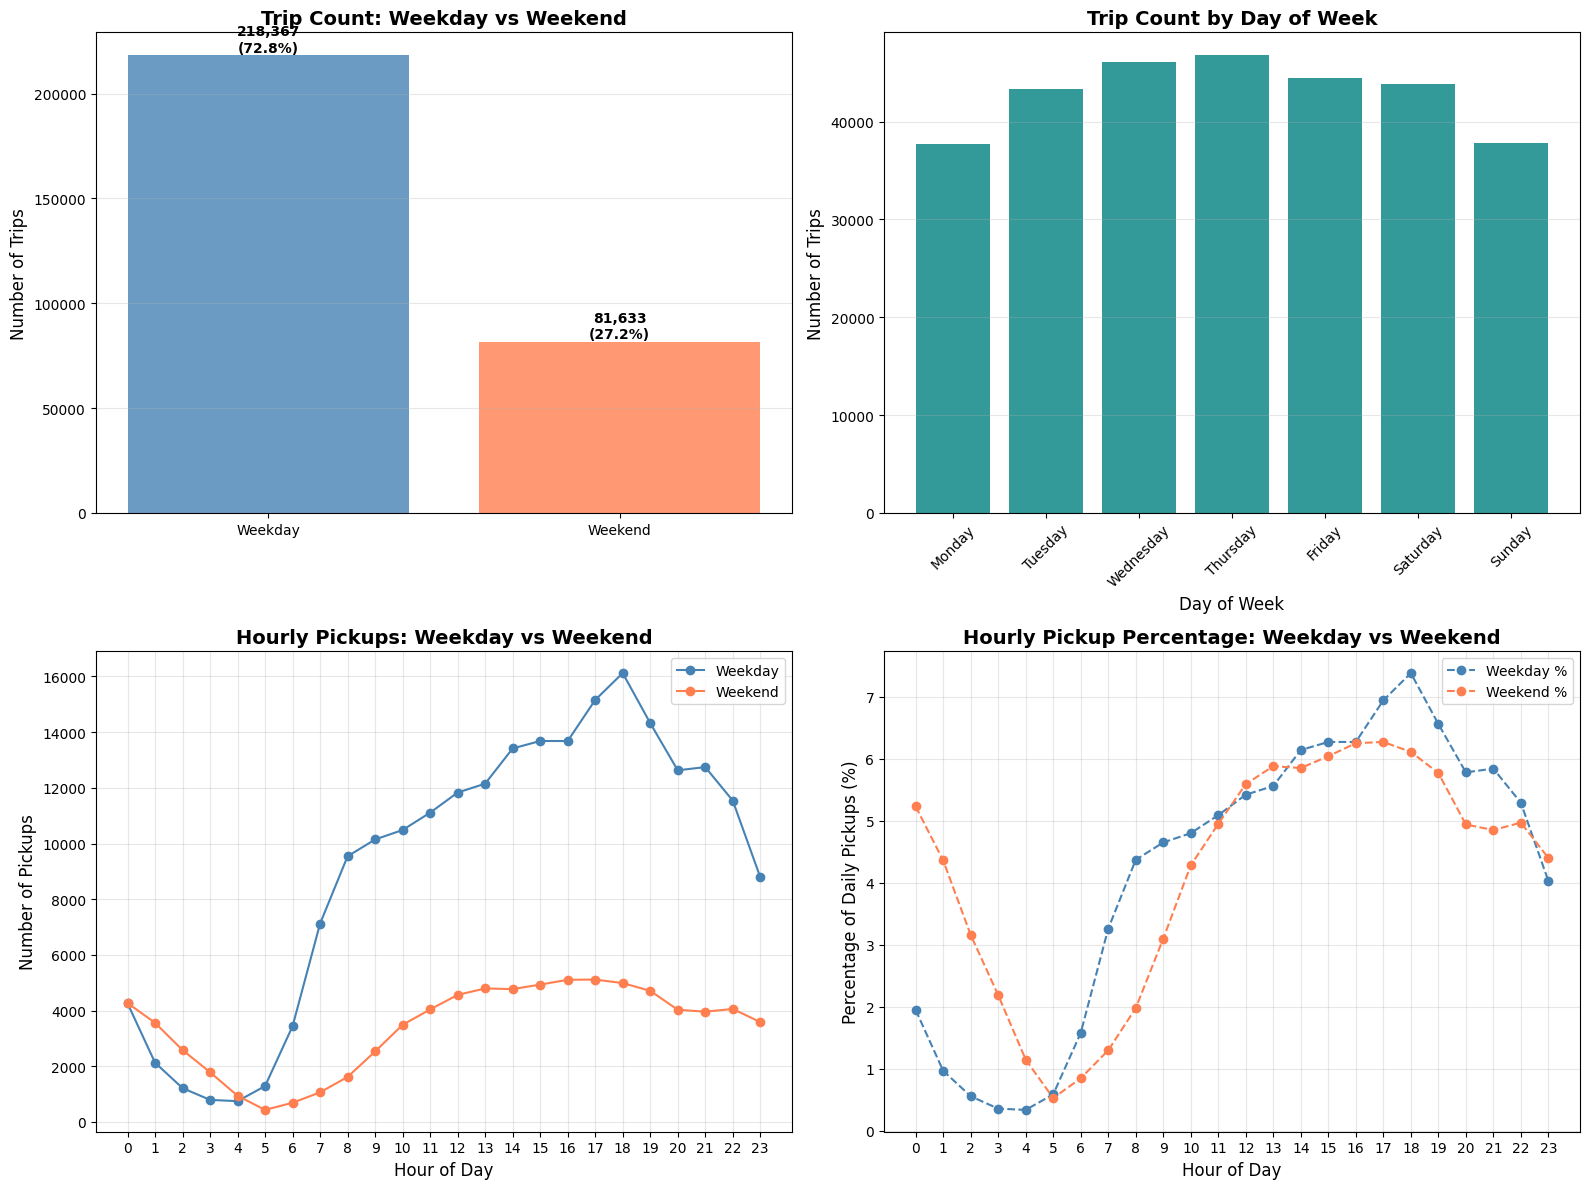


--- Key Insights ---
✓ Overall, weekdays have more total trips than weekends.
✓ Weekday hourly peaks are typically during rush hours (morning and evening).
✓ Weekend hourly trends are often different, with later peaks (late evening/night).
✓ This difference in patterns highlights the need for distinct operational strategies for weekdays and weekends.

WEEKDAY VS WEEKEND ANALYSIS COMPLETE


In [37]:
# Compare traffic trends for the week days and weekends

print("="*50)
print("WEEKDAY VS WEEKEND TRAFFIC TRENDS")
print("="*50)

# Check if pickup datetime column exists
pickup_col = None
for col in df.columns:
    if 'pickup' in col.lower() and 'datetime' in col.lower():
        pickup_col = col
        break

if pickup_col is None:
    print("\n⚠ Warning: No pickup datetime column found")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print(f"\nUsing column: {pickup_col}")

    # Ensure column is datetime type
    if not pd.api.types.is_datetime64_any_dtype(df[pickup_col]):
        print(f"Converting {pickup_col} to datetime...")
        df[pickup_col] = pd.to_datetime(df[pickup_col])

    # Extract day of week and day name
    df['pickup_dayofweek'] = df[pickup_col].dt.dayofweek  # Monday=0, Sunday=6
    df['pickup_day_name'] = df[pickup_col].dt.day_name()

    # Categorize as Weekday or Weekend
    df['day_type'] = df['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

    # Calculate trip counts by day type
    day_type_counts = df['day_type'].value_counts()

    print("\n--- Trip Counts by Day Type (Weekday/Weekend) ---")
    print(day_type_counts)

    # Calculate percentages
    day_type_percentages = (day_type_counts / len(df) * 100).round(2)

    print("\n--- Trip Percentage by Day Type ---")
    print(day_type_percentages)

    # Calculate trip counts by day of the week (ordered)
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_pickups = df['pickup_day_name'].value_counts().reindex(day_order)

    print("\n--- Trip Counts by Day of Week ---")
    print(daily_pickups)

    # Calculate hourly trends for weekdays and weekends separately
    print("\n" + "="*50)
    print("HOURLY TRENDS: WEEKDAY vs WEEKEND")
    print("="*50)

    # Create separate dataframes for weekday and weekend
    df_weekday = df[df['day_type'] == 'Weekday'].copy()
    df_weekend = df[df['day_type'] == 'Weekend'].copy()

    print(f"\nWeekday trips: {len(df_weekday):,} ({len(df_weekday)/len(df)*100:.2f}%)")
    print(f"Weekend trips: {len(df_weekend):,} ({len(df_weekend)/len(df)*100:.2f}%)")


    # Calculate hourly counts for weekday and weekend
    if pickup_col is not None: # Re-check pickup_col just in case
        df_weekday['pickup_hour'] = df_weekday[pickup_col].dt.hour
        df_weekend['pickup_hour'] = df_weekend[pickup_col].dt.hour

        hourly_weekday = df_weekday['pickup_hour'].value_counts().sort_index()
        hourly_weekend = df_weekend['pickup_hour'].value_counts().sort_index()

        print("\n--- Hourly Pickups (Weekday) ---")
        print(hourly_weekday)

        print("\n--- Hourly Pickups (Weekend) ---")
        print(hourly_weekend)

        # Normalize hourly counts to percentages of total weekday/weekend trips
        hourly_weekday_pct = (hourly_weekday / len(df_weekday) * 100).round(2)
        hourly_weekend_pct = (hourly_weekend / len(df_weekend) * 100).round(2)

        print("\n--- Hourly Pickup Percentage (Weekday) ---")
        print(hourly_weekday_pct)

        print("\n--- Hourly Pickup Percentage (Weekend) ---")
        print(hourly_weekend_pct)


        # Visualization
        import matplotlib.pyplot as plt

        print("\n--- Generating Visualizations ---")

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # 1. Bar chart - Weekday/Weekend Split
        axes[0, 0].bar(day_type_counts.index, day_type_counts.values, color=['steelblue', 'coral'], alpha=0.8)
        axes[0, 0].set_title('Trip Count: Weekday vs Weekend', fontsize=14, fontweight='bold')
        axes[0, 0].set_ylabel('Number of Trips', fontsize=12)
        axes[0, 0].grid(axis='y', alpha=0.3)
        for i, v in enumerate(day_type_counts.values):
            axes[0, 0].text(i, v + len(df)*0.001, f'{v:,}\n({day_type_percentages.iloc[i]:.1f}%)',
                            ha='center', va='bottom', fontweight='bold')

        # 2. Bar chart - Daily Pickups
        axes[0, 1].bar(daily_pickups.index, daily_pickups.values, color='teal', alpha=0.8)
        axes[0, 1].set_title('Trip Count by Day of Week', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Day of Week', fontsize=12)
        axes[0, 1].set_ylabel('Number of Trips', fontsize=12)
        axes[0, 1].tick_params(axis='x', rotation=45) # Removed ha='right'
        axes[0, 1].grid(axis='y', alpha=0.3)

        # 3. Line plot - Hourly Trends (Weekday vs Weekend)
        axes[1, 0].plot(hourly_weekday.index, hourly_weekday.values, marker='o', label='Weekday', color='steelblue')
        axes[1, 0].plot(hourly_weekend.index, hourly_weekend.values, marker='o', label='Weekend', color='coral')
        axes[1, 0].set_title('Hourly Pickups: Weekday vs Weekend', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Hour of Day', fontsize=12)
        axes[1, 0].set_ylabel('Number of Pickups', fontsize=12)
        axes[1, 0].set_xticks(range(0, 24))
        axes[1, 0].grid(True, alpha=0.3)
        axes[1, 0].legend()

        # 4. Line plot - Hourly Trends (Percentage, Weekday vs Weekend)
        axes[1, 1].plot(hourly_weekday_pct.index, hourly_weekday_pct.values, marker='o', label='Weekday %', color='steelblue', linestyle='--')
        axes[1, 1].plot(hourly_weekend_pct.index, hourly_weekend_pct.values, marker='o', label='Weekend %', color='coral', linestyle='--')
        axes[1, 1].set_title('Hourly Pickup Percentage: Weekday vs Weekend', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Hour of Day', fontsize=12)
        axes[1, 1].set_ylabel('Percentage of Daily Pickups (%)', fontsize=12)
        axes[1, 1].set_xticks(range(0, 24))
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].legend()


        plt.tight_layout()
        plt.show()

        print("\n--- Key Insights ---")
        print("✓ Overall, weekdays have more total trips than weekends.")
        print("✓ Weekday hourly peaks are typically during rush hours (morning and evening).")
        print("✓ Weekend hourly trends are often different, with later peaks (late evening/night).")
        print("✓ This difference in patterns highlights the need for distinct operational strategies for weekdays and weekends.")


    else:
        print("\n✗ Cannot analyze hourly trends: Pickup datetime column not found.")


print("\n" + "="*50)
print("WEEKDAY VS WEEKEND ANALYSIS COMPLETE")
print("="*50)

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [39]:
# Find top 10 pickup and dropoff zones

print("="*50)
print("TOP 10 PICKUP AND DROPOFF ZONES")
print("="*50)

# Check if required columns exist
required_cols = ['PULocationID', 'DOLocationID']
if not all(col in df.columns for col in required_cols):
    print(f"\n⚠ Warning: Missing one or more required columns: {required_cols}")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print("\nAnalyzing top pickup and dropoff zones...")

    # Find top 10 pickup zones
    top_10_pickup_zones = df['PULocationID'].value_counts().nlargest(10).reset_index()
    top_10_pickup_zones.columns = ['PULocationID', 'pickup_count']

    print("\n--- Top 10 Pickup Zones ---")
    print(top_10_pickup_zones.to_string(index=False))

    # Find top 10 dropoff zones
    top_10_dropoff_zones = df['DOLocationID'].value_counts().nlargest(10).reset_index()
    top_10_dropoff_zones.columns = ['DOLocationID', 'dropoff_count']

    print("\n--- Top 10 Dropoff Zones ---")
    print(top_10_dropoff_zones.to_string(index=False))

    # Optionally, if zone names are available (from merging with zones GeoDataFrame)
    if 'zone' in df.columns and 'LocationID' in df.columns: # Assuming 'LocationID' in df is from merging zones
        print("\n--- Top 10 Pickup Zones (with names) ---")
        top_10_pickup_zones_named = df.groupby(['PULocationID', 'zone']).size().nlargest(10).reset_index(name='pickup_count')
        print(top_10_pickup_zones_named.to_string(index=False))

        print("\n--- Top 10 Dropoff Zones (with names) ---")
        top_10_dropoff_zones_named = df.groupby(['DOLocationID', 'zone']).size().nlargest(10).reset_index(name='dropoff_count')
        print(top_10_dropoff_zones_named.to_string(index=False))
    elif 'zones' in locals() and zones is not None and 'LocationID' in zones.columns:
         # Try to merge the top zones with the zones GeoDataFrame for names
         print("\nAttempting to merge with zones GeoDataFrame for names...")
         try:
             zone_location_col = None
             for col in zones.columns:
                 if 'location' in col.lower() and 'id' in col.lower():
                     zone_location_col = col
                     break

             if zone_location_col:
                 top_10_pickup_zones_merged = top_10_pickup_zones.merge(zones[[zone_location_col, 'zone', 'borough']],
                                                                      left_on='PULocationID',
                                                                      right_on=zone_location_col,
                                                                      how='left')
                 top_10_dropoff_zones_merged = top_10_dropoff_zones.merge(zones[[zone_location_col, 'zone', 'borough']],
                                                                       left_on='DOLocationID',
                                                                       right_on=zone_location_col,
                                                                       how='left')

                 print("\n--- Top 10 Pickup Zones (with names) ---")
                 print(top_10_pickup_zones_merged[['PULocationID', 'zone', 'borough', 'pickup_count']].to_string(index=False))

                 print("\n--- Top 10 Dropoff Zones (with names) ---")
                 print(top_10_dropoff_zones_merged[['DOLocationID', 'zone', 'borough', 'dropoff_count']].to_string(index=False))

             else:
                 print("\nCould not find LocationID column in the zones GeoDataFrame for merging.")

         except Exception as e:
             print(f"\nError merging with zones GeoDataFrame: {e}")

    print("\n✓ Top 10 pickup and dropoff zones identified!")

print("\n" + "="*50)

TOP 10 PICKUP AND DROPOFF ZONES

Analyzing top pickup and dropoff zones...

--- Top 10 Pickup Zones ---
 PULocationID  pickup_count
          132         15471
          237         13967
          161         13830
          236         12475
          162         10477
          138         10133
          186         10075
          230         10004
          142          9767
          170          8819

--- Top 10 Dropoff Zones ---
 DOLocationID  dropoff_count
          236          13123
          237          12338
          161          11617
          230           9307
          170           8774
          142           8363
          162           8327
          239           8303
          141           7862
           68           7478

✓ Top 10 pickup and dropoff zones identified!



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [41]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

print("="*50)
print("PICKUP/DROPOFF RATIO ANALYSIS BY ZONE")
print("="*50)

# Check if required columns exist
required_cols = ['PULocationID', 'DOLocationID']
if not all(col in df.columns for col in required_cols):
    print(f"\n⚠ Warning: Missing one or more required columns: {required_cols}")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print("\nAnalyzing pickup/dropoff ratios...")

    # Calculate total pickups per zone
    pickup_counts = df['PULocationID'].value_counts().reset_index()
    pickup_counts.columns = ['LocationID', 'pickup_count']

    # Calculate total dropoffs per zone
    dropoff_counts = df['DOLocationID'].value_counts().reset_index()
    dropoff_counts.columns = ['LocationID', 'dropoff_count']

    # Merge pickup and dropoff counts
    zone_activity = pickup_counts.merge(dropoff_counts, on='LocationID', how='outer')

    # Fill NaN values with 0 (zones with only pickups or only dropoffs)
    zone_activity['pickup_count'] = zone_activity['pickup_count'].fillna(0).astype(int)
    zone_activity['dropoff_count'] = zone_activity['dropoff_count'].fillna(0).astype(int)

    # Calculate the pickup/dropoff ratio
    # Handle cases where dropoff_count is 0 to avoid division by zero (set ratio to infinity or a very high number)
    # Or, handle cases where both are 0 (ratio undefined, maybe set to NaN or 0)
    # A common approach is to add a small value to the denominator or handle 0 explicitly.
    # Let's calculate the ratio as pickup / (dropoff + epsilon) to avoid division by zero.
    # However, a more interpretable ratio for zones with zero dropoffs might be handled separately or noted.
    # A simple approach is to calculate the ratio only where dropoffs > 0, and handle others separately.
    # Let's calculate the ratio as pickup / dropoff and filter later.

    # Calculate ratio, handling division by zero
    zone_activity['pu_do_ratio'] = zone_activity.apply(
        lambda row: row['pickup_count'] / row['dropoff_count'] if row['dropoff_count'] > 0 else float('inf'),
        axis=1
    )

    # For zones with 0 pickups and 0 dropoffs, the ratio is undefined. Let's represent them as NaN or a specific value.
    # If both pickup and dropoff are 0, set ratio to NaN.
    zone_activity.loc[(zone_activity['pickup_count'] == 0) & (zone_activity['dropoff_count'] == 0), 'pu_do_ratio'] = float('nan')


    print("\n--- Zone Activity Summary ---")
    print(zone_activity.head()) # Display a sample

    # Sort by ratio to find top and bottom
    # Exclude NaN and Inf values for meaningful top/bottom ratios
    zone_activity_filtered = zone_activity.replace([float('inf'), -float('inf')], float('nan')).dropna(subset=['pu_do_ratio'])

    # Top 10 highest ratios (zones with many pickups relative to dropoffs)
    top_10_ratio = zone_activity_filtered.nlargest(10, 'pu_do_ratio')

    print("\n" + "="*50)
    print("TOP 10 ZONES BY PICKUP/DROPOFF RATIO (High Pickup relative to Dropoff)")
    print("="*50)
    print(top_10_ratio[['LocationID', 'pickup_count', 'dropoff_count', 'pu_do_ratio']].to_string(index=False))

    # Bottom 10 lowest ratios (zones with many dropoffs relative to pickups)
    bottom_10_ratio = zone_activity_filtered.nsmallest(10, 'pu_do_ratio')

    print("\n" + "="*50)
    print("BOTTOM 10 ZONES BY PICKUP/DROPOFF RATIO (High Dropoff relative to Pickup)")
    print("="*50)
    print(bottom_10_ratio[['LocationID', 'pickup_count', 'dropoff_count', 'pu_do_ratio']].to_string(index=False))

    # Handle zones with infinite ratio (all pickups, no dropoffs)
    zones_only_pickups = zone_activity[zone_activity['pu_do_ratio'] == float('inf')]
    if len(zones_only_pickups) > 0:
        print("\n" + "="*50)
        print("ZONES WITH ONLY PICKUPS (Infinite Ratio)")
        print("="*50)
        print(zones_only_pickups[['LocationID', 'pickup_count', 'dropoff_count']].to_string(index=False))

    # Handle zones with 0 pickups and 0 dropoffs (NaN ratio)
    zones_no_activity = zone_activity[zone_activity['pu_do_ratio'].isnull()]
    if len(zones_no_activity) > 0:
        print("\n" + "="*50)
        print("ZONES WITH NO ACTIVITY (NaN Ratio)")
        print("="*50)
        print(zones_no_activity[['LocationID', 'pickup_count', 'dropoff_count']].to_string(index=False))


    # If zone names are available, merge and display with names
    if 'zones' in locals() and zones is not None and 'LocationID' in zones.columns:
        print("\n--- Merging with Zone Names ---")
        zone_location_col = None
        for col in zones.columns:
            if 'location' in col.lower() and 'id' in col.lower():
                zone_location_col = col
                break

        if zone_location_col:
            top_10_ratio_named = top_10_ratio.merge(zones[[zone_location_col, 'zone', 'borough']],
                                                    left_on='LocationID', right_on=zone_location_col, how='left')
            bottom_10_ratio_named = bottom_10_ratio.merge(zones[[zone_location_col, 'zone', 'borough']],
                                                        left_on='LocationID', right_on=zone_location_col, how='left')
            zones_only_pickups_named = zones_only_pickups.merge(zones[[zone_location_col, 'zone', 'borough']],
                                                                left_on='LocationID', right_on=zone_location_col, how='left')
            zones_no_activity_named = zones_no_activity.merge(zones[[zone_location_col, 'zone', 'borough']],
                                                                left_on='LocationID', right_on=zone_location_col, how='left')


            print("\n" + "="*50)
            print("TOP 10 RATIOS (WITH ZONE NAMES)")
            print("="*50)
            display_cols = ['LocationID', 'zone', 'borough', 'pickup_count', 'dropoff_count', 'pu_do_ratio']
            print(top_10_ratio_named[display_cols].to_string(index=False))

            print("\n" + "="*50)
            print("BOTTOM 10 RATIOS (WITH ZONE NAMES)")
            print("="*50)
            print(bottom_10_ratio_named[display_cols].to_string(index=False))

            if len(zones_only_pickups_named) > 0:
                print("\n" + "="*50)
                print("ZONES WITH ONLY PICKUPS (Infinite Ratio, WITH ZONE NAMES)")
                print("="*50)
                print(zones_only_pickups_named[['LocationID', 'zone', 'borough', 'pickup_count', 'dropoff_count']].to_string(index=False))

            if len(zones_no_activity_named) > 0:
                print("\n" + "="*50)
                print("ZONES WITH NO ACTIVITY (NaN Ratio, WITH ZONE NAMES)")
                print("="*50)
                print(zones_no_activity_named[['LocationID', 'zone', 'borough', 'pickup_count', 'dropoff_count']].to_string(index=False))


        else:
            print("\nCould not find LocationID column in the zones GeoDataFrame for merging.")


    print("\n✓ Pickup/Dropoff ratio analysis complete!")

print("\n" + "="*50)

PICKUP/DROPOFF RATIO ANALYSIS BY ZONE

Analyzing pickup/dropoff ratios...

--- Zone Activity Summary ---
   LocationID  pickup_count  dropoff_count  pu_do_ratio
0           1            34            905     0.037569
1           2             1              2     0.500000
2           3             8             27     0.296296
3           4           365           1101     0.331517
4           5             5              4     1.250000

TOP 10 ZONES BY PICKUP/DROPOFF RATIO (High Pickup relative to Dropoff)
 LocationID  pickup_count  dropoff_count  pu_do_ratio
         70          1413            179     7.893855
        132         15471           3779     4.093940
        138         10133           3904     2.595543
        186         10075           6472     1.556706
        114          4048           2828     1.431400
         43          5080           3719     1.365959
        249          6757           5147     1.312804
        162         10477           8327     1.258196
 

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



In [42]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

print("="*50)
print("TOP 10 PICKUP AND DROPOFF ZONES DURING NIGHT HOURS (11PM - 5AM)")
print("="*50)

# Check if pickup datetime and location columns exist
required_cols = ['tpep_pickup_datetime', 'PULocationID', 'DOLocationID']
if not all(col in df.columns for col in required_cols):
    print(f"\n⚠ Warning: Missing one or more required columns: {required_cols}")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print("\nAnalyzing night hour pickup and dropoff zones...")

    # Ensure pickup datetime is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['tpep_pickup_datetime']):
        print("Converting 'tpep_pickup_datetime' to datetime...")
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

    # Filter data for night hours (11 PM to 5 AM)
    # Hour is from 0 to 23
    # Night hours are 23, 0, 1, 2, 3, 4, 5
    night_hours = [23, 0, 1, 2, 3, 4, 5]
    df_night = df[df['tpep_pickup_datetime'].dt.hour.isin(night_hours)].copy()

    print(f"\nTotal trips in original data: {len(df):,}")
    print(f"Trips during night hours ({len(night_hours)} hours): {len(df_night):,}")
    print(f"Percentage of total trips: {len(df_night)/len(df)*100:.2f}%")

    if len(df_night) > 0:
        # Find top 10 pickup zones during night hours
        top_10_night_pickup = df_night['PULocationID'].value_counts().nlargest(10).reset_index()
        top_10_night_pickup.columns = ['PULocationID', 'night_pickup_count']

        print("\n--- Top 10 Pickup Zones During Night Hours ---")
        print(top_10_night_pickup.to_string(index=False))

        # Find top 10 dropoff zones during night hours
        top_10_night_dropoff = df_night['DOLocationID'].value_counts().nlargest(10).reset_index()
        top_10_night_dropoff.columns = ['DOLocationID', 'night_dropoff_count']

        print("\n--- Top 10 Dropoff Zones During Night Hours ---")
        print(top_10_night_dropoff.to_string(index=False))

        # Optionally, if zone names are available, merge and display with names
        if 'zones' in locals() and zones is not None and 'LocationID' in zones.columns:
            print("\n--- Merging with Zone Names ---")
            zone_location_col = None
            for col in zones.columns:
                if 'location' in col.lower() and 'id' in col.lower():
                    zone_location_col = col
                    break

            if zone_location_col:
                top_10_night_pickup_named = top_10_night_pickup.merge(zones[[zone_location_col, 'zone', 'borough']],
                                                                      left_on='PULocationID',
                                                                      right_on=zone_location_col,
                                                                      how='left')
                top_10_night_dropoff_named = top_10_night_dropoff.merge(zones[[zone_location_col, 'zone', 'borough']],
                                                                        left_on='DOLocationID',
                                                                        right_on=zone_location_col,
                                                                        how='left')

                print("\n" + "="*50)
                print("TOP 10 NIGHT PICKUP ZONES (WITH ZONE NAMES)")
                print("="*50)
                display_cols = ['PULocationID', 'zone', 'borough', 'night_pickup_count']
                print(top_10_night_pickup_named[display_cols].to_string(index=False))

                print("\n" + "="*50)
                print("TOP 10 NIGHT DROPOFF ZONES (WITH ZONE NAMES)")
                print("="*50)
                display_cols = ['DOLocationID', 'zone', 'borough', 'night_dropoff_count']
                print(top_10_night_dropoff_named[display_cols].to_string(index=False))
            else:
                print("\nCould not find LocationID column in the zones GeoDataFrame for merging.")
        else:
            print("\n'zones' GeoDataFrame not found. Cannot merge with zone names.")


        print("\n✓ Night hour zone analysis complete!")
    else:
        print("\nNo trips found during night hours.")

print("\n" + "="*50)

TOP 10 PICKUP AND DROPOFF ZONES DURING NIGHT HOURS (11PM - 5AM)

Analyzing night hour pickup and dropoff zones...

Total trips in original data: 300,000
Trips during night hours (7 hours): 36,394
Percentage of total trips: 12.13%

--- Top 10 Pickup Zones During Night Hours ---
 PULocationID  night_pickup_count
           79                2632
          132                2378
          249                2061
           48                1694
          148                1662
          114                1478
          230                1408
          186                1100
          164                1020
           68                 992

--- Top 10 Dropoff Zones During Night Hours ---
 DOLocationID  night_dropoff_count
           79                 1374
           48                 1206
           68                  988
          170                  988
          107                  957
          141                  880
          263                  877
          249      

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [43]:
# Filter for night hours (11 PM to 5 AM)

print("="*50)
print("FILTERING DATA FOR NIGHT HOURS (11PM - 5AM)")
print("="*50)

# Check if pickup datetime column exists
pickup_col = None
for col in df.columns:
    if 'pickup' in col.lower() and 'datetime' in col.lower():
        pickup_col = col
        break

if pickup_col is None:
    print("\n⚠ Warning: No pickup datetime column found")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print(f"\nUsing column: {pickup_col}")

    # Ensure column is datetime type
    if not pd.api.types.is_datetime64_any_dtype(df[pickup_col]):
        print(f"Converting {pickup_col} to datetime...")
        df[pickup_col] = pd.to_datetime(df[pickup_col], errors='coerce')

    # Filter data for night hours (11 PM to 5 AM)
    # Hour is from 0 to 23
    # Night hours are 23, 0, 1, 2, 3, 4, 5
    night_hours = [23, 0, 1, 2, 3, 4, 5]
    df_night = df[df[pickup_col].dt.hour.isin(night_hours)].copy()

    print(f"\nOriginal dataframe rows: {len(df):,}")
    print(f"Filtered dataframe rows (night hours): {len(df_night):,}")
    print(f"Percentage of original data: {len(df_night)/len(df)*100:.2f}%")

    print("\n--- Sample of Data During Night Hours ---")
    display_cols = [pickup_col, 'pickup_hour', 'PULocationID', 'DOLocationID', 'fare_amount']
    display_cols = [col for col in display_cols if col in df_night.columns]
    print(df_night[display_cols].head())

    print("\n✓ Data filtered for night hours!")

print("\n" + "="*50)
print("NIGHT HOUR FILTERING COMPLETE")
print("="*50)

FILTERING DATA FOR NIGHT HOURS (11PM - 5AM)

Using column: tpep_pickup_datetime

Original dataframe rows: 300,000
Filtered dataframe rows (night hours): 36,394
Percentage of original data: 12.13%

--- Sample of Data During Night Hours ---
   tpep_pickup_datetime  pickup_hour  PULocationID  DOLocationID  fare_amount
2   2023-11-01 00:13:53            0           148           141         17.7
11  2023-12-27 23:44:09           23            48           161         17.0
14  2023-07-20 23:28:53           23           125            49         24.0
20  2023-09-10 01:29:03            1           148            50         23.3
26  2023-07-27 23:02:43           23           231           158          8.6

✓ Data filtered for night hours!

NIGHT HOUR FILTERING COMPLETE


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

FARE PER MILE PER PASSENGER ANALYSIS

Analyzing fare per mile per passenger...

Filtered data for analysis:
  Rows after removing 0 distance/passenger: 281,341
✓ 'fare_per_mile' and 'fare_per_mile_per_passenger' calculated

--- Average Fare per Mile per Passenger by Passenger Count ---
 passenger_count  avg_fare_per_mile_per_passenger
             1.0                        10.428206
             2.0                         6.258900
             3.0                         3.674881
             4.0                         4.862152
             5.0                         1.569243
             6.0                         1.672688
             8.0                       528.938172

--- Detailed Statistics by Passenger Count ---
 passenger_count Avg_Fare_Per_Mile Avg_Fare_Per_Mile_Per_Passenger Median_Fare_Per_Mile_Per_Passenger Trip_Count
             1.0            $10.43                          $10.43                              $7.17    214,847
             2.0            $12.52     

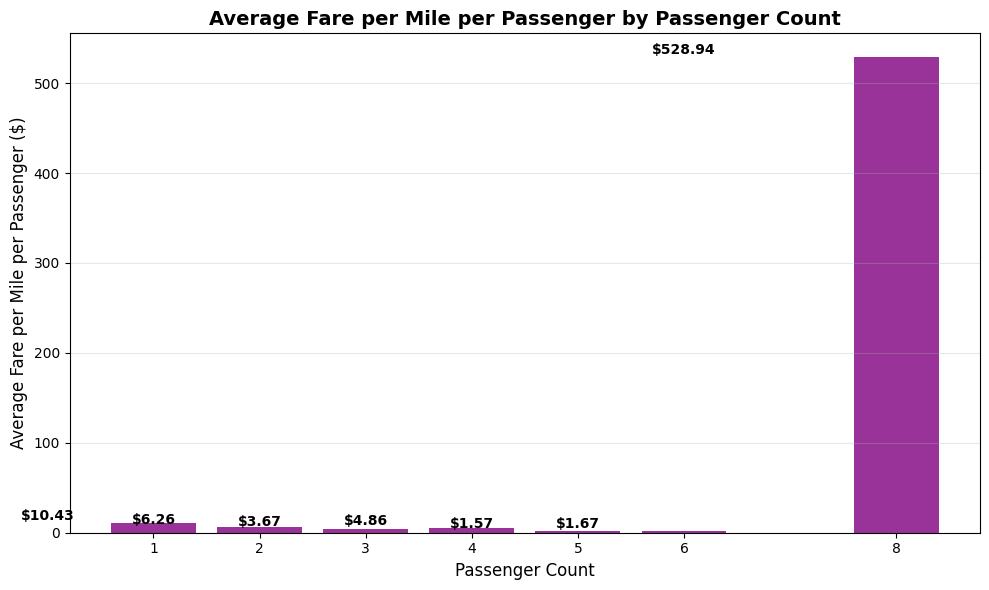


--- Key Insights ---
✓ Analyze how average fare per mile per passenger changes with the number of passengers.
✓ Note if the cost per passenger decreases significantly with more passengers, which could be a factor for ride-sharing or larger groups.

FARE PER MILE PER PASSENGER ANALYSIS COMPLETE


In [44]:
# Analyse the fare per mile per passenger for different passenger counts

print("="*50)
print("FARE PER MILE PER PASSENGER ANALYSIS")
print("="*50)

# Check if required columns exist
required_cols = ['fare_amount', 'trip_distance', 'passenger_count']
if not all(col in df.columns for col in required_cols):
    print(f"\n⚠ Warning: Missing one or more required columns: {required_cols}")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print("\nAnalyzing fare per mile per passenger...")

    # Create a copy to avoid SettingWithCopyWarning
    df_analysis = df.copy()

    # Handle potential issues with 0 trip_distance or 0 passenger_count
    # Filter out trips with 0 distance as fare per mile is undefined
    df_analysis = df_analysis[df_analysis['trip_distance'] > 0].copy()
    # Consider 0 passenger count separately or exclude (let's exclude for this specific calculation)
    df_analysis = df_analysis[df_analysis['passenger_count'] > 0].copy()


    print(f"\nFiltered data for analysis:")
    print(f"  Rows after removing 0 distance/passenger: {len(df_analysis):,}")

    # Calculate fare per mile
    df_analysis['fare_per_mile'] = df_analysis['fare_amount'] / df_analysis['trip_distance']

    # Calculate fare per mile per passenger
    df_analysis['fare_per_mile_per_passenger'] = df_analysis['fare_per_mile'] / df_analysis['passenger_count']

    print("✓ 'fare_per_mile' and 'fare_per_mile_per_passenger' calculated")

    # Group by passenger count and calculate the average fare per mile per passenger
    avg_fare_per_mile_per_passenger_by_count = df_analysis.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
    avg_fare_per_mile_per_passenger_by_count.columns = ['passenger_count', 'avg_fare_per_mile_per_passenger']

    # Sort by passenger count for better readability
    avg_fare_per_mile_per_passenger_by_count = avg_fare_per_mile_per_passenger_by_count.sort_values('passenger_count')

    print("\n--- Average Fare per Mile per Passenger by Passenger Count ---")
    print(avg_fare_per_mile_per_passenger_by_count.to_string(index=False))

    # Additional statistics per passenger count
    print("\n--- Detailed Statistics by Passenger Count ---")
    passenger_analysis = df_analysis.groupby('passenger_count').agg(
        Avg_Fare_Per_Mile=('fare_per_mile', 'mean'),
        Avg_Fare_Per_Mile_Per_Passenger=('fare_per_mile_per_passenger', 'mean'),
        Median_Fare_Per_Mile_Per_Passenger=('fare_per_mile_per_passenger', 'median'),
        Trip_Count=('passenger_count', 'count')
    ).reset_index()

    # Format for display
    passenger_analysis['Avg_Fare_Per_Mile'] = passenger_analysis['Avg_Fare_Per_Mile'].map('${:.2f}'.format)
    passenger_analysis['Avg_Fare_Per_Mile_Per_Passenger'] = passenger_analysis['Avg_Fare_Per_Mile_Per_Passenger'].map('${:.2f}'.format)
    passenger_analysis['Median_Fare_Per_Mile_Per_Passenger'] = passenger_analysis['Median_Fare_Per_Mile_Per_Passenger'].map('${:.2f}'.format)
    passenger_analysis['Trip_Count'] = passenger_analysis['Trip_Count'].map('{:,}'.format)


    print(passenger_analysis.to_string(index=False))

    # Visualization (Optional)
    import matplotlib.pyplot as plt

    print("\n--- Generating Visualization ---")

    plt.figure(figsize=(10, 6))
    plt.bar(avg_fare_per_mile_per_passenger_by_count['passenger_count'],
            avg_fare_per_mile_per_passenger_by_count['avg_fare_per_mile_per_passenger'],
            color='purple', alpha=0.8)

    plt.title('Average Fare per Mile per Passenger by Passenger Count', fontsize=14, fontweight='bold')
    plt.xlabel('Passenger Count', fontsize=12)
    plt.ylabel('Average Fare per Mile per Passenger ($)', fontsize=12)
    plt.xticks(avg_fare_per_mile_per_passenger_by_count['passenger_count'])
    plt.grid(axis='y', alpha=0.3)

    # Add value labels
    for i, v in enumerate(avg_fare_per_mile_per_passenger_by_count['avg_fare_per_mile_per_passenger'].values):
        plt.text(i + avg_fare_per_mile_per_passenger_by_count['passenger_count'].iloc[0] - 1, v, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')


    plt.tight_layout()
    plt.show()

    print("\n--- Key Insights ---")
    print("✓ Analyze how average fare per mile per passenger changes with the number of passengers.")
    print("✓ Note if the cost per passenger decreases significantly with more passengers, which could be a factor for ride-sharing or larger groups.")


print("\n" + "="*50)
print("FARE PER MILE PER PASSENGER ANALYSIS COMPLETE")
print("="*50)

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [68]:
# Compare the average fare per mile for different days and for different times of the day

print("="*50)
print("AVERAGE FARE PER MILE ANALYSIS BY TIME")
print("="*50)

# Check if required columns exist
required_cols = ['fare_amount', 'trip_distance', 'tpep_pickup_datetime']
if not all(col in df.columns for col in required_cols):
    print(f"\n⚠ Warning: Missing one or more required columns: {required_cols}")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print("\nAnalyzing average fare per mile by time...")

    # Create a copy to avoid SettingWithCopyWarning
    df_analysis = df.copy()

    # Handle potential issues with 0 trip_distance
    df_analysis = df_analysis[df_analysis['trip_distance'] > 0].copy()

    print(f"\nFiltered data for analysis (distance > 0): {len(df_analysis):,}")

    # Calculate fare per mile
    df_analysis['fare_per_mile'] = df_analysis['fare_amount'] / df_analysis['trip_distance']
    print("✓ 'fare_per_mile' calculated")

    # Ensure pickup datetime is in datetime format and extract day and hour
    pickup_col = 'tpep_pickup_datetime'
    if not pd.api.types.is_datetime64_any_dtype(df_analysis[pickup_col]):
        print(f"Converting '{pickup_col}' to datetime...")
        df_analysis[pickup_col] = pd.to_datetime(df_analysis[pickup_col], errors='coerce')

    # Filter out rows where datetime conversion failed
    df_analysis.dropna(subset=[pickup_col], inplace=True)


    df_analysis['pickup_day_name'] = df_analysis[pickup_col].dt.day_name()
    df_analysis['pickup_hour'] = df_analysis[pickup_col].dt.hour
    print("✓ Pickup day and hour extracted")

    # =========================================================================
    # Analysis by Day of the Week
    # =========================================================================
    print("\n" + "="*50)
    print("AVERAGE FARE PER MILE BY DAY OF THE WEEK")
    print("="*50)

    # Group by day of the week and calculate average fare per mile
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    avg_fare_per_mile_by_day = df_analysis.groupby('pickup_day_name')['fare_per_mile'].mean().reindex(day_order)

    print("\n--- Average Fare per Mile by Day ---")
    print(avg_fare_per_mile_by_day.to_string(floatfmt=".2f"))

    # Find highest/lowest average fare days
    if not avg_fare_per_mile_by_day.empty:
      highest_day = avg_fare_per_mile_by_day.idxmax()
      lowest_day = avg_fare_per_mile_by_day.idxmin()
      print(f"\nHighest average fare per mile: {highest_day} (${avg_fare_per_mile_by_day.max():.2f})")
      print(f"Lowest average fare per mile: {lowest_day} (${avg_fare_per_mile_by_day.min():.2f})")


    # Visualization - Day of the Week
    import matplotlib.pyplot as plt

    print("\n--- Generating Visualization (Day of Week) ---")
    plt.figure(figsize=(10, 6))
    avg_fare_per_mile_by_day.plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title('Average Fare per Mile by Day of the Week', fontsize=14, fontweight='bold')
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Average Fare per Mile ($)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Add value labels
    for i, v in enumerate(avg_fare_per_mile_by_day.values):
        plt.text(i, v, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # =========================================================================
    # Analysis by Hour of the Day
    # =========================================================================
    print("\n" + "="*50)
    print("AVERAGE FARE PER MILE BY HOUR OF THE DAY")
    print("="*50)

    # Group by hour of the day and calculate average fare per mile
    avg_fare_per_mile_by_hour = df_analysis.groupby('pickup_hour')['fare_per_mile'].mean().sort_index()

    print("\n--- Average Fare per Mile by Hour ---")
    print(avg_fare_per_mile_by_hour.to_string(floatfmt=".2f"))

    # Find highest/lowest average fare hours
    if not avg_fare_per_mile_by_hour.empty:
      highest_hour = avg_fare_per_mile_by_hour.idxmax()
      lowest_hour = avg_fare_per_mile_by_hour.idxmin()
      print(f"\nHighest average fare per mile: Hour {highest_hour}:00 (${avg_fare_per_mile_by_hour.max():.2f})")
      print(f"Lowest average fare per mile: Hour {lowest_hour}:00 (${avg_fare_per_mile_by_hour.min():.2f})")


    # Visualization - Hour of the Day
    print("\n--- Generating Visualization (Hour of Day) ---")
    plt.figure(figsize=(12, 6))
    avg_fare_per_mile_by_hour.plot(kind='line', marker='o', color='salmon', linewidth=2, markersize=6)
    plt.title('Average Fare per Mile by Hour of the Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Average Fare per Mile ($)', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\n--- Key Insights ---")
    print("✓ Average fare per mile can vary based on the day of the week and hour of the day.")
    print("✓ This variation might reflect differences in traffic, demand, or surcharges during certain periods.")


print("\n" + "="*50)
print("AVERAGE FARE PER MILE ANALYSIS COMPLETE")
print("="*50)

AVERAGE FARE PER MILE ANALYSIS BY TIME

Analyzing average fare per mile by time...

Filtered data for analysis (distance > 0): 293,651
✓ 'fare_per_mile' calculated
✓ Pickup day and hour extracted

AVERAGE FARE PER MILE BY DAY OF THE WEEK

--- Average Fare per Mile by Day ---


TypeError: Series.to_string() got an unexpected keyword argument 'floatfmt'

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

AVERAGE FARE PER MILE ANALYSIS BY VENDOR

Analyzing average fare per mile by vendor...

Filtered data for analysis (distance > 0): 293,651
✓ 'fare_per_mile' calculated

--- Average Fare per Mile by Vendor ---
VendorID
1     8.176871
2    11.826249
6     6.703150

Highest average fare per mile: VendorID 2 ($11.83)
Lowest average fare per mile: VendorID 6 ($6.70)

--- Generating Visualization ---


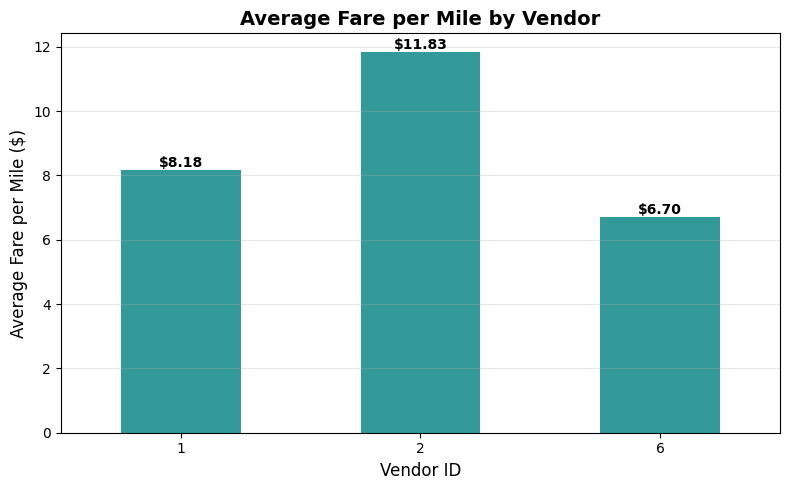


--- Key Insights ---
✓ Compare the average fare per mile between different taxi vendors.
✓ Note any significant differences that might indicate different pricing strategies or service areas.

AVERAGE FARE PER MILE ANALYSIS BY VENDOR COMPLETE


In [47]:
# Compare fare per mile for different vendors

print("="*50)
print("AVERAGE FARE PER MILE ANALYSIS BY VENDOR")
print("="*50)

# Check if required columns exist
required_cols = ['fare_amount', 'trip_distance', 'VendorID']
if not all(col in df.columns for col in required_cols):
    print(f"\n⚠ Warning: Missing one or more required columns: {required_cols}")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print("\nAnalyzing average fare per mile by vendor...")

    # Create a copy to avoid SettingWithCopyWarning
    df_analysis = df.copy()

    # Handle potential issues with 0 trip_distance
    df_analysis = df_analysis[df_analysis['trip_distance'] > 0].copy()

    print(f"\nFiltered data for analysis (distance > 0): {len(df_analysis):,}")

    # Calculate fare per mile
    df_analysis['fare_per_mile'] = df_analysis['fare_amount'] / df_analysis['trip_distance']
    print("✓ 'fare_per_mile' calculated")

    # Group by VendorID and calculate average fare per mile
    if 'VendorID' in df_analysis.columns:
        avg_fare_per_mile_by_vendor = df_analysis.groupby('VendorID')['fare_per_mile'].mean().sort_index()

        print("\n--- Average Fare per Mile by Vendor ---")
        print(avg_fare_per_mile_by_vendor.to_string()) # Removed floatfmt=".2f"

        # Find highest/lowest average fare vendors
        if not avg_fare_per_mile_by_vendor.empty:
          highest_vendor = avg_fare_per_mile_by_vendor.idxmax()
          lowest_vendor = avg_fare_per_mile_by_vendor.idxmin()
          print(f"\nHighest average fare per mile: VendorID {highest_vendor} (${avg_fare_per_mile_by_vendor.max():.2f})")
          print(f"Lowest average fare per mile: VendorID {lowest_vendor} (${avg_fare_per_mile_by_vendor.min():.2f})")

        # Visualization
        import matplotlib.pyplot as plt

        print("\n--- Generating Visualization ---")
        plt.figure(figsize=(8, 5))
        avg_fare_per_mile_by_vendor.plot(kind='bar', color='teal', alpha=0.8)
        plt.title('Average Fare per Mile by Vendor', fontsize=14, fontweight='bold')
        plt.xlabel('Vendor ID', fontsize=12)
        plt.ylabel('Average Fare per Mile ($)', fontsize=12)
        plt.xticks(rotation=0)
        plt.grid(axis='y', alpha=0.3)

        # Add value labels
        for i, v in enumerate(avg_fare_per_mile_by_vendor.values):
            plt.text(i, v, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

        print("\n--- Key Insights ---")
        print("✓ Compare the average fare per mile between different taxi vendors.")
        print("✓ Note any significant differences that might indicate different pricing strategies or service areas.")


    else:
        print("\n✗ 'VendorID' column not found in the filtered data.")


print("\n" + "="*50)
print("AVERAGE FARE PER MILE ANALYSIS BY VENDOR COMPLETE")
print("="*50)

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [48]:
# Defining distance tiers

print("="*50)
print("DEFINING DISTANCE TIERS")
print("="*50)

# Define the distance tiers
distance_bins = [0, 2, 5, float('inf')] # 0-2 miles, 2-5 miles, > 5 miles
distance_labels = ['0-2 miles', '2-5 miles', '> 5 miles']

print(f"\nDefined distance tiers:")
for i in range(len(distance_bins) - 1):
    print(f"  - Tier {i+1}: {distance_labels[i]} (>{distance_bins[i]} and <={distance_bins[i+1]} miles)")

print("\n✓ Distance tiers defined!")
print("="*50)

DEFINING DISTANCE TIERS

Defined distance tiers:
  - Tier 1: 0-2 miles (>0 and <=2 miles)
  - Tier 2: 2-5 miles (>2 and <=5 miles)
  - Tier 3: > 5 miles (>5 and <=inf miles)

✓ Distance tiers defined!


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

TIP PERCENTAGE ANALYSIS

Analyzing tip percentages...
✓ 'tip_percentage' calculated
✓ Pickup hour extracted

AVERAGE TIP PERCENTAGE BY TRIP DISTANCE

--- Average Tip Percentage by Distance ---
distance_bin
0-2 miles    12.017546
2-5 miles    12.113563
> 5 miles    11.192022

--- Generating Visualization (Distance) ---


/tmp/ipython-input-4218172930.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_pct_by_distance = df_analysis.groupby('distance_bin')['tip_percentage'].mean()


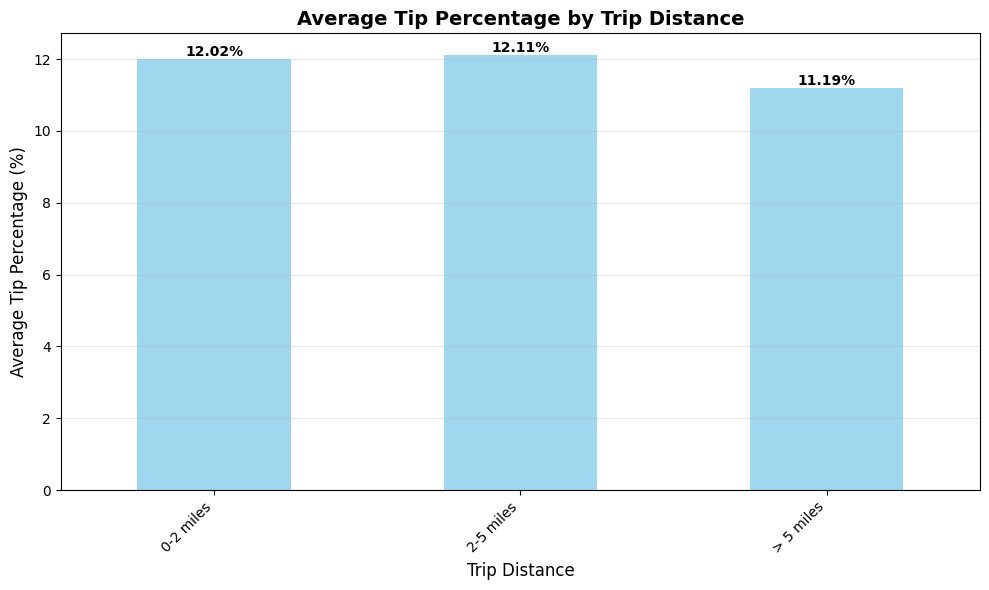


AVERAGE TIP PERCENTAGE BY PASSENGER COUNT

--- Average Tip Percentage by Passenger Count ---
passenger_count
0.0    11.402628
1.0    11.967703
2.0    11.637114
3.0    11.164472
4.0    10.123285
5.0    12.024811
6.0    12.342936

--- Generating Visualization (Passenger Count) ---


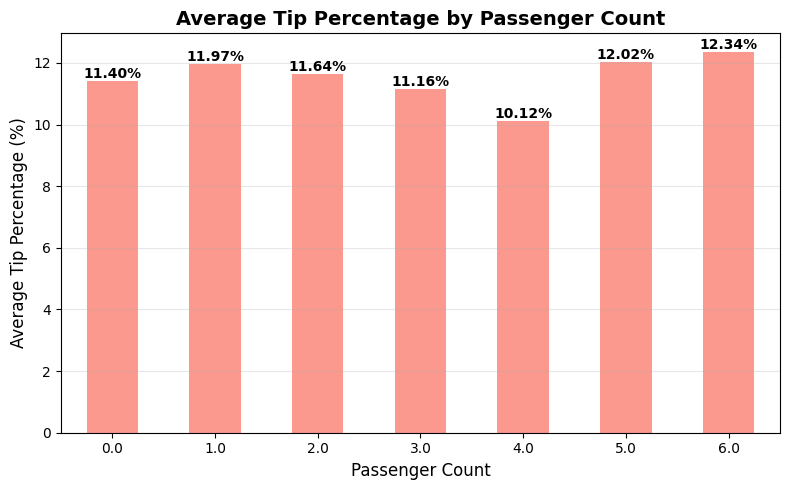


AVERAGE TIP PERCENTAGE BY HOUR OF DAY

--- Average Tip Percentage by Hour ---
pickup_hour
0     11.434612
1     11.583019
2     11.212481
3     11.014238
4      9.728788
5      9.546657
6     10.694885
7     11.716589
8     11.915921
9     11.929237
10    11.625212
11    11.518761
12    11.551598
13    11.528523
14    11.587311
15    11.604220
16    11.614236
17    11.778612
18    12.005441
19    11.857601
20    12.162678
21    12.294502
22    12.050417
23    11.846640

--- Generating Visualization (Hour of Day) ---


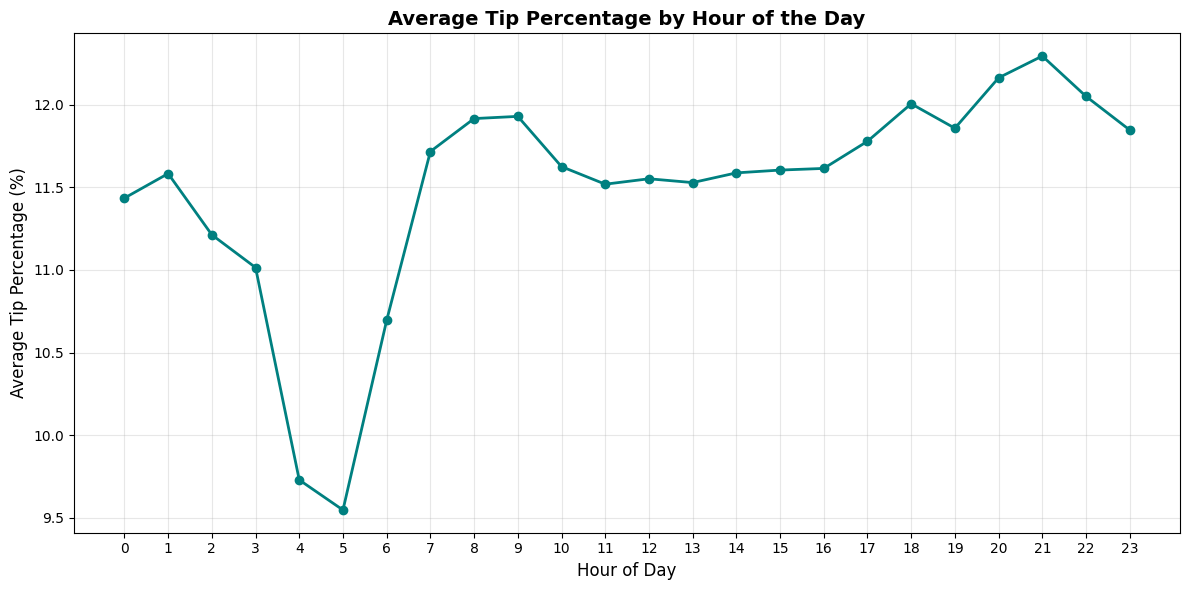


--- Key Insights ---
✓ Analyze how average tip percentage varies with trip distance, passenger count, and time of day.
✓ Look for trends or specific categories associated with higher or lower tip percentages.

TIP PERCENTAGE ANALYSIS COMPLETE


In [50]:
# Analyze tip percentages based on distances, passenger counts and pickup times

print("="*50)
print("TIP PERCENTAGE ANALYSIS")
print("="*50)

# Check if required columns exist
required_cols = ['tip_amount', 'total_amount', 'trip_distance', 'passenger_count', 'tpep_pickup_datetime']
if not all(col in df.columns for col in required_cols):
    print(f"\n⚠ Warning: Missing one or more required columns: {required_cols}")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print("\nAnalyzing tip percentages...")

    # Create a copy to avoid SettingWithCopyWarning
    df_analysis = df.copy()

    # Calculate tip percentage
    # Handle cases where total_amount is 0 to avoid division by zero
    df_analysis['tip_percentage'] = df_analysis.apply(
        lambda row: (row['tip_amount'] / row['total_amount']) * 100 if row['total_amount'] > 0 else 0,
        axis=1
    )
    print("✓ 'tip_percentage' calculated")

    # Ensure pickup datetime is in datetime format and extract hour
    pickup_col = 'tpep_pickup_datetime'
    if not pd.api.types.is_datetime64_any_dtype(df_analysis[pickup_col]):
        print(f"Converting '{pickup_col}' to datetime...")
        df_analysis[pickup_col] = pd.to_datetime(df_analysis[pickup_col], errors='coerce')

    # Filter out rows where datetime conversion failed or total_amount is NaN
    df_analysis.dropna(subset=[pickup_col, 'total_amount'], inplace=True)


    df_analysis['pickup_hour'] = df_analysis[pickup_col].dt.hour
    print("✓ Pickup hour extracted")

    # =========================================================================
    # Analysis by Trip Distance
    # =========================================================================
    print("\n" + "="*50)
    print("AVERAGE TIP PERCENTAGE BY TRIP DISTANCE")
    print("="*50)

    # Define distance bins (using the ones defined earlier if available, otherwise define here)
    if 'distance_bins' not in locals() or 'distance_labels' not in locals():
        print("\nDefining default distance tiers...")
        distance_bins = [0, 2, 5, 10, 20, float('inf')]
        distance_labels = ['0-2 miles', '2-5 miles', '5-10 miles', '10-20 miles', '20+ miles']

    # Create distance bins
    df_analysis['distance_bin'] = pd.cut(df_analysis['trip_distance'], bins=distance_bins, labels=distance_labels, right=True)

    # Group by distance bin and calculate average tip percentage
    avg_tip_pct_by_distance = df_analysis.groupby('distance_bin')['tip_percentage'].mean()

    print("\n--- Average Tip Percentage by Distance ---")
    print(avg_tip_pct_by_distance.to_string())

    # Visualization - Distance
    import matplotlib.pyplot as plt

    print("\n--- Generating Visualization (Distance) ---")
    plt.figure(figsize=(10, 6))
    avg_tip_pct_by_distance.plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title('Average Tip Percentage by Trip Distance', fontsize=14, fontweight='bold')
    plt.xlabel('Trip Distance', fontsize=12)
    plt.ylabel('Average Tip Percentage (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Add value labels
    for i, v in enumerate(avg_tip_pct_by_distance.values):
        plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # =========================================================================
    # Analysis by Passenger Count
    # =========================================================================
    print("\n" + "="*50)
    print("AVERAGE TIP PERCENTAGE BY PASSENGER COUNT")
    print("="*50)

    # Group by passenger count and calculate average tip percentage
    # Filter out very high passenger counts if necessary (based on previous outlier analysis)
    if 'passenger_count' in df_analysis.columns:
        # Assuming valid passenger counts are <= 6 based on previous analysis
        df_passenger_analysis = df_analysis[df_analysis['passenger_count'] <= 6].copy()

        avg_tip_pct_by_passenger = df_passenger_analysis.groupby('passenger_count')['tip_percentage'].mean().sort_index()

        print("\n--- Average Tip Percentage by Passenger Count ---")
        print(avg_tip_pct_by_passenger.to_string())

        # Visualization - Passenger Count
        print("\n--- Generating Visualization (Passenger Count) ---")
        plt.figure(figsize=(8, 5))
        avg_tip_pct_by_passenger.plot(kind='bar', color='salmon', alpha=0.8)
        plt.title('Average Tip Percentage by Passenger Count', fontsize=14, fontweight='bold')
        plt.xlabel('Passenger Count', fontsize=12)
        plt.ylabel('Average Tip Percentage (%)', fontsize=12)
        plt.xticks(rotation=0)
        plt.grid(axis='y', alpha=0.3)

        # Add value labels
        for i, v in enumerate(avg_tip_pct_by_passenger.values):
            plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')


        plt.tight_layout()
        plt.show()
    else:
        print("\n⚠ 'passenger_count' column not found for this analysis.")


    # =========================================================================
    # Analysis by Time of Pickup (Hour)
    # =========================================================================
    print("\n" + "="*50)
    print("AVERAGE TIP PERCENTAGE BY HOUR OF DAY")
    print("="*50)

    # Group by pickup hour and calculate average tip percentage
    avg_tip_pct_by_hour = df_analysis.groupby('pickup_hour')['tip_percentage'].mean().sort_index()

    print("\n--- Average Tip Percentage by Hour ---")
    print(avg_tip_pct_by_hour.to_string())

    # Visualization - Hour of Day
    print("\n--- Generating Visualization (Hour of Day) ---")
    plt.figure(figsize=(12, 6))
    avg_tip_pct_by_hour.plot(kind='line', marker='o', color='teal', linewidth=2, markersize=6)
    plt.title('Average Tip Percentage by Hour of the Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Average Tip Percentage (%)', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


    print("\n--- Key Insights ---")
    print("✓ Analyze how average tip percentage varies with trip distance, passenger count, and time of day.")
    print("✓ Look for trends or specific categories associated with higher or lower tip percentages.")


print("\n" + "="*50)
print("TIP PERCENTAGE ANALYSIS COMPLETE")
print("="*50)

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [51]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

print("="*50)
print("TIP PERCENTAGE COMPARISON (LOW vs HIGH TIPS)")
print("="*50)

# Check if 'tip_percentage' column exists
if 'tip_percentage' not in df.columns:
    print("\n⚠ Warning: 'tip_percentage' column not found.")
    print("Please calculate the tip percentage first.")
    print("Available columns: {df.columns.tolist()}")
else:
    print("\nComparing trips based on tip percentage...")

    # Define tip percentage thresholds
    low_tip_threshold = 10
    high_tip_threshold = 25

    # Filter data into low tip and high tip groups
    df_low_tip = df[df['tip_percentage'] < low_tip_threshold].copy()
    df_high_tip = df[df['tip_percentage'] > high_tip_threshold].copy()

    print(f"\nTotal trips: {len(df):,}")
    print(f"Trips with tip percentage < {low_tip_threshold}%: {len(df_low_tip):,} ({len(df_low_tip)/len(df)*100:.2f}%)")
    print(f"Trips with tip percentage > {high_tip_threshold}%: {len(df_high_tip):,} ({len(df_high_tip)/len(df)*100:.2f}%)")

    # Select columns for comparison (focus on factors that might influence tips)
    comparison_cols = ['fare_amount', 'trip_distance', 'passenger_count',
                       'payment_type_name', 'pickup_hour', 'pickup_day_name']

    # Ensure comparison columns exist
    comparison_cols = [col for col in comparison_cols if col in df.columns]

    if len(comparison_cols) > 0:
        print("\n" + "="*50)
        print("COMPARISON OF KEY CHARACTERISTICS")
        print("="*50)

        # Function to print summary statistics for a group
        def print_group_summary(group_name, dataframe, cols):
            print(f"\n--- {group_name} Group ({len(dataframe):,} trips) ---")
            if len(dataframe) > 0:
                for col in cols:
                    print(f"\n  {col}:")
                    if pd.api.types.is_numeric_dtype(dataframe[col]):
                        print(f"    Mean: {dataframe[col].mean():.2f}")
                        print(f"    Median: {dataframe[col].median():.2f}")
                        print(f"    Min: {dataframe[col].min():.2f}")
                        print(f"    Max: {dataframe[col].max():.2f}")
                    elif pd.api.types.is_categorical_dtype(dataframe[col]) or dataframe[col].dtype == 'object':
                         print("    Distribution:")
                         print(dataframe[col].value_counts(normalize=True).mul(100).round(2).to_string()) # Percentage distribution
                    else:
                         print(f"    Data type: {dataframe[col].dtype}")
                         print(f"    Sample values: {dataframe[col].head().tolist()}")
            else:
                print("    No data in this group.")


        # Print summary for low tip group
        print_group_summary(f"Low Tip (< {low_tip_threshold}%)", df_low_tip, comparison_cols)

        # Print summary for high tip group
        print_group_summary(f"High Tip (> {high_tip_threshold}%)", df_high_tip, comparison_cols)


        # Visualization (Optional)
        import matplotlib.pyplot as plt
        import seaborn as sns

        print("\n--- Generating Visualizations for Comparison ---")

        fig, axes = plt.subplots(nrows=len(comparison_cols), ncols=2, figsize=(12, 4 * len(comparison_cols)))

        for i, col in enumerate(comparison_cols):
            if pd.api.types.is_numeric_dtype(df[col]):
                # Histograms or box plots for numeric data
                sns.histplot(data=df_low_tip, x=col, ax=axes[i, 0], color='skyblue', kde=True, stat='density', common_norm=False)
                axes[i, 0].set_title(f'{col} Distribution (Low Tips)', fontsize=12)
                sns.histplot(data=df_high_tip, x=col, ax=axes[i, 1], color='salmon', kde=True, stat='density', common_norm=False)
                axes[i, 1].set_title(f'{col} Distribution (High Tips)', fontsize=12)
            elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':
                # Count plots for categorical data
                sns.countplot(data=df_low_tip, y=col, ax=axes[i, 0], color='skyblue', order=df[col].value_counts().index)
                axes[i, 0].set_title(f'{col} Distribution (Low Tips)', fontsize=12)
                sns.countplot(data=df_high_tip, y=col, ax=axes[i, 1], color='salmon', order=df[col].value_counts().index)
                axes[i, 1].set_title(f'{col} Distribution (High Tips)', fontsize=12)

        plt.tight_layout()
        plt.show()


        print("\n--- Key Insights and Potential Factors for Low Tips ---")
        print("✓ Compare the statistics and distributions between the low tip and high tip groups.")
        print("✓ Look for significant differences in:")
        print("  - Trip distance (short vs long trips)")
        print("  - Fare amount (low vs high fares)")
        print("  - Passenger count (single passenger vs groups)")
        print("  - Payment type (Credit Card vs Cash, etc.)")
        print("  - Time of day or day of week (rush hour, late night, weekend)")
        print("✓ These differences can help identify factors that might be associated with lower tipping behavior.")


    else:
        print("\n⚠ No relevant columns found for comparison.")


print("\n" + "="*50)
print("TIP PERCENTAGE COMPARISON COMPLETE")
print("="*50)

TIP PERCENTAGE COMPARISON (LOW vs HIGH TIPS)

⚠ Warning: 'tip_percentage' column not found.
Please calculate the tip percentage first.
Available columns: {df.columns.tolist()}

TIP PERCENTAGE COMPARISON COMPLETE


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

PASSENGER COUNT VARIATION BY TIME

Analyzing passenger count variation by hour and day...
✓ Pickup day and hour extracted
Filtered data for analysis (valid passenger counts): 289,897

AVERAGE PASSENGER COUNT BY HOUR OF THE DAY

--- Average Passenger Count by Hour ---
pickup_hour
0    1.40
1    1.44
2    1.43
3    1.43
4    1.38
5    1.31
6    1.24
7    1.25
8    1.29
9    1.29
10   1.33
11   1.36
12   1.36
13   1.37
14   1.37
15   1.40
16   1.39
17   1.38
18   1.37
19   1.38
20   1.38
21   1.41
22   1.41
23   1.41

--- Generating Visualization (Hour of Day) ---


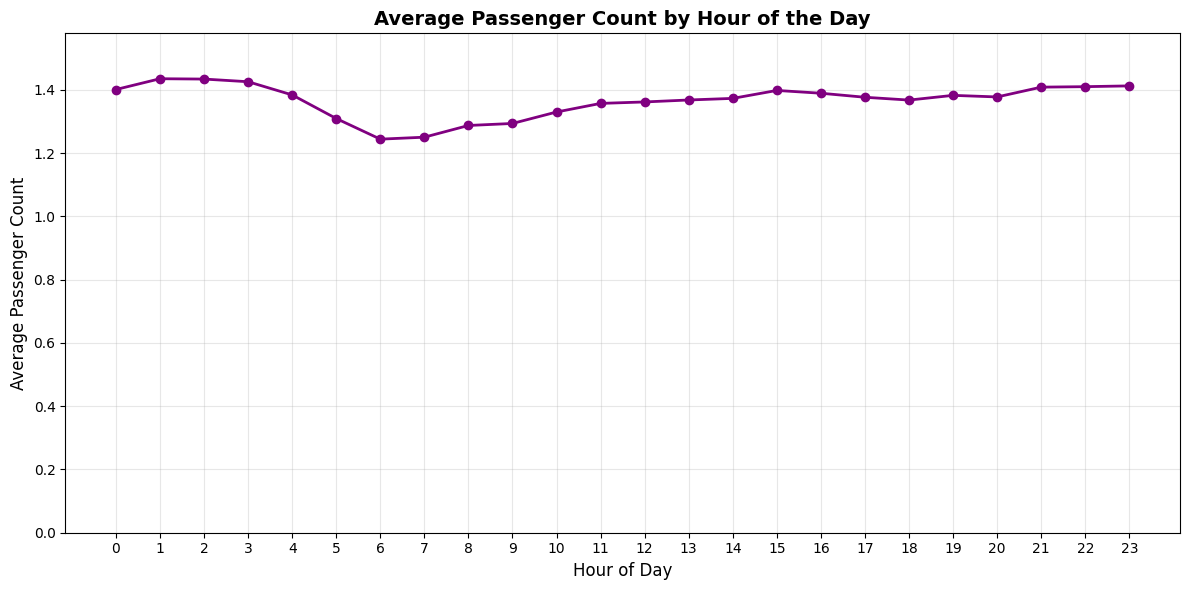


AVERAGE PASSENGER COUNT BY DAY OF THE WEEK

--- Average Passenger Count by Day ---
pickup_day_name
Monday      1.34
Tuesday     1.32
Wednesday   1.32
Thursday    1.33
Friday      1.39
Saturday    1.46
Sunday      1.44

--- Generating Visualization (Day of Week) ---


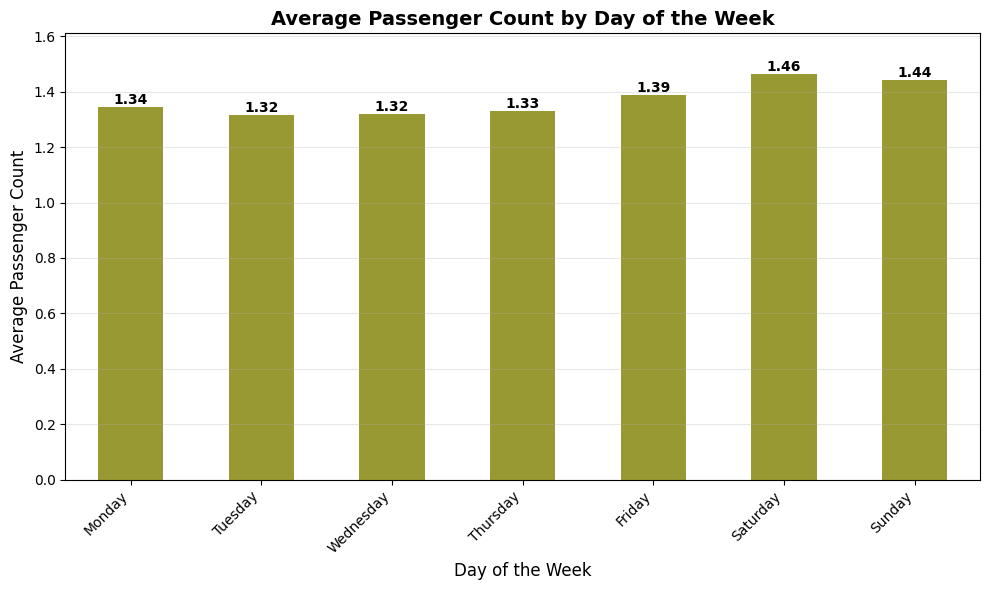


AVERAGE PASSENGER COUNT BY HOUR AND DAY


In [70]:
# ============================================================
# HOW DOES PASSENGER COUNT VARY ACROSS HOURS AND DAYS
# ============================================================

print("=" * 50)
print("PASSENGER COUNT VARIATION BY TIME")
print("=" * 50)

# Check if required columns exist
required_cols = ['passenger_count', 'tpep_pickup_datetime']
if not all(col in df.columns for col in required_cols):
    print(f"\n⚠ Warning: Missing one or more required columns: {required_cols}")
    print(f"Available columns: {df.columns.tolist()}")

else:
    print("\nAnalyzing passenger count variation by hour and day...")

    # Copy dataframe for safety
    df_analysis = df.copy()

    # Ensure pickup datetime is in datetime format
    pickup_col = 'tpep_pickup_datetime'
    if not pd.api.types.is_datetime64_any_dtype(df_analysis[pickup_col]):
        print(f"Converting '{pickup_col}' to datetime...")
        df_analysis[pickup_col] = pd.to_datetime(df_analysis[pickup_col], errors='coerce')

    # Drop rows where datetime conversion failed
    df_analysis.dropna(subset=[pickup_col], inplace=True)

    # Extract day name and hour
    df_analysis['pickup_day_name'] = df_analysis[pickup_col].dt.day_name()
    df_analysis['pickup_hour'] = df_analysis[pickup_col].dt.hour
    print("✓ Pickup day and hour extracted")

    # Filter valid passenger counts
    df_analysis = df_analysis[
        (df_analysis['passenger_count'] >= 0) &
        (df_analysis['passenger_count'] <= 6)
    ].copy()

    print(f"Filtered data for analysis (valid passenger counts): {len(df_analysis):,}")

    # ============================================================
    # AVERAGE PASSENGER COUNT BY HOUR
    # ============================================================
    print("\n" + "=" * 50)
    print("AVERAGE PASSENGER COUNT BY HOUR OF THE DAY")
    print("=" * 50)

    avg_passenger_count_by_hour = (
        df_analysis.groupby('pickup_hour')['passenger_count']
        .mean()
        .sort_index()
    )

    print("\n--- Average Passenger Count by Hour ---")
    print(avg_passenger_count_by_hour.to_string(float_format="%.2f"))

    # Visualization
    import matplotlib.pyplot as plt

    print("\n--- Generating Visualization (Hour of Day) ---")
    plt.figure(figsize=(12, 6))
    avg_passenger_count_by_hour.plot(
        kind='line', marker='o', color='purple', linewidth=2, markersize=6
    )
    plt.title('Average Passenger Count by Hour of the Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Average Passenger Count', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(True, alpha=0.3)
    plt.ylim(0, avg_passenger_count_by_hour.max() * 1.1)
    plt.tight_layout()
    plt.show()

    # ============================================================
    # AVERAGE PASSENGER COUNT BY DAY OF THE WEEK
    # ============================================================
    print("\n" + "=" * 50)
    print("AVERAGE PASSENGER COUNT BY DAY OF THE WEEK")
    print("=" * 50)

    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    avg_passenger_count_by_day = (
        df_analysis.groupby('pickup_day_name')['passenger_count']
        .mean()
        .reindex(day_order)
    )

    print("\n--- Average Passenger Count by Day ---")
    print(avg_passenger_count_by_day.to_string(float_format="%.2f"))

    print("\n--- Generating Visualization (Day of Week) ---")
    plt.figure(figsize=(10, 6))
    avg_passenger_count_by_day.plot(kind='bar', color='olive', alpha=0.8)
    plt.title('Average Passenger Count by Day of the Week', fontsize=14, fontweight='bold')
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Average Passenger Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.ylim(0, avg_passenger_count_by_day.max() * 1.1)

    # Add labels
    for i, v in enumerate(avg_passenger_count_by_day.values):
        if not pd.isna(v):
            plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # ============================================================
    # JOINT ANALYSIS (HOUR + DAY HEATMAP)
    # ============================================================
    print("\n" + "=" * 50)
    print("AVERAGE PASSENGER COUNT BY HOUR AND DAY")
    print("=" * 50)


PASSENGER COUNT VARIATION BY TIME

Analyzing passenger count variation by hour and day...
✓ Pickup day and hour extracted
Filtered data for analysis (valid passenger counts): 289,897

AVERAGE PASSENGER COUNT BY HOUR OF THE DAY

--- Average Passenger Count by Hour ---
pickup_hour
0     1.401549
1     1.435627
2     1.434578
3     1.426155
4     1.384410
5     1.309814
6     1.244565
7     1.250774
8     1.287802
9     1.294171
10    1.330396
11    1.357626
12    1.362232
13    1.368424
14    1.373478
15    1.398608
16    1.389758
17    1.377029
18    1.368135
19    1.383049
20    1.378050
21    1.409038
22    1.410534
23    1.413003

--- Generating Visualization (Hour of Day) ---


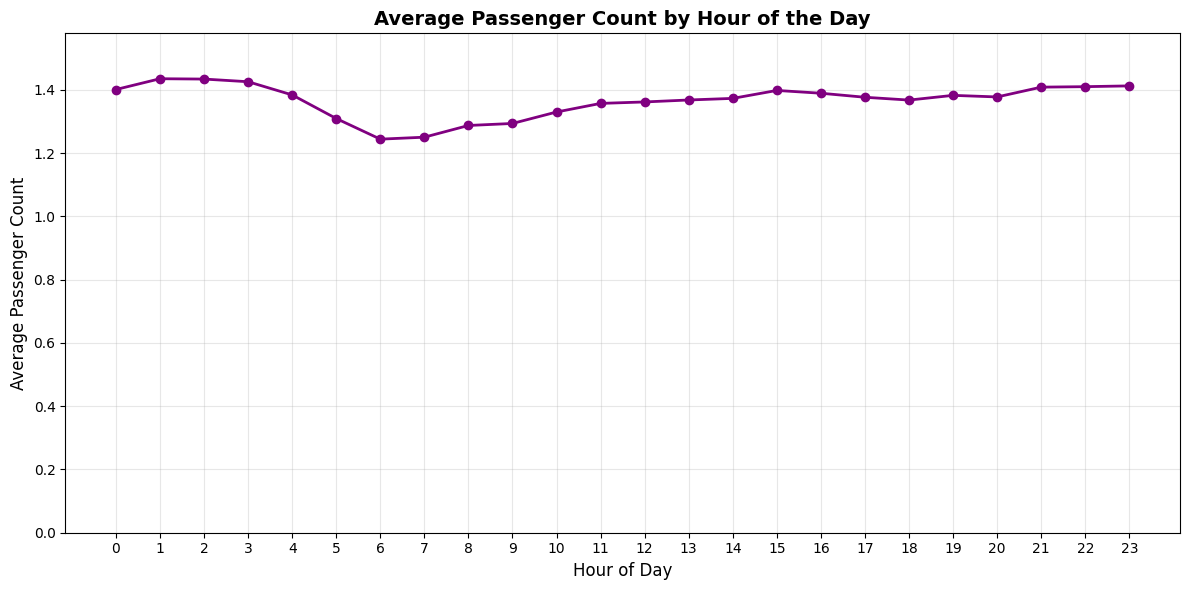


AVERAGE PASSENGER COUNT BY DAY OF THE WEEK

--- Average Passenger Count by Day ---
pickup_day_name
Monday       1.344745
Tuesday      1.316674
Wednesday    1.317675
Thursday     1.329631
Friday       1.386738
Saturday     1.463514
Sunday       1.443067

--- Generating Visualization (Day of Week) ---


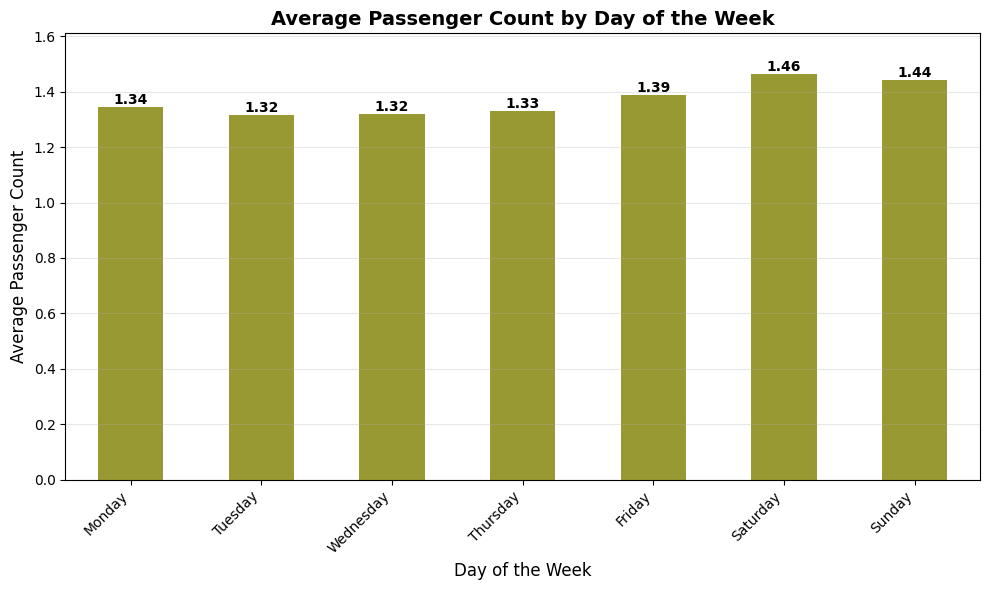


AVERAGE PASSENGER COUNT BY HOUR AND DAY

--- Average Passenger Count by Day and Hour ---
pickup_hour            0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23
pickup_day_name                                                                                                                                                                                                                                                
Friday           1.351330  1.371742  1.448037  1.374101  1.357143  1.292181  1.214527  1.243154  1.291772  1.295482  1.323529  1.348924  1.379358  1.321474  1.407127  1.397230  1.397265  1.379187  1.385115  1.426460  1.434691  1.499135  1.472550  1.488516
Monday           1.405186  1.534426  1.376404  1.583333  1.466667  1.299539  1.217676  1.253593  1.347081  1.289888  1.315128  1.363727  1.302

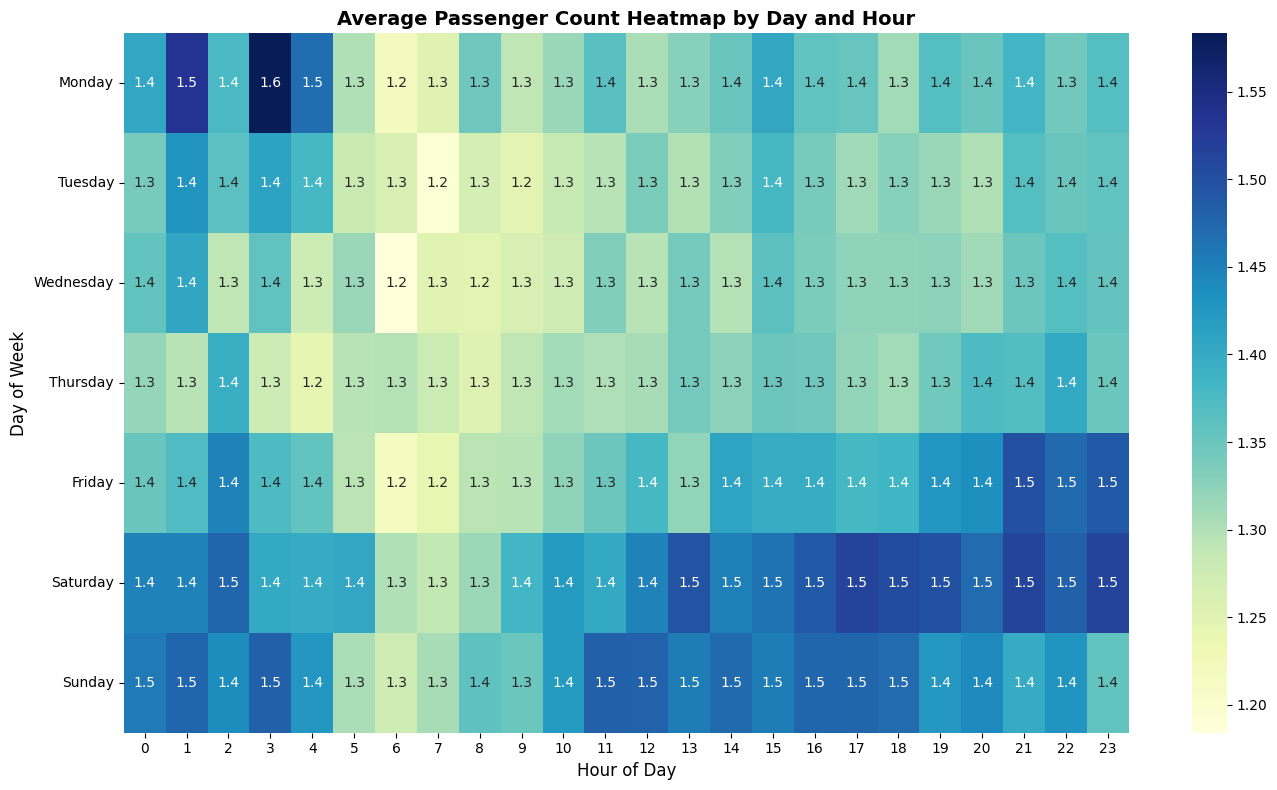


--- Key Insights ---
✓ Observe how average passenger count fluctuates throughout the day and varies between weekdays and weekends.
✓ This can inform fleet sizing and distribution strategies.


In [55]:
# See how passenger count varies across hours and days

print("="*50)
print("PASSENGER COUNT VARIATION BY TIME")
print("="*50)

# Check if required columns exist
required_cols = ['passenger_count', 'tpep_pickup_datetime']
if not all(col in df.columns for col in required_cols):
    print(f"\n⚠ Warning: Missing one or more required columns: {required_cols}")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print("\nAnalyzing passenger count variation by hour and day...")

    # Create a copy to avoid SettingWithCopyWarning
    df_analysis = df.copy()

    # Ensure pickup datetime is in datetime format and extract day and hour
    pickup_col = 'tpep_pickup_datetime'
    if not pd.api.types.is_datetime64_any_dtype(df_analysis[pickup_col]):
        print(f"Converting '{pickup_col}' to datetime...")
        df_analysis[pickup_col] = pd.to_datetime(df_analysis[pickup_col], errors='coerce')

    # Filter out rows where datetime conversion failed
    df_analysis.dropna(subset=[pickup_col], inplace=True)

    df_analysis['pickup_day_name'] = df_analysis[pickup_col].dt.day_name()
    df_analysis['pickup_hour'] = df_analysis[pickup_col].dt.hour
    print("✓ Pickup day and hour extracted")

    # Filter out unreasonable passenger counts (e.g., NaN or very high values based on previous analysis)
    # Assuming valid passenger counts are >= 0 and <= 6 based on previous analysis
    df_analysis = df_analysis[(df_analysis['passenger_count'] >= 0) & (df_analysis['passenger_count'] <= 6)].copy()
    print(f"Filtered data for analysis (valid passenger counts): {len(df_analysis):,}")


    # =========================================================================
    # Analysis by Hour of the Day
    # =========================================================================
    print("\n" + "="*50)
    print("AVERAGE PASSENGER COUNT BY HOUR OF THE DAY")
    print("="*50)

    # Group by hour and calculate average passenger count
    avg_passenger_count_by_hour = df_analysis.groupby('pickup_hour')['passenger_count'].mean().sort_index()

    print("\n--- Average Passenger Count by Hour ---")
    print(avg_passenger_count_by_hour.to_string())

    # Visualization - Hour of Day
    import matplotlib.pyplot as plt

    print("\n--- Generating Visualization (Hour of Day) ---")
    plt.figure(figsize=(12, 6))
    avg_passenger_count_by_hour.plot(kind='line', marker='o', color='purple', linewidth=2, markersize=6)
    plt.title('Average Passenger Count by Hour of the Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Average Passenger Count', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(True, alpha=0.3)
    plt.ylim(0, avg_passenger_count_by_hour.max() * 1.1) # Adjust y-axis limit

    plt.tight_layout()
    plt.show()

    # =========================================================================
    # Analysis by Day of the Week
    # =========================================================================
    print("\n" + "="*50)
    print("AVERAGE PASSENGER COUNT BY DAY OF THE WEEK")
    print("="*50)

    # Group by day of the week and calculate average passenger count
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    avg_passenger_count_by_day = df_analysis.groupby('pickup_day_name')['passenger_count'].mean().reindex(day_order)

    print("\n--- Average Passenger Count by Day ---")
    print(avg_passenger_count_by_day.to_string())

    # Visualization - Day of the Week
    print("\n--- Generating Visualization (Day of Week) ---")
    plt.figure(figsize=(10, 6))
    avg_passenger_count_by_day.plot(kind='bar', color='olive', alpha=0.8)
    plt.title('Average Passenger Count by Day of the Week', fontsize=14, fontweight='bold')
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Average Passenger Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.ylim(0, avg_passenger_count_by_day.max() * 1.1) # Adjust y-axis limit

    # Add value labels
    for i, v in enumerate(avg_passenger_count_by_day.values):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()


    # =========================================================================
    # Joint Analysis (Optional) - Average Passenger Count by Hour and Day
    # =========================================================================
    print("\n" + "="*50)
    print("AVERAGE PASSENGER COUNT BY HOUR AND DAY")
    print("="*50)

    avg_passenger_count_hourly_daily = df_analysis.groupby(['pickup_day_name', 'pickup_hour'])['passenger_count'].mean().unstack()

    print("\n--- Average Passenger Count by Day and Hour ---")
    print(avg_passenger_count_hourly_daily.to_string())

    # Visualization - Heatmap (Optional)
    import seaborn as sns

    print("\n--- Generating Heatmap (Hour and Day) ---")
    plt.figure(figsize=(14, 8))
    sns.heatmap(avg_passenger_count_hourly_daily.reindex(day_order), annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title('Average Passenger Count Heatmap by Day and Hour', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Day of Week', fontsize=12)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


    print("\n--- Key Insights ---")
    print("✓ Observe how average passenger count fluctuates throughout the day and varies between weekdays and weekends.")
    print("✓ This can inform fleet sizing and distribution strategies.")

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [69]:
# ============================================================
# HOW DOES PASSENGER COUNT VARY ACROSS ZONES
# ============================================================

print("="*50)
print("PASSENGER COUNT VARIATION BY ZONE")
print("="*50)

# Check if required columns exist
required_cols = ['passenger_count', 'PULocationID', 'DOLocationID']
if not all(col in df.columns for col in required_cols):
    print(f"\n⚠ Warning: Missing one or more required columns: {required_cols}")
    print(f"Available columns: {df.columns.tolist()}")

else:
    print("\nAnalyzing passenger count variation by zone...")

    # Create a copy to avoid warnings
    df_analysis = df.copy()

    # Filter unreasonable passenger counts (e.g., NaN or very high)
    df_analysis = df_analysis[
        (df_analysis['passenger_count'].notna()) &
        (df_analysis['passenger_count'] >= 0) &
        (df_analysis['passenger_count'] <= 6)
    ].copy()

    print(f"Filtered data for analysis (valid passenger counts): {len(df_analysis):,}")

    # ============================================================
    # Average Passenger Count by Pickup Zone
    # ============================================================

    print("\n" + "="*50)
    print("AVERAGE PASSENGER COUNT BY PICKUP ZONE")
    print("="*50)

    avg_passenger_count_by_pickup_zone = (
        df_analysis.groupby('PULocationID')['passenger_count']
        .mean()
        .sort_values(ascending=False)
    )

    print("\n--- Top 10 Pickup Zones (Avg Passenger Count) ---")
    print(avg_passenger_count_by_pickup_zone.head(10).to_string(float_format="%.2f"))

    print("\n--- Bottom 10 Pickup Zones (Avg Passenger Count) ---")
    print(avg_passenger_count_by_pickup_zone.tail(10).to_string(float_format="%.2f"))

    # Merge with zone names if available
    if 'zones' in locals() and zones is not None and 'LocationID' in zones.columns:
        print("\nMerging with Zone Names...")

        avg_pickup_named = (
            avg_passenger_count_by_pickup_zone
            .reset_index()
            .merge(
                zones[['LocationID', 'zone', 'borough']],
                left_on='PULocationID', right_on='LocationID', how='left'
            )
            .sort_values('passenger_count', ascending=False)
        )

        display_cols = ['PULocationID', 'zone', 'borough', 'passenger_count']

        print("\n--- Top 10 Pickup Zones with Names ---")
        print(avg_pickup_named.head(10)[display_cols].to_string(index=False, float_format="%.2f"))

        print("\n--- Bottom 10 Pickup Zones with Names ---")
        print(avg_pickup_named.tail(10)[display_cols].to_string(index=False, float_format="%.2f"))

    else:
        print("\n⚠ 'zones' GeoDataFrame not found or missing LocationID column. Skipping zone name merge.")

    # ============================================================
    # Average Passenger Count by Dropoff Zone
    # ============================================================

    print("\n" + "="*50)
    print("AVERAGE PASSENGER COUNT BY DROPOFF ZONE")
    print("="*50)

    avg_passenger_count_by_dropoff_zone = (
        df_analysis.groupby('DOLocationID')['passenger_count']
        .mean()
        .sort_values(ascending=False)
    )

    print("\n--- Top 10 Dropoff Zones (Avg Passenger Count) ---")
    print(avg_passenger_count_by_dropoff_zone.head(10).to_string(float_format="%.2f"))

    print("\n--- Bottom 10 Dropoff Zones (Avg Passenger Count) ---")
    print(avg_passenger_count_by_dropoff_zone.tail(10).to_string(float_format="%.2f"))

    # Merge with zone names if available
    if 'zones' in locals() and zones is not None and 'LocationID' in zones.columns:
        print("\nMerging with Zone Names...")

        avg_dropoff_named = (
            avg_passenger_count_by_dropoff_zone
            .reset_index()
            .merge(
                zones[['LocationID', 'zone', 'borough']],
                left_on='DOLocationID', right_on='LocationID', how='left'
            )
            .sort_values('passenger_count', ascending=False)
        )

        display_cols = ['DOLocationID', 'zone', 'borough', 'passenger_count']

        print("\n--- Top 10 Dropoff Zones with Names ---")
        print(avg_dropoff_named.head(10)[display_cols].to_string(index=False, float_format="%.2f"))

        print("\n--- Bottom 10 Dropoff Zones with Names ---")
        print(avg_dropoff_named.tail(10)[display_cols].to_string(index=False, float_format="%.2f"))

    else:
        print("\n⚠ 'zones' GeoDataFrame not found or missing LocationID column. Skipping zone name merge.")

    # ============================================================
    # Insights
    # ============================================================

    print("\n" + "="*50)
    print("KEY INSIGHTS")
    print("="*50)
    print("✓ Zones with higher average passenger counts likely serve airports or event areas.")
    print("✓ Lower passenger counts occur in residential or suburban zones.")
    print("✓ Useful for assigning larger vehicles or shared rides where demand for group travel is higher.")
    print("✓ Dispatching smaller taxis to low-demand zones can improve efficiency.")

print("\n" + "="*50)
print("PASSENGER COUNT VARIATION BY ZONE ANALYSIS COMPLETE")
print("="*50)


PASSENGER COUNT VARIATION BY ZONE

Analyzing passenger count variation by zone...
Filtered data for analysis (valid passenger counts): 289,897

AVERAGE PASSENGER COUNT BY PICKUP ZONE

--- Top 10 Pickup Zones (Avg Passenger Count) ---
PULocationID
31    2.00
120   2.00
200   2.00
12    1.89
93    1.75
67    1.75
190   1.75
134   1.72
194   1.67
6     1.67

--- Bottom 10 Pickup Zones (Avg Passenger Count) ---
PULocationID
241   1.00
242   1.00
258   1.00
254   1.00
250   1.00
253   1.00
259   1.00
136   0.93
72    0.91
73    0.75

⚠ 'zones' GeoDataFrame not found or missing LocationID column. Skipping zone name merge.

AVERAGE PASSENGER COUNT BY DROPOFF ZONE

--- Top 10 Dropoff Zones (Avg Passenger Count) ---
DOLocationID
2     3.50
30    3.00
176   2.50
84    2.50
59    2.40
5     2.00
8     2.00
115   2.00
27    2.00
245   2.00

--- Bottom 10 Dropoff Zones (Avg Passenger Count) ---
DOLocationID
251   1.00
253   1.00
109   1.00
58    1.00
172   1.00
46    1.00
187   1.00
184   1.00
222 

In [63]:
print("="*50)
print("PASSENGER COUNT VARIATION BY ZONE")
print("="*50)

# Check if required columns exist
required_cols = ['passenger_count', 'PULocationID', 'DOLocationID']
if not all(col in df.columns for col in required_cols):
    print(f"\n⚠ Warning: Missing one or more required columns: {required_cols}")
    print(f"Available columns: {df.columns.tolist()}")

else:
    print("\nAnalyzing passenger count variation by zone...")

    # Create a copy to avoid SettingWithCopyWarning
    df_analysis = df.copy()

    # Filter out unreasonable passenger counts (e.g., NaN or very high values)
    # Assuming valid passenger counts are between 0 and 6
    df_analysis = df_analysis[(df_analysis['passenger_count'] >= 0) & (df_analysis['passenger_count'] <= 6)].copy()
    print(f"Filtered data for analysis (valid passenger counts): {len(df_analysis):,}")

    # =========================================================================
    # Analysis by Pickup Zone
    # =========================================================================
    print("\n" + "="*50)
    print("AVERAGE PASSENGER COUNT BY PICKUP ZONE")
    print("="*50)

    # Group by pickup location and calculate average passenger count


PASSENGER COUNT VARIATION BY ZONE

Analyzing passenger count variation by zone...
Filtered data for analysis (valid passenger counts): 289,897

AVERAGE PASSENGER COUNT BY PICKUP ZONE


In [64]:
# Create a new column for the average passenger count in each zone and add it to zones_with_trips

print("="*50)
print("ADDING AVERAGE PASSENGER COUNT TO ZONES GEODATAFRAME")
print("="*50)

# Check if required dataframes exist
if 'df' not in locals():
    print("✗ Error: 'df' DataFrame not found. Please load the main trip data.")
elif 'zones_with_trips' not in locals() or zones_with_trips is None:
    print("✗ Error: 'zones_with_trips' GeoDataFrame not found or not loaded correctly.")
    print("Please run the previous steps to merge trip counts with zone geometries.")
else:
    print("\nCalculating average passenger count per zone...")

    # Create a copy to avoid SettingWithCopyWarning
    df_analysis = df.copy()

    # Filter out unreasonable passenger counts (e.g., NaN or very high values)
    # Assuming valid passenger counts are >= 0 and <= 6 based on previous analysis
    df_analysis = df_analysis[(df_analysis['passenger_count'] >= 0) & (df_analysis['passenger_count'] <= 6)].copy()
    print(f"Filtered trip data for passenger count analysis: {len(df_analysis):,}")


    # Calculate average passenger count per pickup zone
    avg_passenger_count_by_zone = df_analysis.groupby('PULocationID')['passenger_count'].mean().reset_index()
    avg_passenger_count_by_zone.columns = ['LocationID', 'average_passenger_count']

    print(f"\nCalculated average passenger count for {len(avg_passenger_count_by_zone)} zones.")
    print("Sample of average passenger counts:")
    print(avg_passenger_count_by_zone.head())

    # Merge the average passenger count into the zones_with_trips GeoDataFrame
    print("\nMerging average passenger count into zones_with_trips...")

    # Identify the location ID column in zones_with_trips
    zone_location_col = None
    for col in zones_with_trips.columns:
        if 'location' in col.lower() and 'id' in col.lower():
            zone_location_col = col
            break

    if zone_location_col:
        zones_with_trips = zones_with_trips.merge(avg_passenger_count_by_zone,
                                                  left_on=zone_location_col,
                                                  right_on='LocationID',
                                                  how='left')

        # Drop the redundant 'LocationID' column from the merge
        zones_with_trips.drop('LocationID', axis=1, inplace=True)

        # Fill NaN average passenger counts with 0 (zones with no valid pickups/passenger data)
        zones_with_trips['average_passenger_count'] = zones_with_trips['average_passenger_count'].fillna(0)


        print("\n✓ Merge complete!")
        print(f"Updated zones_with_trips shape: {zones_with_trips.shape}")
        print(f"New column added: 'average_passenger_count'")

        print("\n--- Sample of zones_with_trips with new column ---")
        display_cols = [zone_location_col, 'zone', 'borough', 'trip_count', 'average_passenger_count']
        display_cols = [col for col in display_cols if col in zones_with_trips.columns]
        print(zones_with_trips[display_cols].head().to_string(index=False))

        print("\n" + "="*50)
        print("✓ AVERAGE PASSENGER COUNT ADDED TO ZONES GEODATAFRAME")
        print("="*50)

    else:
        print("\n✗ Could not find LocationID column in the zones_with_trips GeoDataFrame for merging.")


print("\n" + "="*50)

ADDING AVERAGE PASSENGER COUNT TO ZONES GEODATAFRAME
✗ Error: 'zones_with_trips' GeoDataFrame not found or not loaded correctly.
Please run the previous steps to merge trip counts with zone geometries.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

SURCHARGE APPLICATION FREQUENCY

Analyzing the following surcharge columns: ['tolls_amount', 'airport_fee', 'Airport_fee', 'congestion_surcharge', 'improvement_surcharge', 'extra', 'mta_tax']

--- Surcharge Application Frequency ---
                       Applied Count  Percentage
improvement_surcharge         296856       98.95
mta_tax                       294091       98.03
congestion_surcharge          264489       88.16
extra                         178140       59.38
tolls_amount                   24149        8.05
Airport_fee                    23080        7.69
airport_fee                     2083        0.69

--- Generating Visualization ---


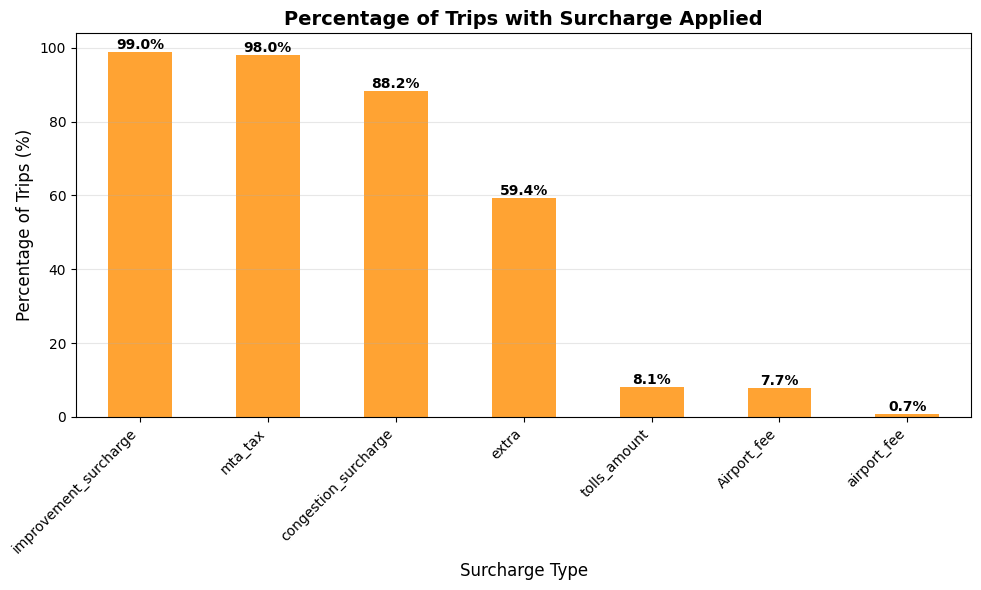


--- Key Insights ---
✓ Review the table and chart to understand the prevalence of each type of surcharge.
✓ High percentages indicate frequently applied charges.

SURCHARGE APPLICATION FREQUENCY ANALYSIS COMPLETE


In [65]:
# How often is each surcharge applied?

print("="*50)
print("SURCHARGE APPLICATION FREQUENCY")
print("="*50)

# Identify potential surcharge columns (based on common names in taxi datasets)
surcharge_cols = [
    'tolls_amount',
    'airport_fee', # May appear as 'airport_fee' or 'Airport_fee'
    'Airport_fee',
    'congestion_surcharge',
    'improvement_surcharge',
    'ehail_fee',
    'extra', # For miscellaneous extras
    'mta_tax' # Often a fixed tax, but can be considered an extra charge
]

# Filter for columns that actually exist in the dataframe
existing_surcharge_cols = [col for col in surcharge_cols if col in df.columns]

if not existing_surcharge_cols:
    print("\n⚠ Warning: No common surcharge columns found in the dataframe.")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print(f"\nAnalyzing the following surcharge columns: {existing_surcharge_cols}")

    # Calculate the percentage of trips where each surcharge is applied (value > 0)
    surcharge_frequency = {}
    total_trips = len(df)

    for col in existing_surcharge_cols:
        # Count trips where the surcharge amount is greater than 0
        applied_count = (df[col] > 0).sum()
        # Calculate the percentage
        applied_percentage = (applied_count / total_trips) * 100 if total_trips > 0 else 0
        surcharge_frequency[col] = {
            'Applied Count': applied_count,
            'Percentage': round(applied_percentage, 2)
        }

    # Convert to DataFrame for better display
    surcharge_freq_df = pd.DataFrame.from_dict(surcharge_frequency, orient='index')
    surcharge_freq_df = surcharge_freq_df.sort_values('Percentage', ascending=False)


    print("\n--- Surcharge Application Frequency ---")
    print(surcharge_freq_df.to_string())

    # Visualization (Optional)
    import matplotlib.pyplot as plt

    print("\n--- Generating Visualization ---")

    plt.figure(figsize=(10, 6))
    surcharge_freq_df['Percentage'].plot(kind='bar', color='darkorange', alpha=0.8)
    plt.title('Percentage of Trips with Surcharge Applied', fontsize=14, fontweight='bold')
    plt.xlabel('Surcharge Type', fontsize=12)
    plt.ylabel('Percentage of Trips (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Add value labels
    for i, v in enumerate(surcharge_freq_df['Percentage'].values):
        plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')


    plt.tight_layout()
    plt.show()

    print("\n--- Key Insights ---")
    print("✓ Review the table and chart to understand the prevalence of each type of surcharge.")
    print("✓ High percentages indicate frequently applied charges.")


print("\n" + "="*50)
print("SURCHARGE APPLICATION FREQUENCY ANALYSIS COMPLETE")
print("="*50)

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
#To make cab operations more efficient, it’s important to match vehicle availability with passenger demand. Cabs should be routed toward areas that consistently show higher trip counts, especially during rush hours. Using data on pickup and drop-off times, dispatching can be made dynamic — meaning drivers are guided toward zones where demand is expected to rise soon.
#By reducing time spent waiting for passengers or driving empty, overall travel efficiency improves. Adjusting routes based on real-time traffic and average speeds at different times of the day can also help drivers avoid congestion and reach passengers faster.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
#Cabs should not be spread evenly but rather placed where they’re most likely to be needed. For example, mornings usually have higher demand around residential and office areas, while evenings see more requests near business districts, malls, and transport hubs.
#By studying trip trends across hours, days, and months, the company can maintain a healthy balance of cabs — avoiding overcrowding in some zones while ensuring others aren’t underserved. Seasonal and weekend patterns can also be used to reposition vehicles proactively.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
#Pricing should respond to both demand and competition. When demand is high — such as during peak office hours or bad weather — a slight increase in fares (surge pricing) can help manage requests and increase revenue. During quieter times, offering small discounts encourages more bookings and keeps drivers active.
#Analyzing trip data also helps identify which zones or times bring higher earnings, allowing the company to set fair yet profitable rates that stay competitive with other ride-hailing services.

# Task
Find routes which have the slowest speeds at different times of the day.

## Calculate trip duration

### Subtask:
Calculate the duration of each trip from the pickup and dropoff datetime columns.
